<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center><font size=8>Project 4 : INN HOTELS</center></font></h1>



## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Step 1 : Importing necessary libraries

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

from datetime import date
import math                   #used during subplot vsulizattion

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set size of the seaborn plots
sns.set(rc = {'figure.figsize':(15,8)})

# setting the precision of floating numbers to 4 decimal points
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# SL Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    make_scorer,
)

## Step 2: Loading the Data

In [ ]:
# for mounting Google Drive to the notebook (to be used only if executing in Google Colab)

from google.colab import drive
drive.mount('/content/drive')

INN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project 4/INNHotelsGroup.csv')

Mounted at /content/drive


In [ ]:
# copying data to another variable to avoid any changes to original data
data = INN.copy()

## Step 3: Perform exploratory data analysis (EDA)
- Perform exploratory data analysis (EDA) to understand the data and identify any incorrect data, missing values or outliers, perform correlation
- Do all the necessary data checkings to pepare for Pre-Process Step 4
- Since there are columns for Year, Month and Date, check to see if there is any error in the date time value




### PREDEFINED FUNCTIONS

- lets place some predefined functions here to be used during EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 3),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0             65.0000   
1                                     0            106.6800   
2                                     0             60.0000   
3                                     0            100.0000   
4                                     0             94.5000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270            167.8000                       1   Not_Canceled  
36271             90.9500                       2       Canceled  
36272             98.3900                       2   Not_Canceled  
36273             94.5000                       0       Canceled  
36274            161.6700                       0   Not_Canceled

### Verify the number of rows and columns of the dataset.

In [ ]:
#check shape of the datasets

print("INN Data has: ",data.shape[0],'rows and', data.shape[1], 'columns')


INN Data has:  36275 rows and 19 columns


### Verify if there are any duplicates in the dataset.

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

###Checking for unique values of each column

In [ ]:
print("Unique Values INN Dataset: \n\n",data.nunique())

Unique Values INN Dataset: 

 Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


### Check the data types of the columns for the dataset.

In [ ]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Check for Missing Values

In [ ]:
# check if there are missing values
data.isnull().sum().sort_values(ascending=False)

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64

Observation of Data Check

- Data loaded without a problem
- There are 36,275 records with 19 fields 
- There are no missing records or duplicates found, which makes it a good data set and also means we do not have to carry out any data impute
- Dependent variable (test variable) is booking_status which is a categorical column
- Independent categorical variables are : booking_id, type_of_meal_plan, room_type_reserved, market_segment_type while the rest are numerical data types.
- We will drop unnecessary categorical column - booking_id durring pre-prcessing as we may want to use this for the EDA
- We will OneHotEncode type_of_meal_plan, room_type_reserved, and market_segement_type
- Booking status which is our test result should be a binary representation of the booking status, of either '1' or '0' (True / False).

### Check Statistical Summary

In [ ]:
data.describe(include="all").T

count unique           top   freq  \
Booking_ID                                36275  36275      INN00001      1   
no_of_adults                         36275.0000    NaN           NaN    NaN   
no_of_children                       36275.0000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.0000    NaN           NaN    NaN   
no_of_week_nights                    36275.0000    NaN           NaN    NaN   
type_of_meal_plan                         36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.0000    NaN           NaN    NaN   
room_type_reserved                        36275      7   Room_Type 1  28130   
lead_time                            36275.0000    NaN           NaN    NaN   
arrival_year                         36275.0000    NaN           NaN    NaN   
arrival_month                        36275.0000    NaN           NaN    NaN   
arrival_date                         36275.0000    NaN           NaN    NaN   
market_segment_type                       36275      5        Online  23214   
repeated_guest                       36275.0000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.0000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.0000    NaN           NaN    NaN   
avg_price_per_room                   36275.0000    NaN           NaN    NaN   
no_of_special_requests               36275.0000    NaN           NaN    NaN   
booking_status                            36275      2  Not_Canceled  24390   

                                          mean     std       min       25%  \
Booking_ID                                 NaN     NaN       NaN       NaN   
no_of_adults                            1.8450  0.5187    0.0000    2.0000   
no_of_children                          0.1053  0.4026    0.0000    0.0000   
no_of_weekend_nights                    0.8107  0.8706    0.0000    0.0000   
no_of_week_nights                       2.2043  1.4109    0.0000    1.0000   
type_of_meal_plan                          NaN     NaN       NaN       NaN   
required_car_parking_space              0.0310  0.1733    0.0000    0.0000   
room_type_reserved                         NaN     NaN       NaN       NaN   
lead_time                              85.2326 85.9308    0.0000   17.0000   
arrival_year                         2017.8204  0.3838 2017.0000 2018.0000   
arrival_month                           7.4237  3.0699    1.0000    5.0000   
arrival_date                           15.5970  8.7404    1.0000    8.0000   
market_segment_type                        NaN     NaN       NaN       NaN   
repeated_guest                          0.0256  0.1581    0.0000    0.0000   
no_of_previous_cancellations            0.0233  0.3683    0.0000    0.0000   
no_of_previous_bookings_not_canceled    0.1534  1.7542    0.0000    0.0000   
avg_price_per_room                    103.4235 35.0894    0.0000   80.3000   
no_of_special_requests                  0.6197  0.7862    0.0000    0.0000   
booking_status                             NaN     NaN       NaN       NaN   

                                           50%       75%       max  
Booking_ID                                 NaN       NaN       NaN  
no_of_adults                            2.0000    2.0000    4.0000  
no_of_children                          0.0000    0.0000   10.0000  
no_of_weekend_nights                    1.0000    2.0000    7.0000  
no_of_week_nights                       2.0000    3.0000   17.0000  
type_of_meal_plan                          NaN       NaN       NaN  
required_car_parking_space              0.0000    0.0000    1.0000  
room_type_reserved                         NaN       NaN       NaN  
lead_time                              57.0000  126.0000  443.0000  
arrival_year                         2018.0000 2018.0000 2018.0000  
arrival_month                           8.0000   10.0000   12.0000  
arrival_date                           16.0000   23.0000   31.0000  
mar

### Lets breakdown or verify the categorical data further

In [ ]:
#check summary object statistics
data.describe(include = ['object'])

Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
count       36275             36275              36275               36275   
unique      36275                 4                  7                   5   
top      INN00001       Meal Plan 1        Room_Type 1              Online   
freq            1             27835              28130               23214   

       booking_status  
count           36275  
unique              2  
top      Not_Canceled  
freq            24390

In [ ]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [ ]:
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 40)
    print("\n")

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
****************************************


Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
****************************************


Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
****************************************


Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
****************************************


Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
****************************************




Observation of Categorical Statistical Summary

- The count of each categorical columns is 36275 which verifies further there is no missing values
- The unique value indicates : There are 4 types of meal plans, 7 types of room types, 5 types of market segments, and 2 types of booking statuses in the dataset.
- Top value indicates : The most frequent meal plan chosen is 'Meal Plan 1' (76.8%), the most frequent room type reserved is 'Room_Type 1' (77.6%), the most frequent booking channel is 'Online'(64%), and the most frequent booking status is 'Not_Canceled'(67.2%).

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Client Leading Questions and The Answers**:


1.   What are the busiest months in the hotel? 
***Answer : A4*** - October with 5317 bookings (14.7%)

2.   Which market segment do most of the guests come from?
***Answer : A3*** - Online with a count of 23,214 bookings (64%)

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
***Answer : B3*** - Online bookings has the highest average price per room (112.25), followed by Aviation (100.70) and Offline (91.63) market segments.

4. What percentage of bookings are canceled? 
***Answer : A2*** - 11,885 bookings which makes up 32.8%
are cancelled.

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
***Answer : B4*** - Only 16 bokings (1.72%%) of the total bokings of 930 made by repeated guest were cancelled.

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
***Answer : B12*** - It sems that as the number of request increase, the likehood of bookings cancelled decreases.

## **A. EDA - UNIVARIATE ANALYSIS**

###A1. Check Distribution of variables in the data




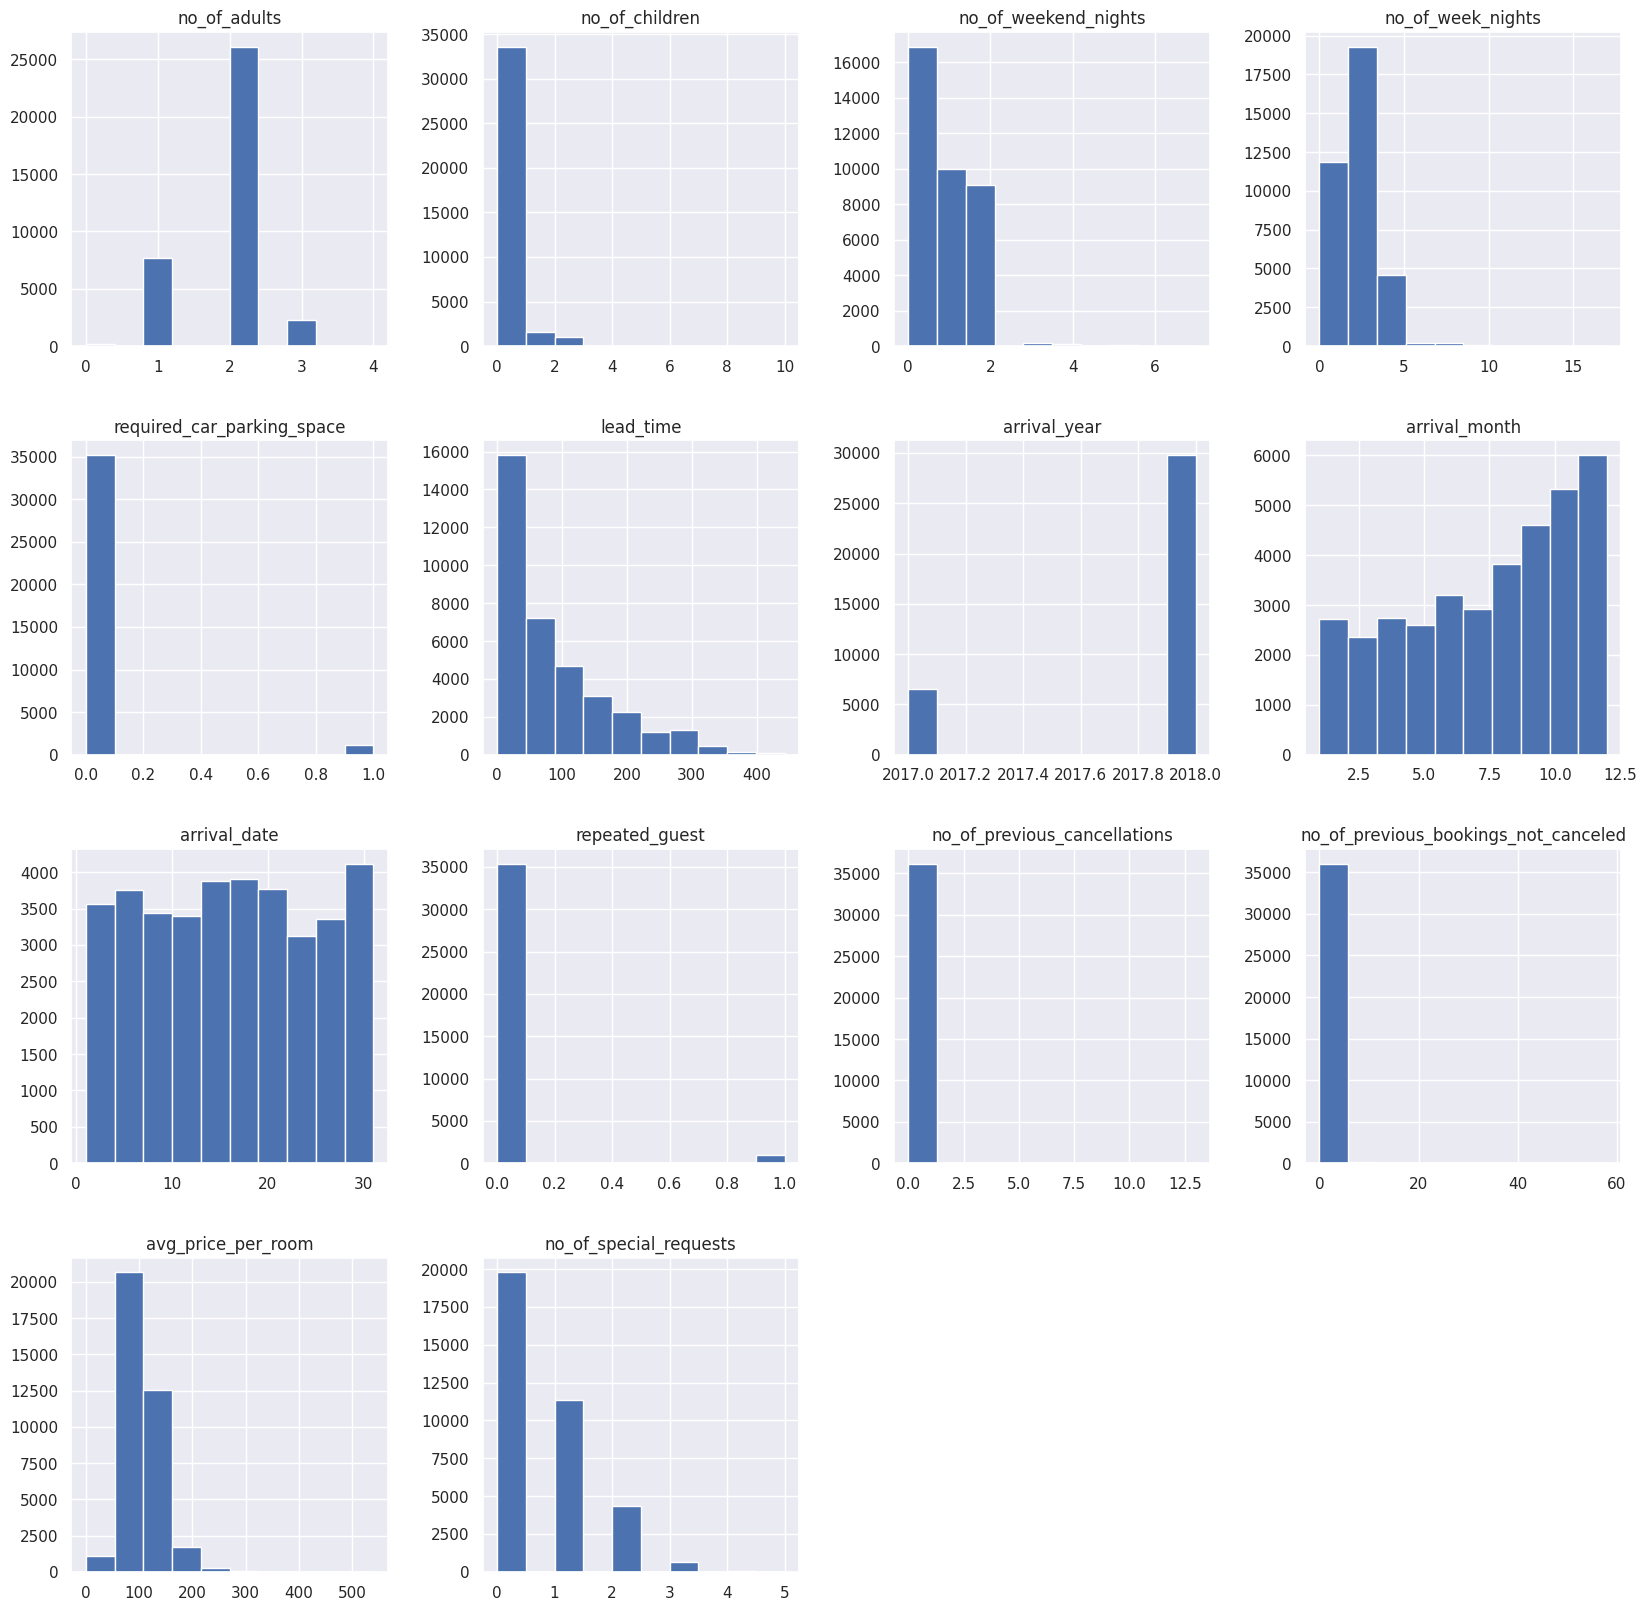

In [ ]:
sns.set_style("darkgrid")
data.hist(figsize=(20, 20))
plt.show()

### A2. Observations on the target variable (Booking Status)

In [ ]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

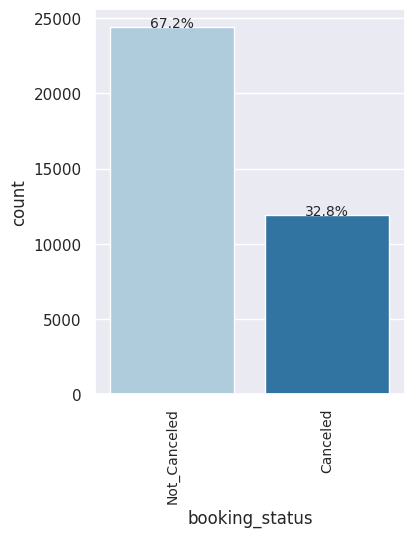

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

~ Bookings that were not cancelled is 24,390 (67.2%)

~ **Cancelled bookings is 32.8% which is quite low and we should look into ways for making this value even lower (Answer to Leading Question)** 

###A3. Observing Booking Type Market Segment

In [ ]:
data['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

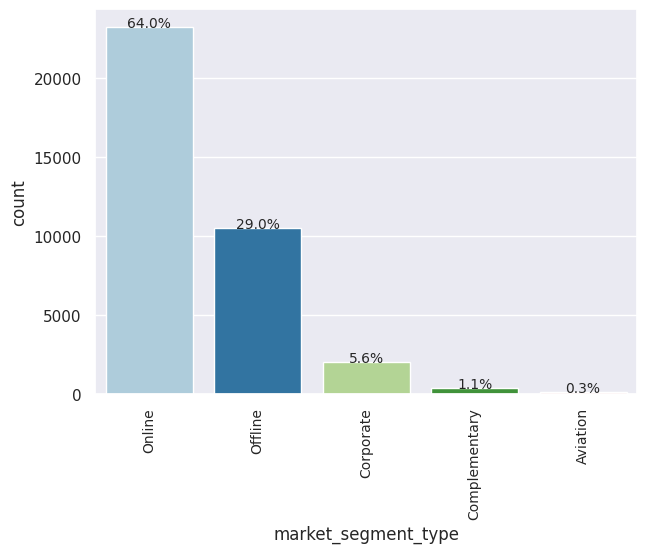

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

~ **The highest booking type/market segment is Online with a count of 23,214 bookings (64%)**

###A4. Observing Booking Month

In [ ]:
data['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

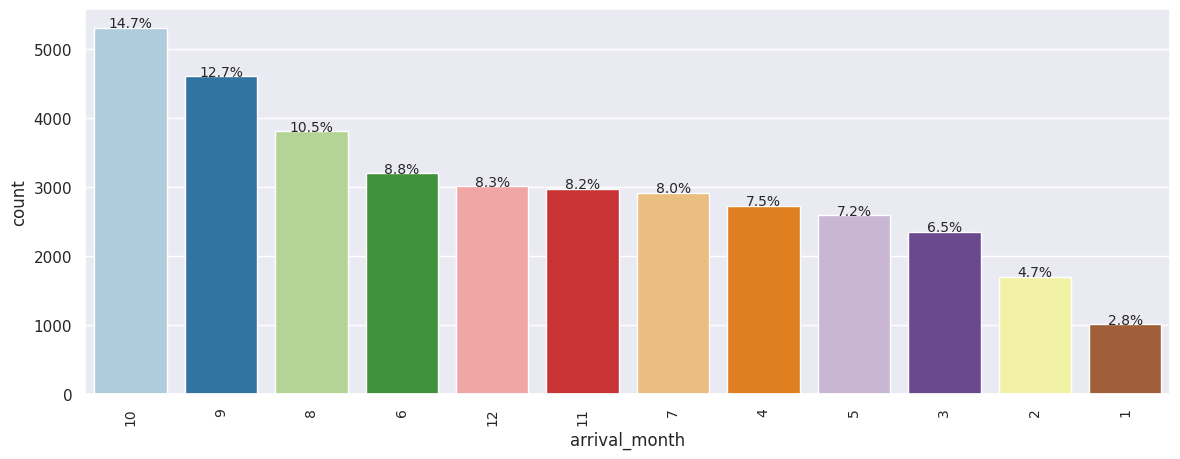

In [ ]:
labeled_barplot(data, "arrival_month", perc=True, n = None)

~ **The busiest month recorded for INN Hotels is October with 5317 bookings (14.7%)**

~ The next busiest months are : September, August, and June (Descending Order)

~ Least favorable month is January (2.8%)

###A5. Observing Meal Plan Type

In [ ]:
data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

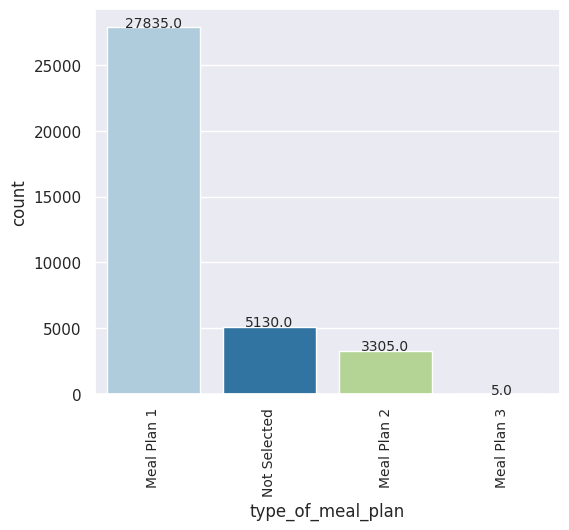

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=False, n = None)

~  Highest choice of meal type preference by guest are Meal Plan 1 (77%) and the lowest is Meal Plan 3 (less than 0.0001%)

###A6. Observations on room reservation type

In [ ]:
data['room_type_reserved'].value_counts(ascending = False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

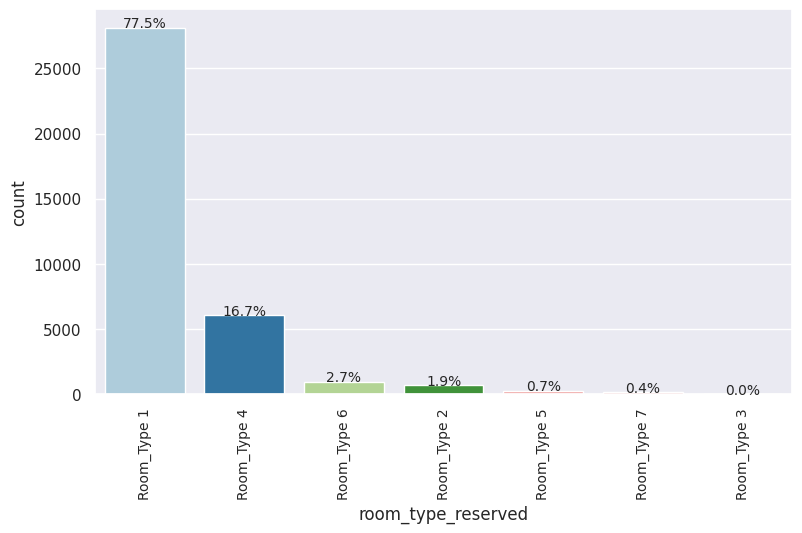

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

~ Highest guest room reservations are for Room Type 1

###A7. Observations on the number of adults in room reservations

In [ ]:
data['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

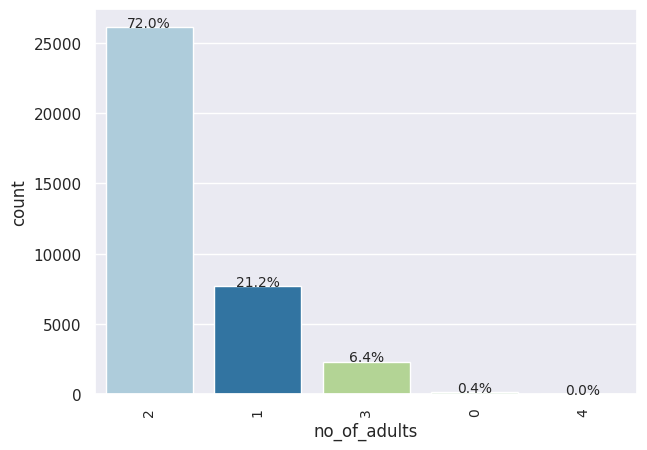

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

- 72% of Rooms Reserved have 2 adults per room

###A8. Observations on the number of children in room reservations

In [ ]:
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

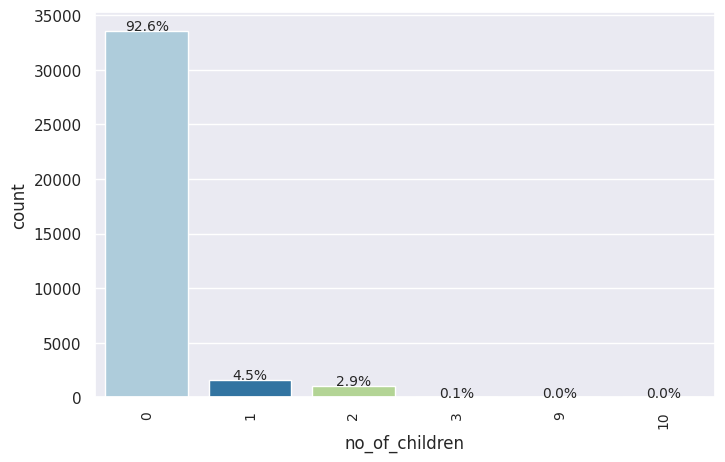

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

**The highest percentage of hotel bookings are not including children**
- This shows that the highest no of booking are guest who dont bring their children or don't have children

###A9. Observation of Repeated Guests

In [ ]:
data['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

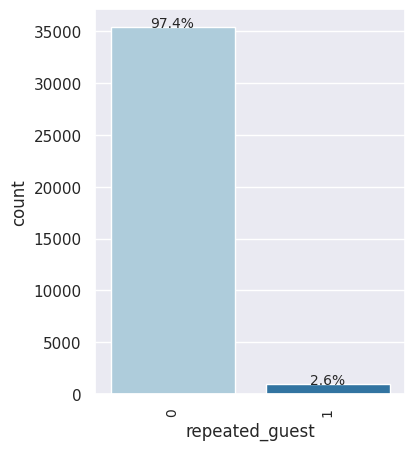

In [ ]:
labeled_barplot(data, 'repeated_guest', perc=True)

According to the data, there were 930 customers (or 2.6% of the total) who were repeated guests, meaning they had stayed at the INN Hotel Group in Portugal at least once before. 

###A10. Observations on the number of weekend nights 

In [ ]:
data['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

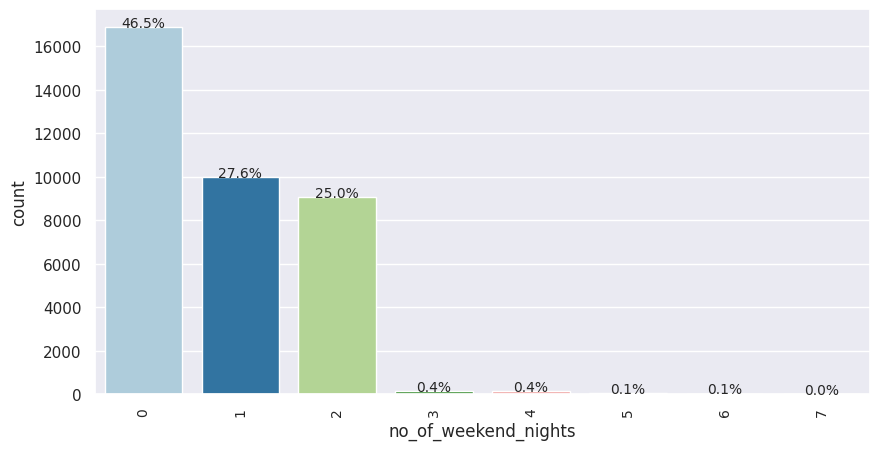

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

###A11. Observations on number week nights 

In [ ]:
data['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

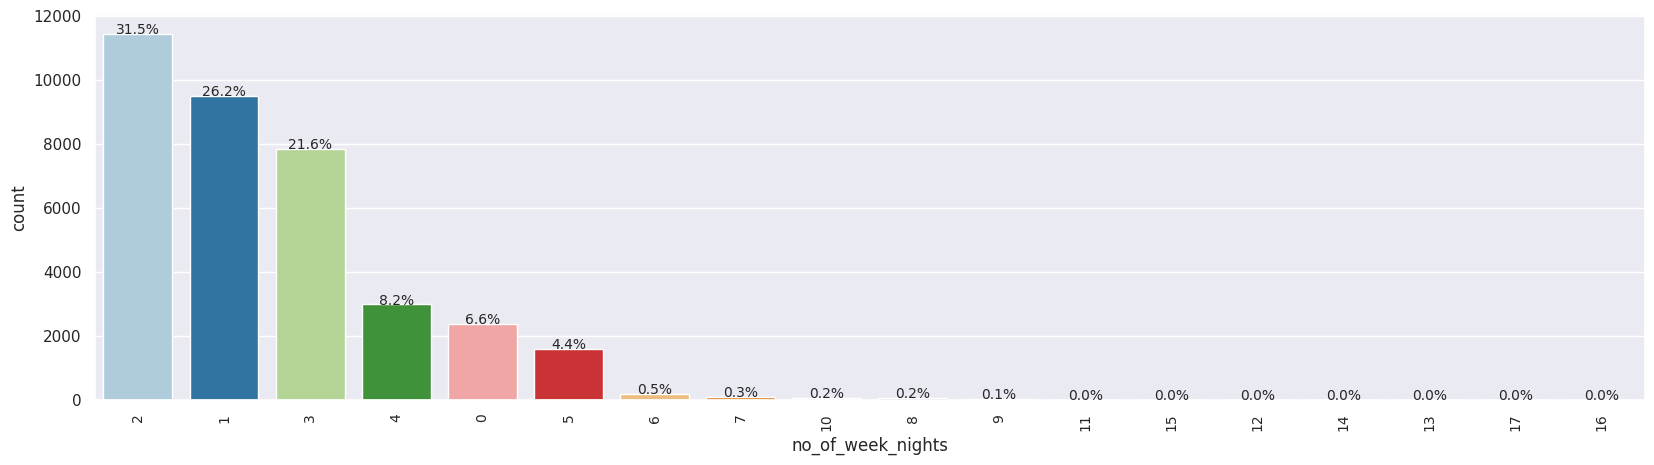

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

###A12. Observation of Total Stay

In [ ]:
# combine the no_of_weekend_nights and no_of_week_nights
# we wil drop this in Pre-Process statge

data['total_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
data['total_stay'].value_counts()

3     10052
2      8472
1      6604
4      5893
5      2589
6      1031
7       973
8       179
9       111
10      109
0        78
11       39
14       32
15       31
12       24
13       18
20       11
19        6
16        6
17        5
21        4
18        3
23        2
22        2
24        1
Name: total_stay, dtype: int64

Observation 
- There are 10,052 instances where the total stay is 3 days and 8472 instances where it is 2 days.
- Most of the guest bookings are for two nights over the week days
- 46.5% of the bookings are never on weekends
- There is a higher percentage of guest booking rooms for 1 weekend as compared to two weekends.

***Note :***
- The value 0 in the 'total_stay' column represents cases where the guest did not stay any nights at the hotel.There are 78 instances of this. This could be due to various reasons such as a no-show, or a data entry error.

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel 

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

###A13. Observations on car parking space

In [ ]:
data['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

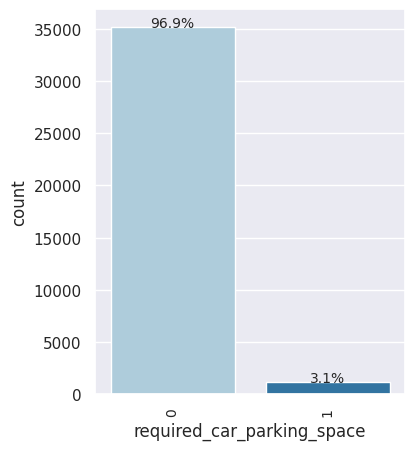

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

Most of the guest at the hotel DO NO NEED Car Parking Space. There could be several factors contributing to this, such as International Travellers, Business Visits whereby driving may not be required or even a cost factor where the charges may be high for parking (by the hour)

###A14. Obseravations on the number of special requests with reservations

In [ ]:
data['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

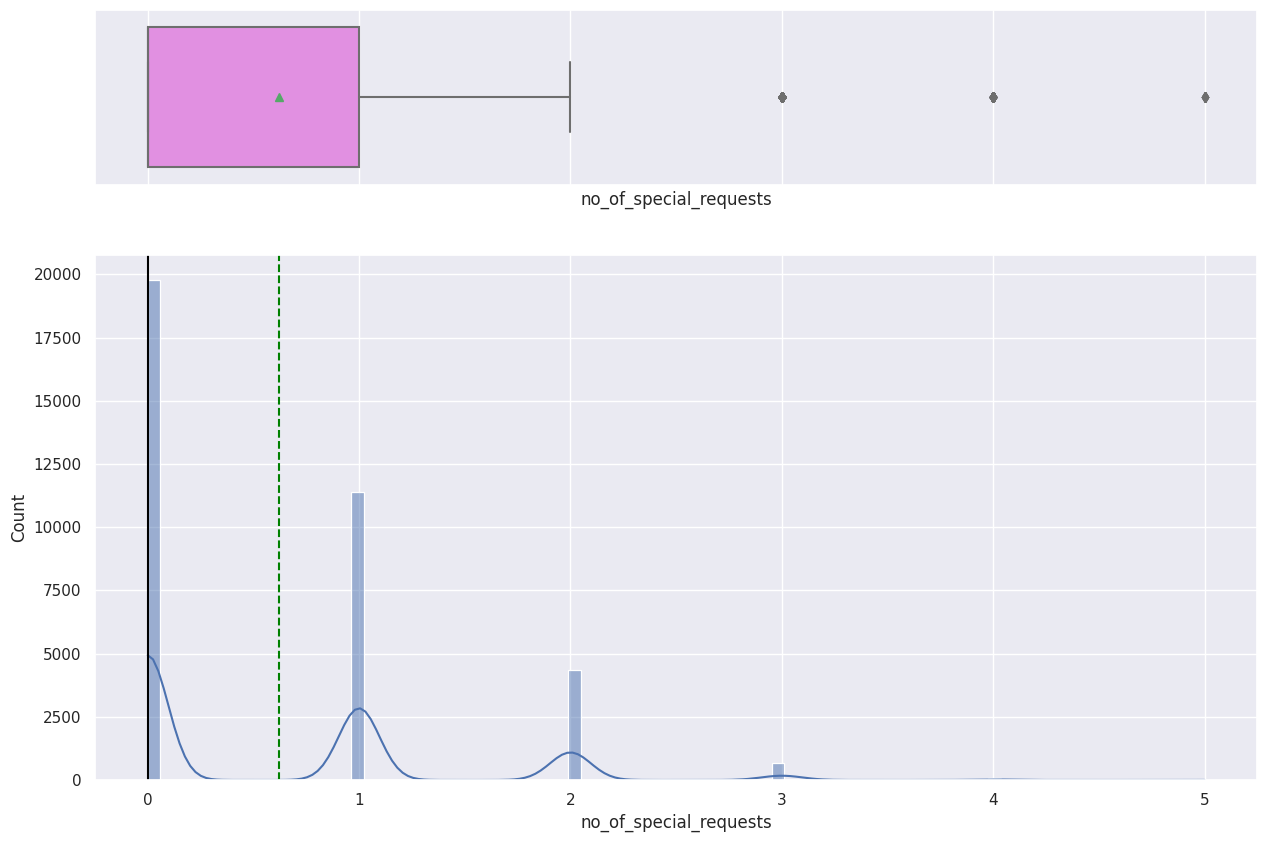

In [ ]:
histogram_boxplot(data, "no_of_special_requests")

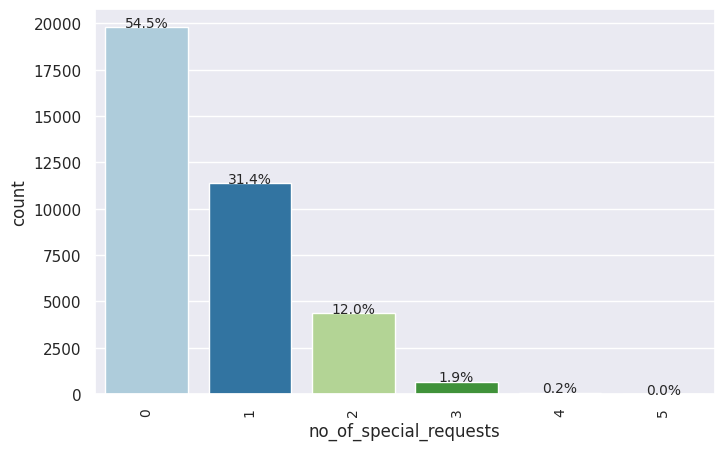

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

- Mostly, there are no special customer request with the bookings customers 
- However, only 31% of custoemrs have 1 request and only a small perventage of customer (1.9%) have at least 3 request with their bookings

###A15. Observations on the number of **previous bookings cancelled** by customers prior to the current booking

In [ ]:
data['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

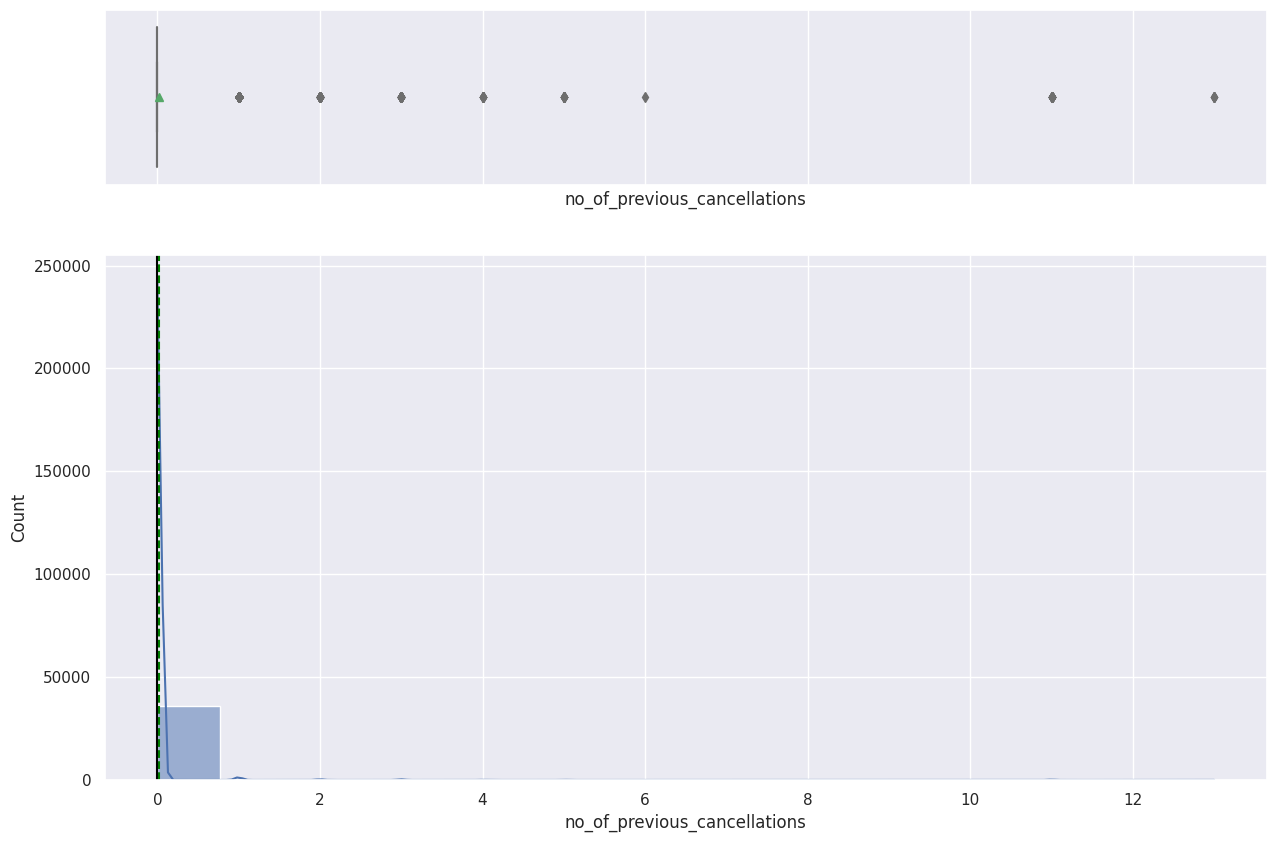

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")

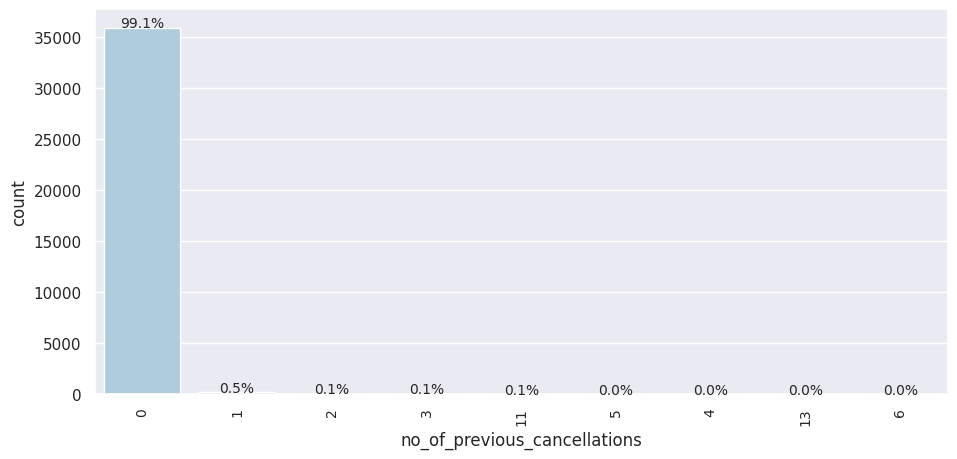

In [ ]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

99.1% of the customers that made bookings had no records of previous cancellations
- This could be an indication that the hotel has a high rate of customer satisfaction or the cancellation policy is strict, making customers hesitant to cancel their bookings.

###A16. Observations on average prices of rooms

In [ ]:
data['avg_price_per_room'].describe()

count   36275.0000
mean      103.4235
std        35.0894
min         0.0000
25%        80.3000
50%        99.4500
75%       120.0000
max       540.0000
Name: avg_price_per_room, dtype: float64

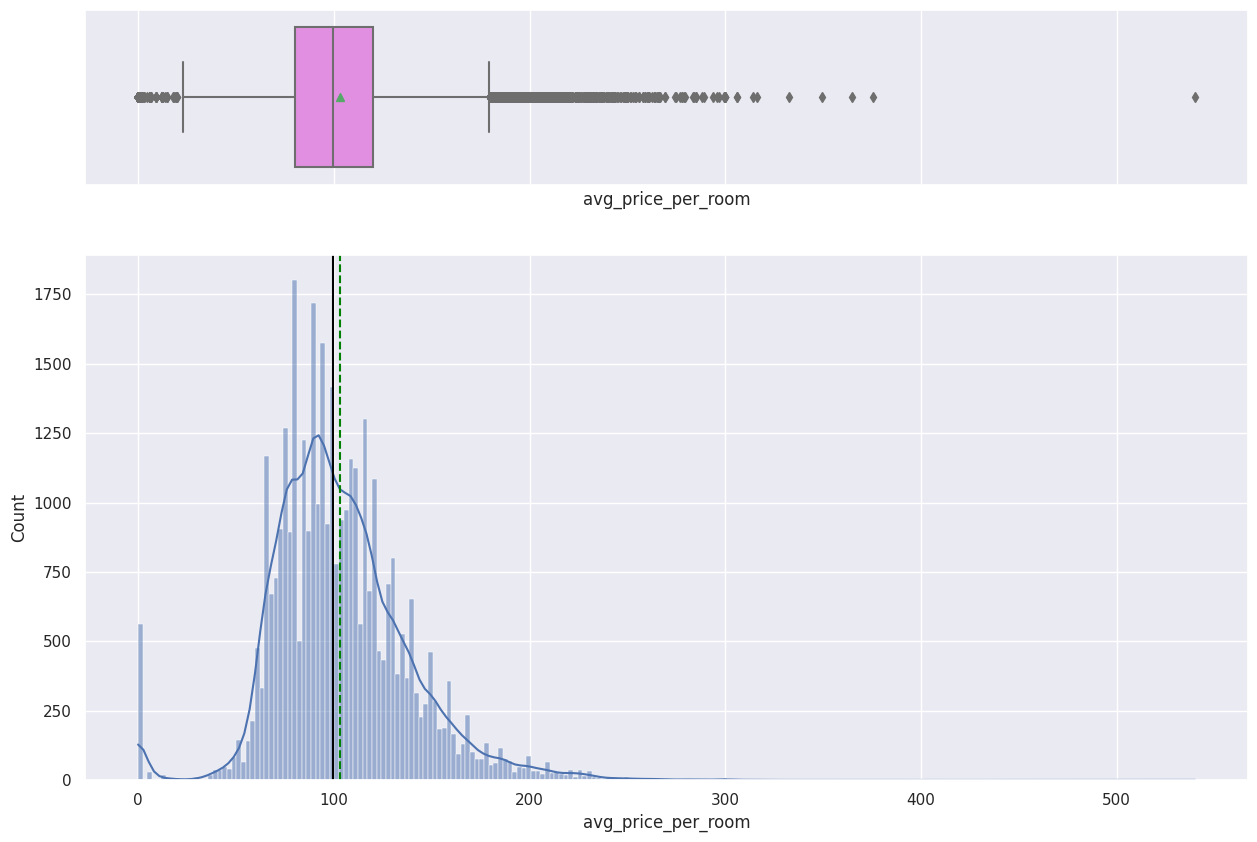

In [ ]:
histogram_boxplot(data, "avg_price_per_room", kde=True)

- The mean (or average) price per room per day is 103.42 euros, with a standard deviation of 35.09 euros.
- The minimum value is 0.00, which could indicate that some reservations were given free of charge. 
- The maximum price per room per day is 540.00 euros, which is significantly higher than the other values in this column. We would need to look at this data closely as it could indicate outliers
- Since the mean is slightly higher than the median, we can say that the distribution of the avg_price_per_room column is slightly skewed to the right.

###A17. Observations on lead time - booking date and guest arrival

In [ ]:
data['lead_time'].describe()

count   36275.0000
mean       85.2326
std        85.9308
min         0.0000
25%        17.0000
50%        57.0000
75%       126.0000
max       443.0000
Name: lead_time, dtype: float64

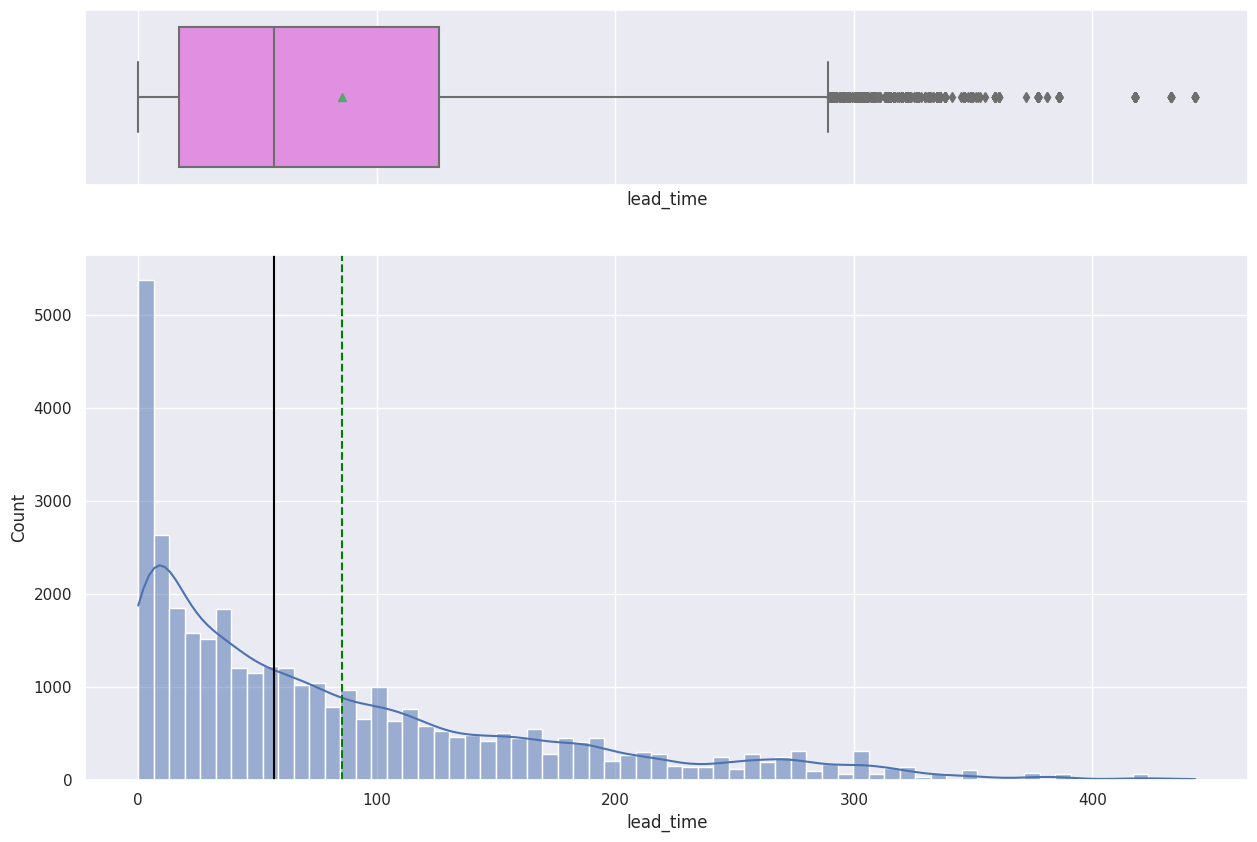

In [ ]:
histogram_boxplot(data, "lead_time", kde=True)

- The minimum lead time is 0 days, which suggests that some bookings were made for the same day as the arrival date.
- The maximum lead time is 443 days, indicating that some bookings were made nearly a year in advance.
- Also, we can see that the median (50th percentile) lead time is 57 days, which means that half of the bookings had a lead time of 57 days or less.
- The interquartile range (IQR), which is the range between the 25th and 75th percentile, is 109 days. This suggests that most bookings have a lead time between 17 and 126 days, with a large spread of values beyond this range.
- Finally, as the mean(85.23 days) is higher than the median(57 days), suggests that the distribution of lead times is skewed to the right. This could be due to some bookings as we observed, having very long lead times that are pulling the mean up.
- There are quite a lot of outliers on the far right of the boxplot.

###A18. Observation on Hotel Incentives

In [ ]:
# Lets find out how many Free Rooms does the hotel give away

# count the number of records where the avg_price_per_room is equal to 0.00
free_rooms = data[data['avg_price_per_room'] == 0.00]

# Count the number of free rooms and print the result
num_free_rooms = free_rooms.shape[0]

print("INN hotel gave away {} free rooms.".format(num_free_rooms))

INN hotel gave away 545 free rooms.


In [ ]:
# Count the number of free rooms offered by each room type and print the result
free_rooms_by_type = free_rooms.groupby('room_type_reserved').size()
print(free_rooms_by_type)

room_type_reserved
Room_Type 1    388
Room_Type 2     25
Room_Type 3      2
Room_Type 4     57
Room_Type 5     17
Room_Type 6     16
Room_Type 7     40
dtype: int64


 - INN hotel gave away 545 free rooms.
 - As a marketing effort, free rooms were offered mostly to customers booking with Room Type 1 reservations

## **B. EDA - BIVARIATE ANALYSIS**

I plan to do the Corelation Map in the statrt itself with the original DF to eliminate the ned to drop aditional variables created for EDA

### Transform booking_status to 1 for Cancelled and 0 Not canceled 

In [ ]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x=="Canceled" else 0) 

### CORRELATION BETWEEN VARIABLES

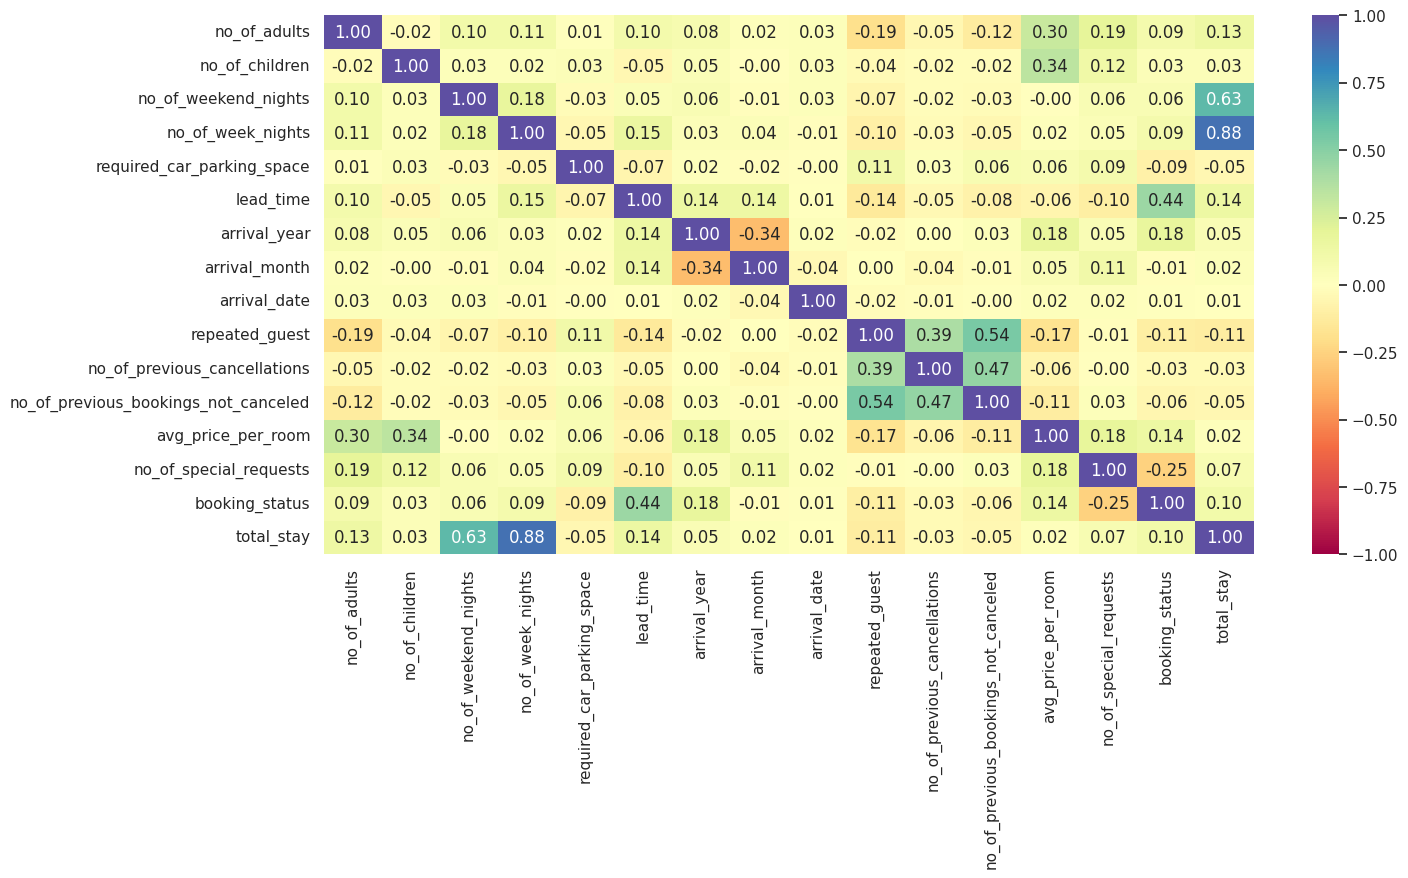

In [ ]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

Observaton of Correlation

- *There is a positive correlation between lead time and booking status*
- Mostly. the independent variables shows very weak or not relevant correlations.
- Average price per room and No of people (adult + children): There is a positive correlation that suggest that the price per room increases as the number of people staying in the room increases.
- Booking status and Lead time: There is a positive and weak correlation suggesting that as the lead time increases, the probability of a booking being cancelled decreases.
- No of previous bookings not cancelled and Repeated guest: There is a positive correlation suggesting that guests who have not cancelled previous bookings are more likely to be repeated guests.
-No of previous cancellations and No of previous bookings not cancelled: There is a positive correlation suggesting that guests who have cancelled previous bookings are more likely to have a higher number of previous bookings that were also cancelled (ie. therefore less likely to have previous bookings that were not cancelled.)

###B1. Observation between Average Room Rate and Cancelled Booking

In [ ]:
# lets see what could be the average room rate for cancelled bookings

avg_rate_cancelled = round(data[data['booking_status'] == 1]['avg_price_per_room'].mean(),2)
print('Average room rate for cancelled bookings (in Euros):',avg_rate_cancelled)

Average room rate for cancelled bookings (in Euros): 110.59


###B2. Observations on the number of weekday nights and weeknd nights & total stay

In [ ]:
# create a new column for total number of nights
data['total_nights'] = data['total_stay']

# find the maximum value of the total nights column
longest_stay = data['total_nights'].max()

# print the result
print('Longest reservation booking made by a guest is: ',longest_stay, "day(s)", "\n")

# find the customer IDs with the longest reservation booking
customer_ids = data[data['total_nights'] == longest_stay]['Booking_ID']

# print the customerID result
print('Customer IDs with the longest reservation booking is:',customer_ids, "\n")

# Group the data by no_of_weekend_nights and calculate the sum of no_of_week_nights
week_nights_by_weekend_nights = data.groupby('no_of_weekend_nights')['no_of_week_nights'].sum()

# Print the results
print(week_nights_by_weekend_nights)

Longest reservation booking made by a guest is:  24 day(s) 

Customer IDs with the longest reservation booking is: 19512    INN19513
Name: Booking_ID, dtype: object 

no_of_weekend_nights
0    36518
1    19502
2    21230
3      987
4     1035
5      386
6      286
7       17
Name: no_of_week_nights, dtype: int64


- Longest reservation booking made by guest is 24 days
- Longest booking is : 7 Weekend Nights with 17 week nights by 1 Guest (ID : INN19513)

###B3. Differences in room prices in different market segments

In [ ]:
# Group the data by market segment and calculate the average price per room
avg_price_by_segment = data.groupby('market_segment_type')['avg_price_per_room'].mean()

# Reset the index to make sure it is unique
avg_price_by_segment = avg_price_by_segment.reset_index()

# Print the results
print(avg_price_by_segment)


  market_segment_type  avg_price_per_room
0            Aviation            100.7040
1       Complementary              3.1418
2           Corporate             82.9117
3             Offline             91.6327
4              Online            112.2569


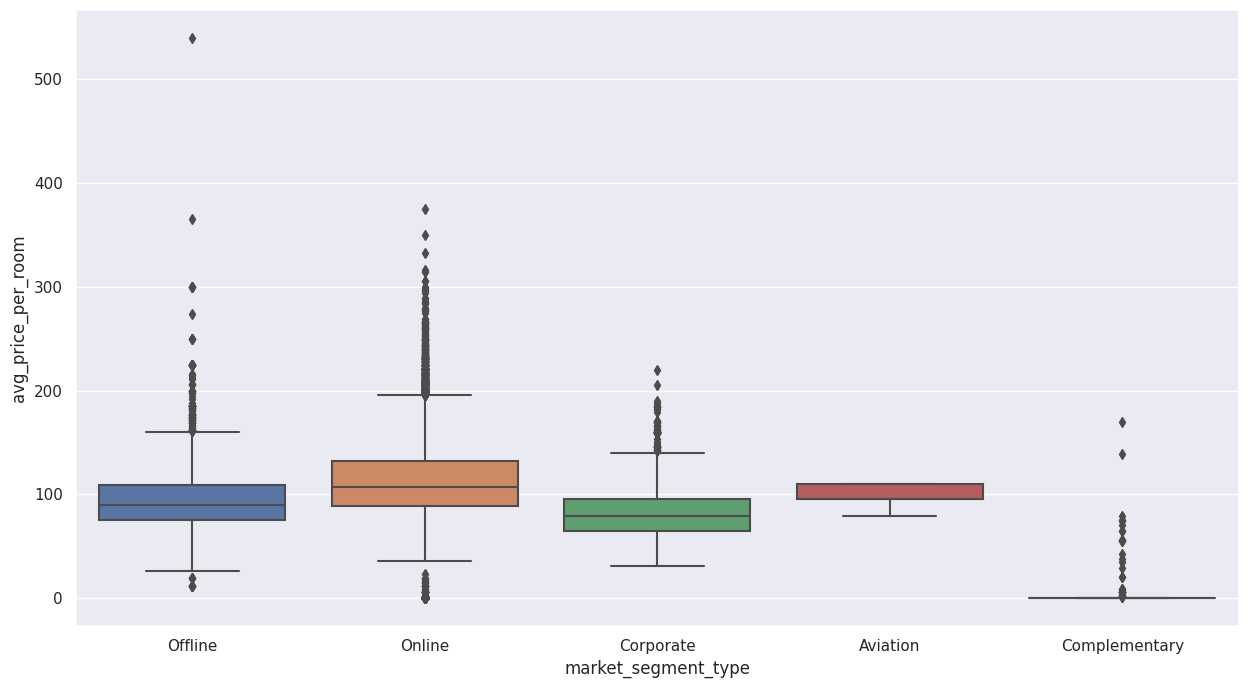

In [ ]:
sns.boxplot(data=data, y='avg_price_per_room' , x='market_segment_type');

The boxplot visualization shows the average price per room for each market segment at INN hotel. 

- From the above plot, Online market segment has the highest average price per room (112.2569 EUR) : suggesting that this segment is willing to pay more for a room, and therefore, the hotel should focus on attracting more customers from this segment to increase revenue. 
- The Aviation market segment is the second highest with an average price per room of 100.7040 EUR. This segment usually consist of guests who are airline crew members or passengers with long layovers. This could be due to these guests requiring hotel accommodations near airports for short periods of time.

###B4. Observation on Repeating Guest and Booking Status

In [ ]:
# Count the number of repeating guests who canceled their bookings
repeating_guest_cancelled = data[(data['repeated_guest'] == 1) & (data['booking_status'] == 1)]['booking_status'].count()

# Count the total number of repeating guests
total_repeating_guests = data[data['repeated_guest'] == 1]['repeated_guest'].count()

# Calculate the percentage of repeating guests who canceled their bookings
percentage_cancelled = (repeating_guest_cancelled / total_repeating_guests) * 100

#print("Percentage of repeating guests who canceled their bookings:", round(percentage_cancelled, 2), "%")
print(f"{percentage_cancelled:.2f}% of repeating guests cancelled.")

1.72% of repeating guests cancelled.


booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


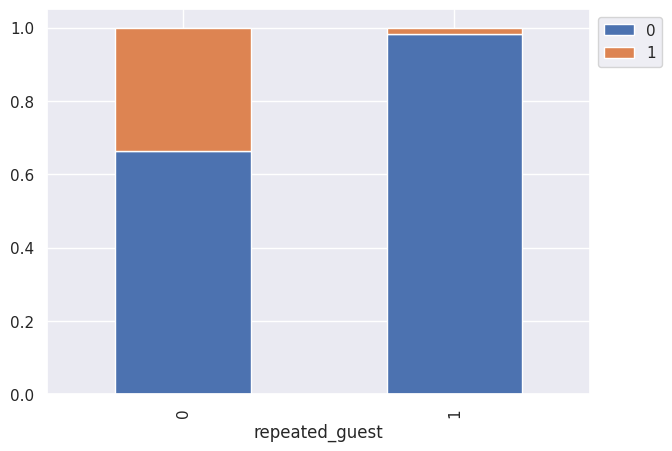

In [ ]:
stacked_barplot(data,'repeated_guest','booking_status')

~ Bookings from recurring guest who cancelled is quite low - 1.72% only or [ (16/930) * 100 = 1.72% ]

From this table, we can see that repeated guests are much less likely to cancel their bookings compared to non-repeated guests (only 1.7% of bookings by repeated guests were canceled, compared to 33.5% of bookings by non-repeated guests).

###B5. Observation between Booking Status and No of Adults 

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


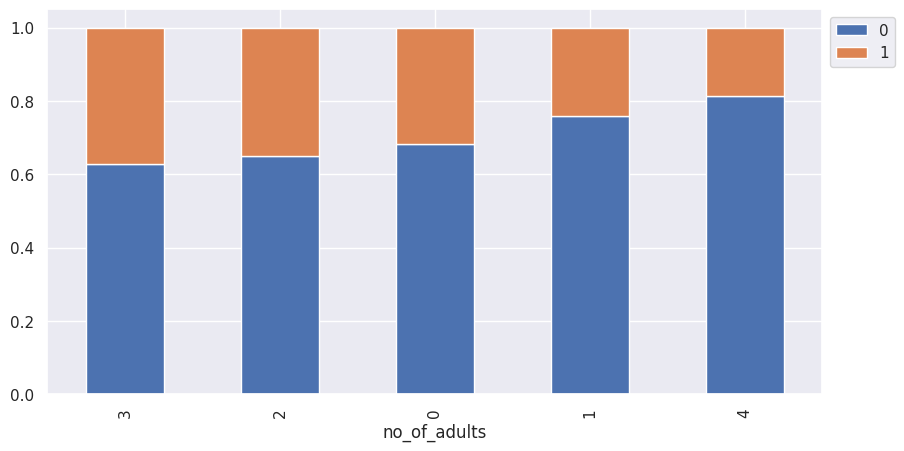

In [ ]:
stacked_barplot(data, "no_of_adults", "booking_status")

- There is more cancellaton of bookings where the number of adults are 2
- Where there are more than 2 adults, the percentage/chances of booking cancellation is very low comparatiely.

###B6 Observation betwen Booking status and No of children

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


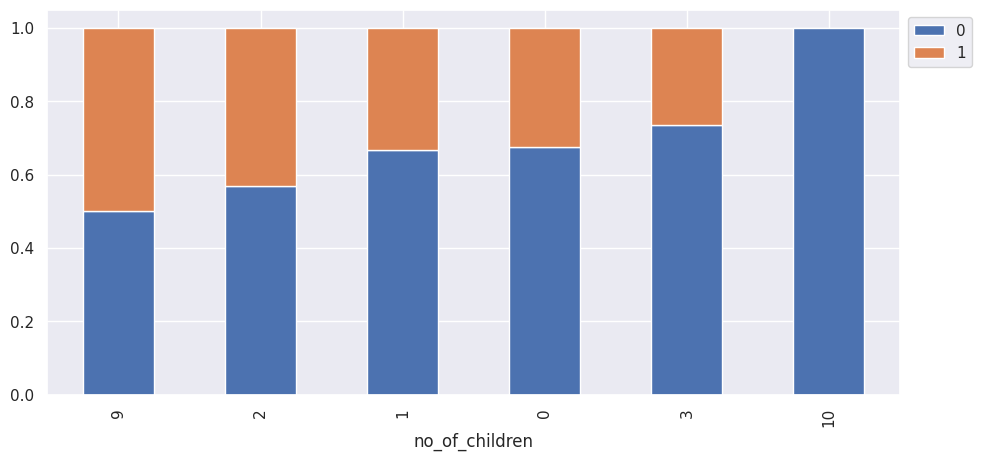

In [ ]:
stacked_barplot(data, "no_of_children", "booking_status")

- Out of all bookings, 33577 (92.60%) had no children.
- Out of all bookings, 24390 (67.20%) were not canceled and 11885 (32.80%) were canceled.
- Among bookings with no children, 22695 (67.60%) were not canceled and 10882 (32.40%) were canceled.
- Among bookings with one child, 1078 (66.60%) were not canceled and 540 (33.40%) were canceled.
- Among bookings with two children, 601 (56.80%) were not canceled and 457 (43.20%) were canceled.
- There were only 2 bookings with 9 or 10 children, and both of them were canceled.

From these observations, we can see that bookings with no children have the highest number of both not-canceled and canceled bookings. 

Furthermore, the number of bookings with 9 or 10 children is very low (only 2 bookings), so the observation may not be representative of the population.

###B7. Observation between Repeating Guest and Market Segment

In [ ]:
# to create a table showing count of repeating guests and the market segment

table = pd.crosstab(data['repeated_guest'], data['market_segment_type'])
print(table)

market_segment_type  Aviation  Complementary  Corporate  Offline  Online
repeated_guest                                                          
0                         109            265       1415    10438   23118
1                          16            126        602       90      96


Observation
- There are some vast differences in market segment preferences between repeating and non-repeating guests
- For non-repeated guest (0) : majority of booking came via online booking (23,118 bookings or 72.7%), and offline (10,438 bookings or 32.9%). The least common market segment was Aviation with only 109 bookings (0.3%).
-  Non-repeating guests have a higher number of bookings through the offline segment (10438 bookings) compared to repeating guests (90 bookings).
- For repeated guest (1) : the majority of bookings came from the Corporate market segment (602 bookings or 64.8%), followed by the Complementary segment (126 bookings or 13.5%)
. The least common market segment was Aviation with only 16 bookings (1.7%).

###B8. Observations between lead time and booking status 'Canceled'

In [ ]:
''' to find out what was the median, the lowest and highest lead time (Number of days between the date of booking and the arrival date)
where thee booking status had been cancelled
'''

cancelled_bookings = data[data['booking_status'] == 1]
cancelled_lead_times = cancelled_bookings['lead_time']
print(cancelled_lead_times.describe())

count   11885.0000
mean      139.2155
std        98.9477
min         0.0000
25%        55.0000
50%       122.0000
75%       205.0000
max       443.0000
Name: lead_time, dtype: float64


 - There were 11,885 cancelled bookings in the dataset and the lead time for these bookings range between 0 to 443 days.
 - The minimum lead time for cancelled bookings is 0, meaning that there were some last minute cancellation, wih bookings made on the same day.
 - The average lead time for cancelled bookings was 139 days
 - The median lead time was 122 days, indicating that 50% of the cancelled bookings had a lead time of 122 days or less.
 - The 25th percentile of lead times was 55 days, and the 75th percentile was 205 days, which means that 25% of cancelled bookings had a lead time of 55 days or less, and 75% had a lead time of 205 days or less.
 - The maximum lead time for cancelled bookings is 443, meaning that there were some bookings that were cancelled almost a year in advance.

 Suggestions 
 - One suggestion could be to encourage customers to make their bookings closer to the actual stay date to minimize the lead time and reduce the likelihood of cancellations. 
 - Another suggestion could be to offer more flexible cancellation policies to customers who book far in advance, as they may be more likely to cancel due to unforeseen circumstances such as changes in travel plans.
 - Additionally, having more valuable data such as Reason for cancellation could provide valuable insights into areas for improvement in the booking and hotel services.

###B9. Observation between Bookng Status and Type of Day

0    11779
1     5093
Name: booking_status, dtype: int64 

0   69.8139
1   30.1861
Name: booking_status, dtype: float64


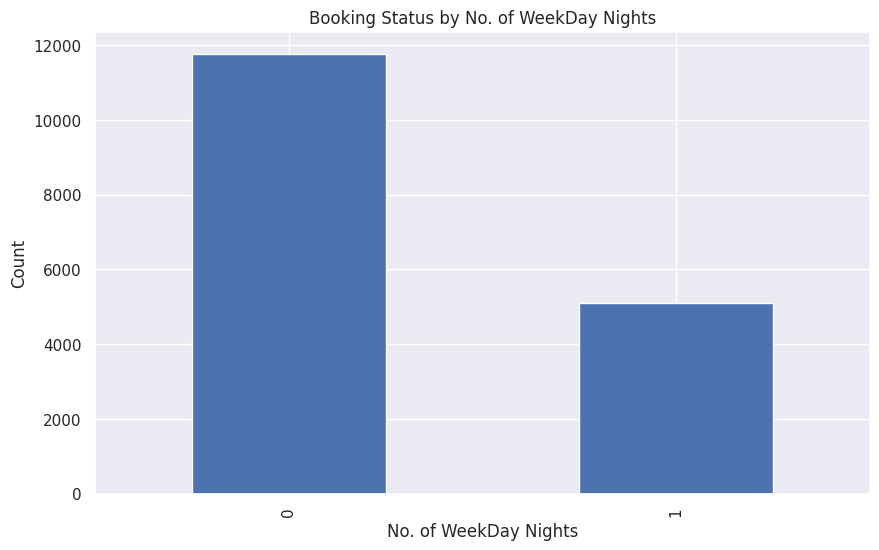

In [ ]:
# this is to print the count for the number of weekday bookings only (ie. weekend_nights ==0)
# and to determine the count of only the cancelled booking status

count_booking_status = data[data['no_of_weekend_nights'] == 0]['booking_status'].value_counts()
total_bookings = count_booking_status.sum()

percentages = count_booking_status / total_bookings * 100
print(count_booking_status,"\n")
print(percentages)

# plot the stacked bar plot
ax = count_booking_status.plot(kind='bar', stacked=True, figsize=(10, 6))
# set the labels and title
ax.set_xlabel('No. of WeekDay Nights')
ax.set_ylabel('Count')
ax.set_title('Booking Status by No. of WeekDay Nights')

# show the plot
plt.show()

- A total of 16,872 bookings were made for the week day and a total of **5093 (30%) bookings were cancelled during the week day**

In [ ]:
# Filter the DataFrame to include only rows where no_of_weekend_nights > 0
weekend_bookings = data[data['no_of_weekend_nights'] > 0]

# Count the number of rows in the filtered DataFrame
num_weekend_bookings = len(weekend_bookings)

# Print the number of weekend bookings
print(f"The total number of bookings (weekend and weekday) made is : {num_weekend_bookings}","\n")

counts_weekend = data[data['no_of_weekend_nights'] > 0]['booking_status'].value_counts()
print(counts_weekend)

The total number of bookings (weekend and weekday) made is : 19403 

0    12611
1     6792
Name: booking_status, dtype: int64


- A total of 19,403 bookings were made with a combination of weekends and weekdays and **a total of 6,792 bookings were cancelled.**

In [ ]:
# to show the count for the rows where weekend_night > 0 (ie. does not include weekend) where bookings are canceled
counts = data[(data['no_of_weekend_nights'] > 0) & (data['booking_status'] == 1)].groupby(['no_of_weekend_nights', 'booking_status']).size().reset_index(name='counts')

# Print the counts for each combination of no_of_weekend_nights and booking_status
print(counts)

   no_of_weekend_nights  booking_status  counts
0                     1               1    3432
1                     2               1    3157
2                     3               1      74
3                     4               1      83
4                     5               1      29
5                     6               1      16
6                     7               1       1


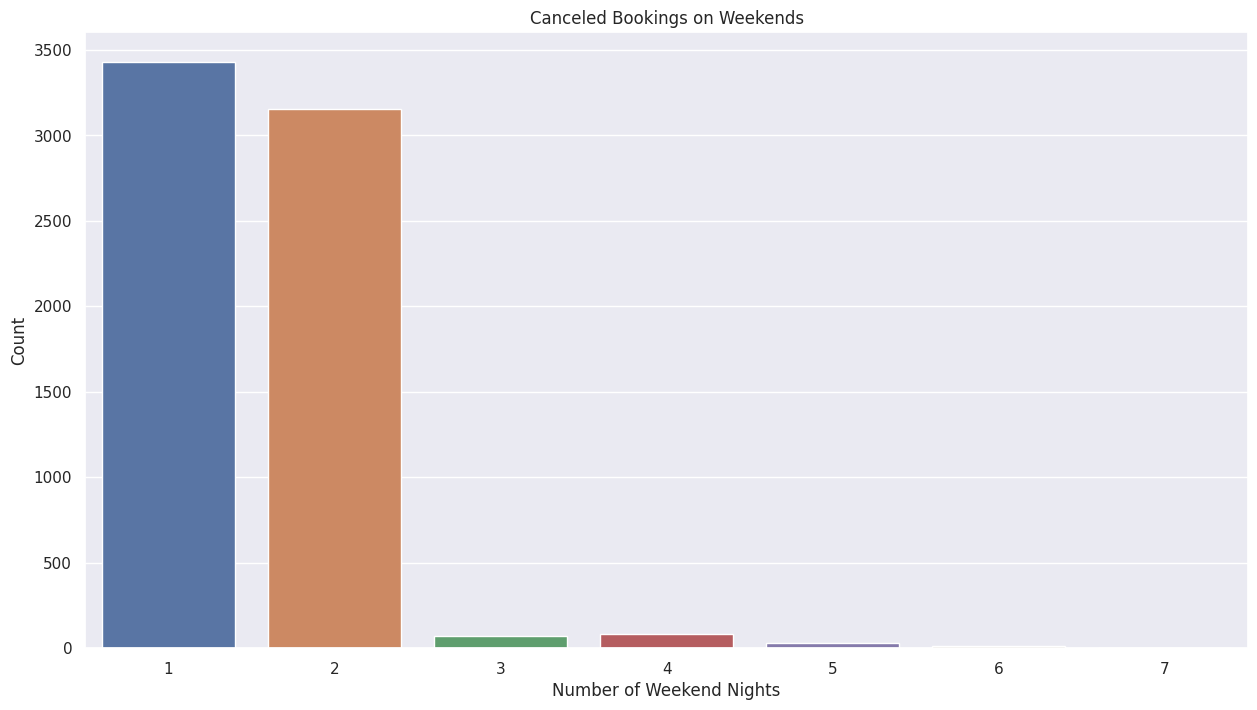

In [ ]:
canceled_weekend_bookings = data[(data['no_of_weekend_nights'] > 0) & (data['booking_status'] == 1)]

# Plot the count of canceled bookings on weekends
sns.countplot(x='no_of_weekend_nights', data=canceled_weekend_bookings)
plt.title('Canceled Bookings on Weekends')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Count')
plt.show()

- Of the cancelled bookings, the highest cancellation was booking with 1 Weekend Night (3432 bookings)

###B10. Observation of Average Room Rate and Stay Period

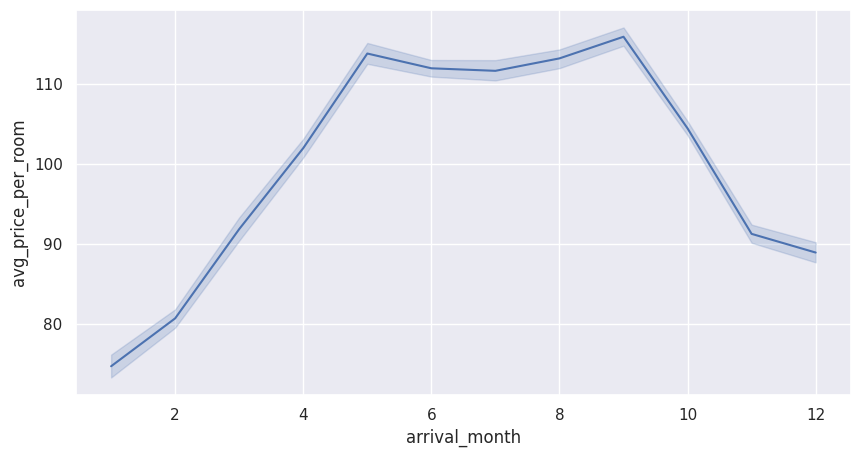

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

- We observed that the average room rate is at its peak during the months of May and September

###B11. Observations between booking status and market segment

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


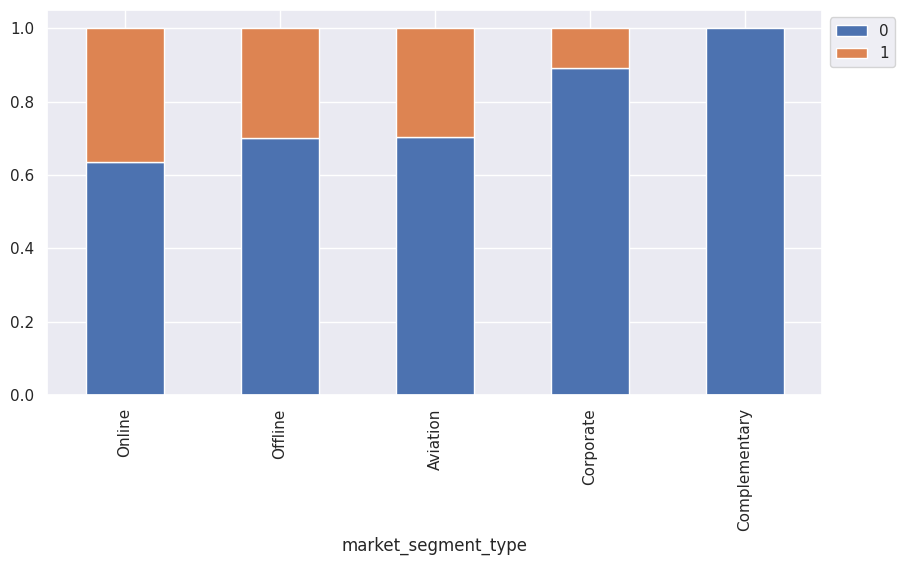

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

- From a total of 36,275 bookings, the Complementary Market segment had no booking cncellation
- Bookings via online showed the highest cancellation, approximately 36.5%
- Bookings via Offline and Aviation are close together at 29.9% and 29.6% respectively.

- *Aviation and offline market segment type show approximately equal number of cancellations(30%)*
- *Bookings from the online market segment type show the highest number of cancellations with approximately 35% cancellations*

###B12. Observation between Special Requirement and Booking Status

In [ ]:
# create the cross-tabulation
booking_special_req = pd.crosstab(data['booking_status'], data['no_of_special_requests'])

# print the cross-tabulation
print(booking_special_req)

no_of_special_requests      0     1     2    3   4  5
booking_status                                       
0                       11232  8670  3727  675  78  8
1                        8545  2703   637    0   0  0


booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


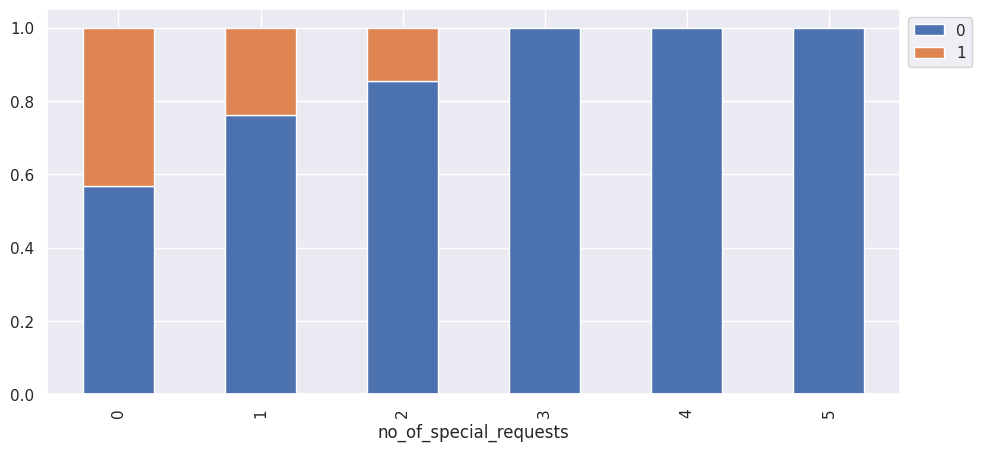

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

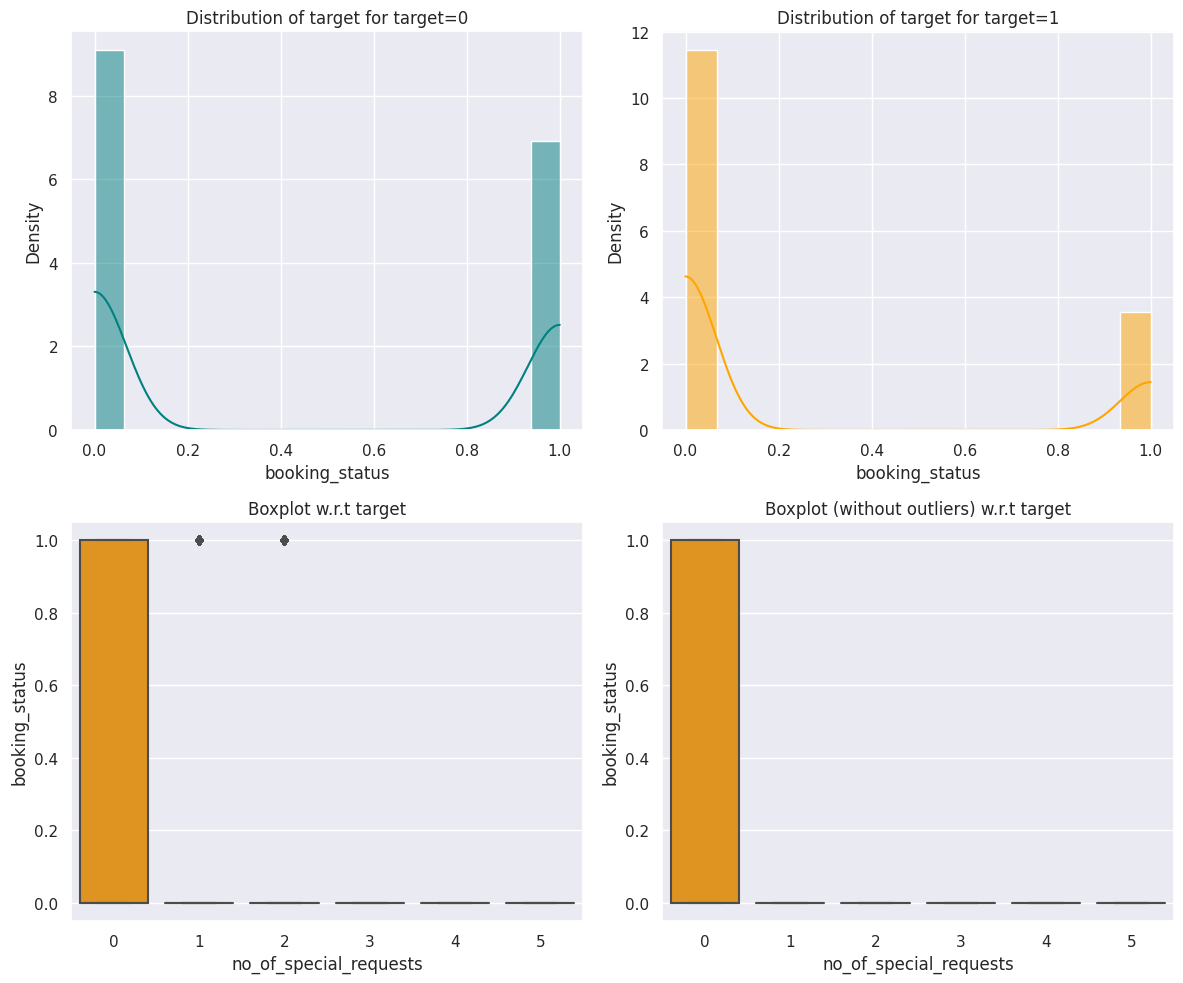

In [ ]:
distribution_plot_wrt_target(data, "booking_status", "no_of_special_requests")

- It appears that for bookings with no special requests (0), there were more cancellations than not, with 8545 cancellations compared to 11232 not canceled.
- However, for bookings with one or more special requests, there were more not canceled bookings than cancellations. 

Overall, this suggests that customers who made special requests with their boookings are more likely to follow through with their bookings.

###B13. Observation betwen Booking Status and Parking space 

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


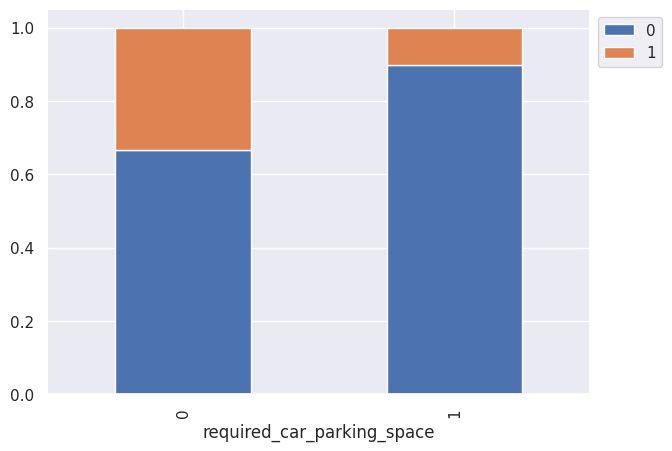

In [ ]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

- *Approximately 10% of bookings that require parking space are cancelled*
- *Approximately  35% of bookings that don't require parking space are cancelled*

### B14. Observation betwen Booking status and type of meal plan

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


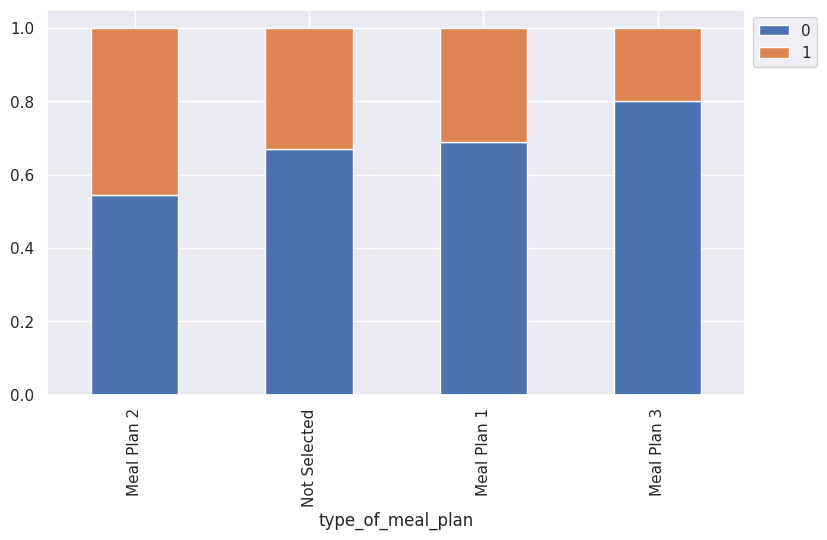

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

- Hotel bookings with meal plan 3 show the least cancellations

###B15. Observation between Booking status and room type reserved

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


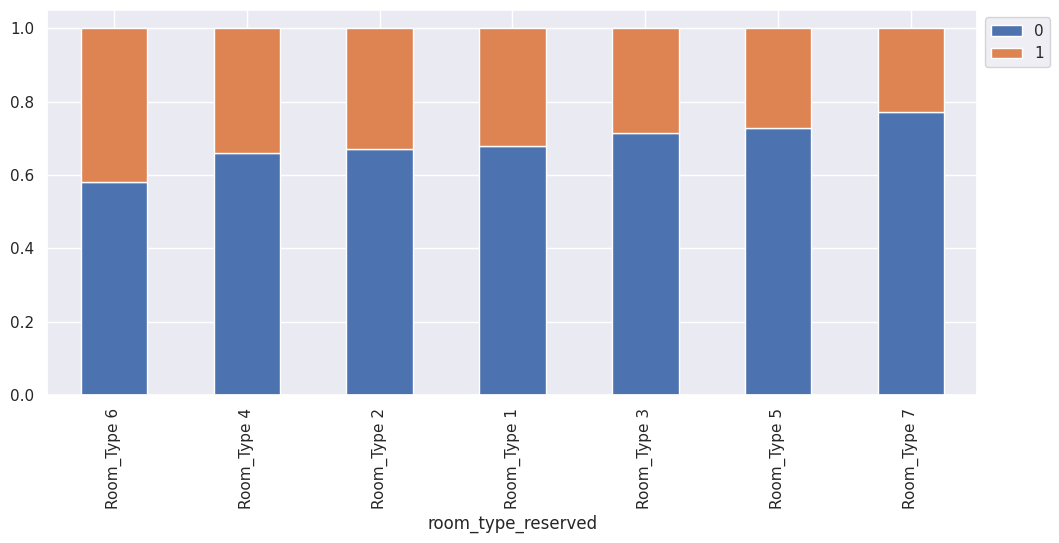

In [ ]:
stacked_barplot(data, "room_type_reserved", "booking_status")

- Bookings reservation of room type 6 shows the most cancellations


###B16. Observation betwen Booking Status and Average Price per room

In [ ]:
# Create a data frame with only cancelled bookings
cancelled_bookings = data[data["booking_status"] == 1]

# Summary of cancelled bookings
cancelled_bookings.describe().T

count      mean     std       min  \
no_of_adults                         11885.0000    1.9095  0.4862    0.0000   
no_of_children                       11885.0000    0.1244  0.4409    0.0000   
no_of_weekend_nights                 11885.0000    0.8875  0.9193    0.0000   
no_of_week_nights                    11885.0000    2.3923  1.5831    0.0000   
required_car_parking_space           11885.0000    0.0096  0.0975    0.0000   
lead_time                            11885.0000  139.2155 98.9477    0.0000   
arrival_year                         11885.0000 2017.9191  0.2726 2017.0000   
arrival_month                        11885.0000    7.3743  2.6554    1.0000   
arrival_date                         11885.0000   15.7301  8.7839    1.0000   
repeated_guest                       11885.0000    0.0013  0.0367    0.0000   
no_of_previous_cancellations         11885.0000    0.0056  0.2419    0.0000   
no_of_previous_bookings_not_canceled 11885.0000    0.0022  0.1297    0.0000   
avg_price_per_room                   11885.0000  110.5900 32.2644    0.0000   
no_of_special_requests               11885.0000    0.3346  0.5743    0.0000   
booking_status                       11885.0000    1.0000  0.0000    1.0000   
total_stay                           11885.0000    3.2798  2.0355    0.0000   
total_nights                         11885.0000    3.2798  2.0355    0.0000   

                                           25%       50%       75%       max  
no_of_adults                            2.0000    2.0000    2.0000    4.0000  
no_of_children                          0.0000    0.0000    0.0000    9.0000  
no_of_weekend_nights                    0.0000    1.0000    2.0000    7.0000  
no_of_week_nights                       1.0000    2.0000    3.0000   17.0000  
required_car_parking_space              0.0000    0.0000    0.0000    1.0000  
lead_time                              55.0000  122.0000  205.0000  443.0000  
arrival_year                         2018.0000 2018.0000 2018.0000 2018.0000  
arrival_month                           5.0000    8.0000   10.0000   12.0000  
arrival_date                            8.0000   16.0000   23.0000   31.0000  
repeated_guest                          0.0000    0.0000    0.0000    1.0000  
no_of_previous_cancellations            0.0000    0.0000    0.0000   13.0000  
no_of_previous_bookings_not_canceled    0.0000    0.0000    0.0000   12.0000  
avg_price_per_room                     89.2700  108.0000  126.3600  540.0000  
no_of_special_requests                  0.0000    0.0000    1.0000    2.0000  
booking_status                          1.0000    1.0000    1.0000    1.0000  
total_stay                              2.0000    3.0000    4.0000   24.0000  
total_nights                            2.0000    3.0000    4.0000   24.0000

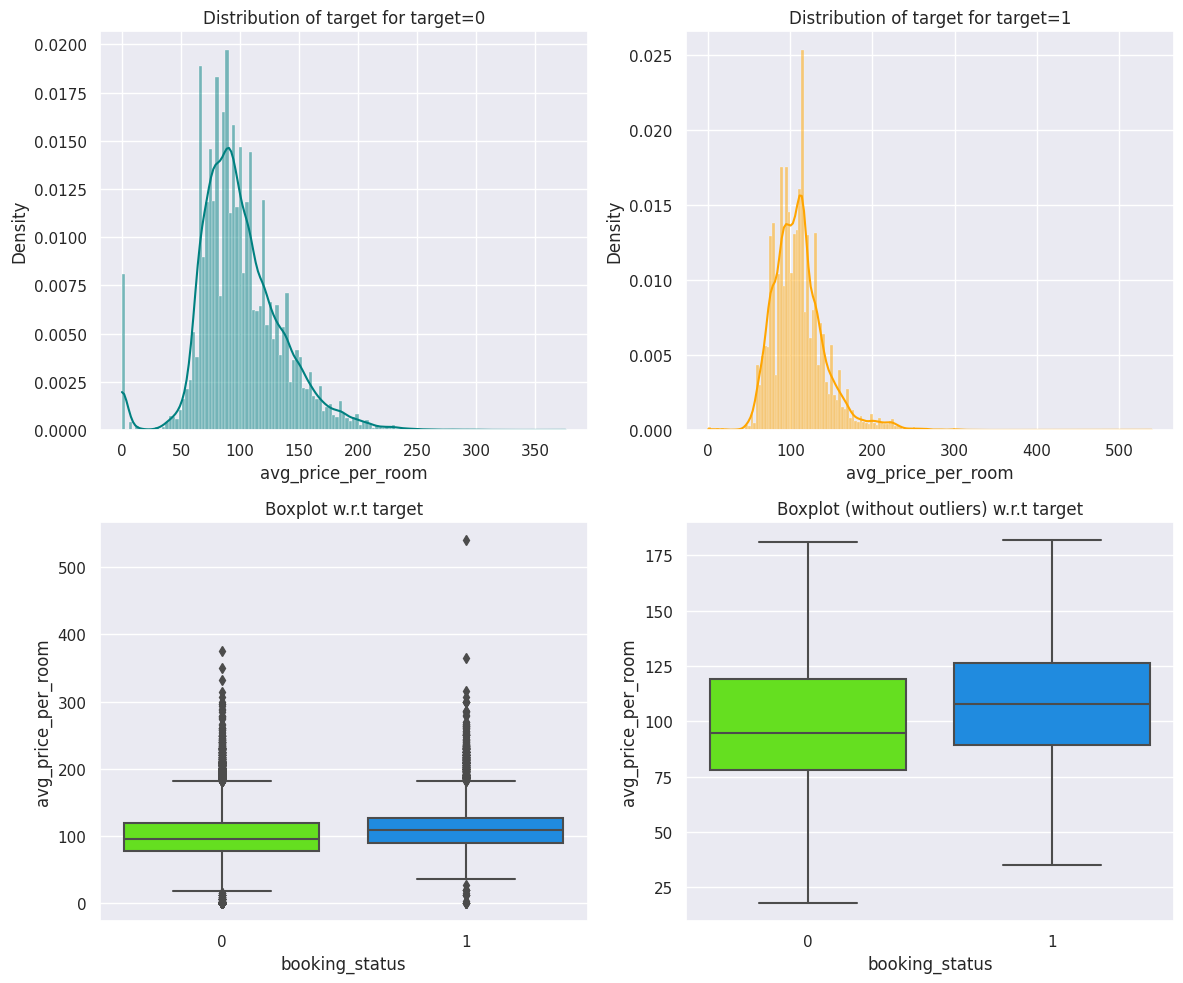

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Observations:
- The average price of rooms for cancelled bookings is about 110 Euros

###B17. Observation betwen Booking status and Lead Time

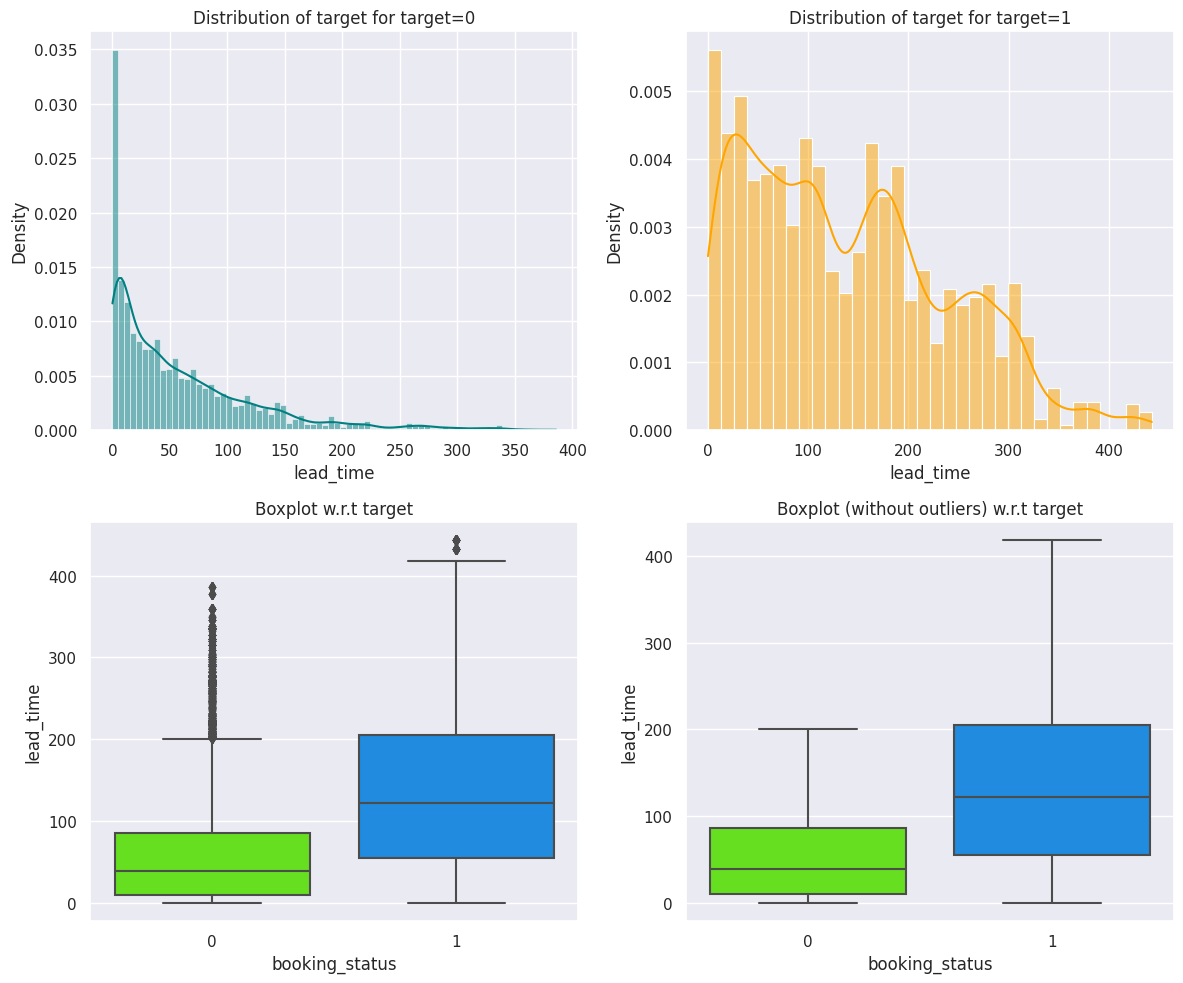

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

- *The average lead time of cancelled bookings is about 139 days.*

###B18. Number of special requests of  the customers vs price of the rooms  

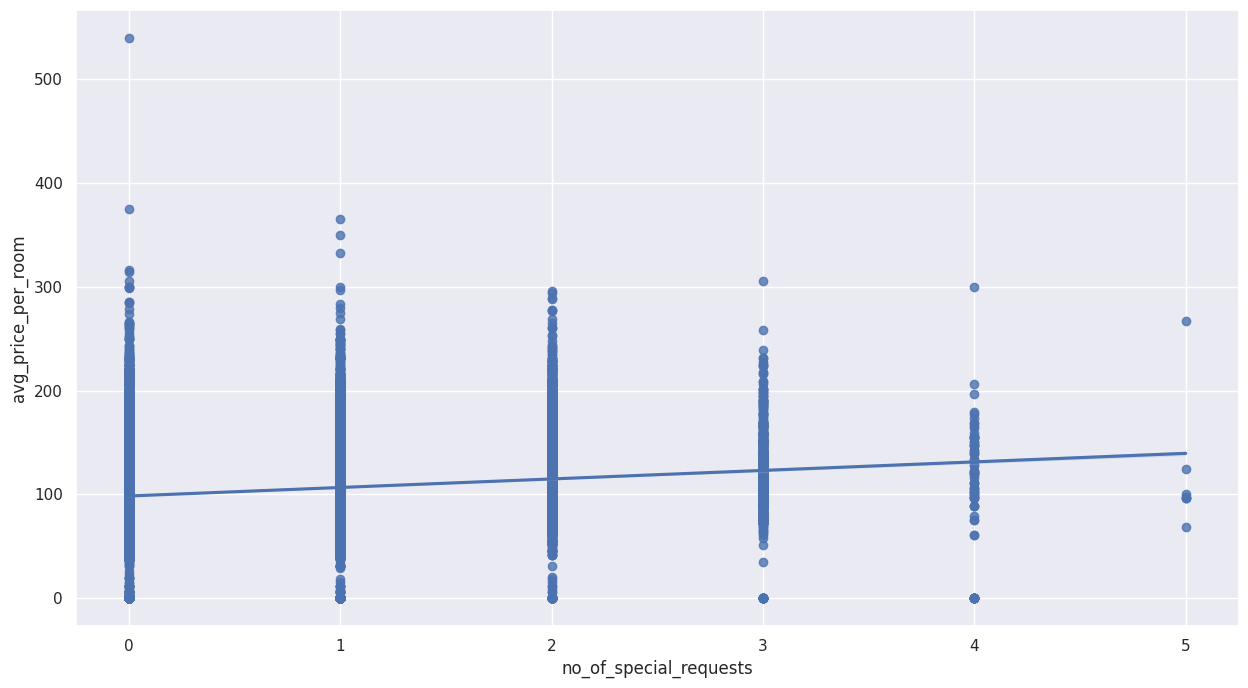

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(data=data, x = "no_of_special_requests", y = "avg_price_per_room");

Observations:
- *As the number of special requests increase, Average price per room tends to increase, though not a very steep increament.*

## **C. EDA - MULTIVARIATE ANALYSIS**

###C1. Observations between lead time, booking status and repeating guests

In [ ]:
# check the lead time for repeating guests who canceled

repeating_guests_canceled = data[(data['repeated_guest'] == 1) & (data['booking_status'] == 1)]
lead_time_repeating_guests_canceled = repeating_guests_canceled['lead_time']
print(lead_time_repeating_guests_canceled.describe())

count    16.0000
mean    211.7500
std     129.3262
min      34.0000
25%      90.2500
50%     190.0000
75%     361.0000
max     361.0000
Name: lead_time, dtype: float64


In [ ]:
#a table showing the different booking status with lead time of repeating guests and non-repeating guests, 
pivot_table = pd.pivot_table(data, values='lead_time', index=['booking_status'], 
                             columns=['repeated_guest'], aggfunc='mean')
print(pivot_table)


repeated_guest        0        1
booking_status                  
0               60.8430   9.7199
1              139.1177 211.7500


Observation
- the lead time for repeating guests who canceled has a mean of 211 days and a standard deviation of 129 days. The minimum lead time was 34 days and the maximum was 361 days and there were 16 observations in total

This suggests that, on average, repeating guests who canceled their bookings tend to book further in advance compared to other guests.

- From the pivot table, it shows
    - For non-repeating guests (repeated_guest = 0), the average lead time is 139 days for canceled bookings and 61 days for not canceled bookings.
    - For repeating guests (repeated_guest = 1), the average lead time is 212 days for canceled bookings and 10 days for not canceled bookings.

This again suggests that, on average, repeating guests who cancel their bookings tend to have a longer lead time compared to non-repeating guests who cancel, while repeating guests who do not cancel tend to have a shorter lead time compared to non-repeating guests who do not cancel.

###C2. Observation between Booking Status, Average Room Rate and No of Occupants

In [ ]:
# calculate number of people in a room
data['no_of_people'] = data['no_of_adults'] + data['no_of_children']

# filter data for cancelled bookings
cancelled_bookings = data[data['booking_status'] == 1]

# calculate average price per room for cancelled bookings
avg_price_cancelled = cancelled_bookings['avg_price_per_room'].mean()

# calculate the number of people in a room for cancelled bookings
people_cancelled = cancelled_bookings['no_of_people'].mean()

print('Average price per room for cancelled bookings (in Euros):', round(avg_price_cancelled,2))
print('Average number of people in a room for cancelled bookings:', round(people_cancelled,2))

Average price per room for cancelled bookings (in Euros): 110.59
Average number of people in a room for cancelled bookings: 2.03


In [ ]:
# find out the number of adults and children, and the average room rate where bookings are cancelled.

cancelled_bookings = data[data['booking_status'] == 1]
cancelled_bookings_by_people = cancelled_bookings.groupby(['no_of_adults', 'no_of_children'])['avg_price_per_room'].mean().reset_index()

print(cancelled_bookings_by_people)

    no_of_adults  no_of_children  avg_price_per_room
0              0               2             88.4575
1              1               0            102.7980
2              1               1            110.6252
3              1               2            183.6117
4              2               0            103.5398
5              2               1            128.9218
6              2               2            187.3414
7              2               3            258.4400
8              2               9             76.5000
9              3               0            145.9314
10             3               1            204.6033
11             4               0            256.7267


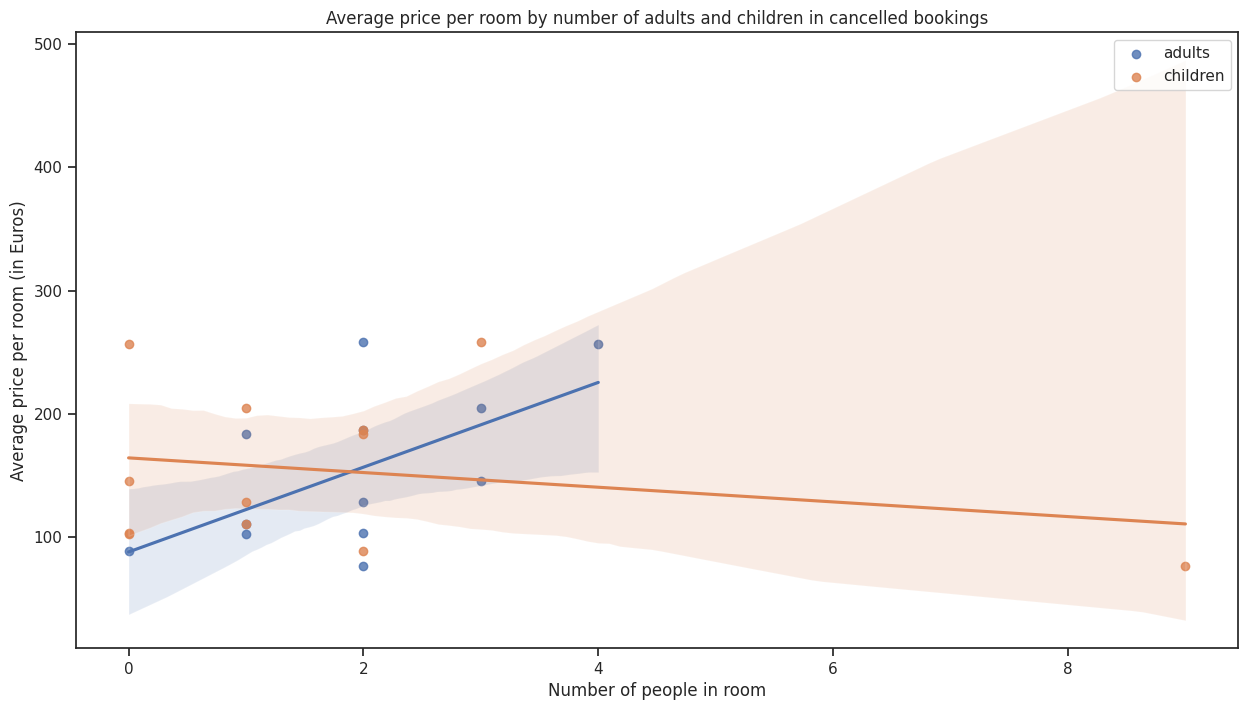

In [ ]:
# visualize for the above observation using regression plot
# two separate regression lines, one for the number of adults and one for the number of children.

sns.set(style='ticks', color_codes=True)

# plot regplot
sns.regplot(x='no_of_adults', y='avg_price_per_room', data=cancelled_bookings_by_people, label='adults')
sns.regplot(x='no_of_children', y='avg_price_per_room', data=cancelled_bookings_by_people, label='children')

plt.legend()
plt.xlabel('Number of people in room')
plt.ylabel('Average price per room (in Euros)')
plt.title('Average price per room by number of adults and children in cancelled bookings')
plt.show()

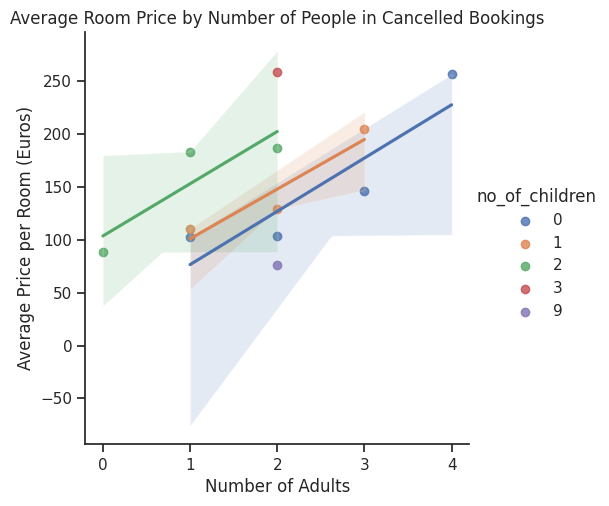

In [ ]:
# combine the two regression lines into one using hue, based on the no_of_children values.

# create scatter plot with regression lines
sns.lmplot(x='no_of_adults', y='avg_price_per_room', data=cancelled_bookings_by_people, hue='no_of_children')

# set axis labels and title
plt.xlabel('Number of Adults')
plt.ylabel('Average Price per Room (Euros)')
plt.title('Average Room Price by Number of People in Cancelled Bookings')

# display the plot
plt.show()

Observation
- For cancelled bookings, the average price per room increases as the number of adults and/or children increase.
-  The highest average price per room is for bookings with 2 adults and 3 children, followed by bookings with 2 adults and 2 children, and then bookings with 4 adults only. 

Importnat to note that there is data where there is 0 adult and 2 children or 2 adults and 9 children. These can be outliers.

### Dropping Unnecesary Columns

Lets drop all columns created for EDA purposes and drop unecesary columns that does not contribute to the modeling

In [ ]:
#drop the boking_id column
data.drop("Booking_ID", axis=1, inplace=True)

In [ ]:
# drop the 'total_stay' column
data.drop(labels=['total_stay'], axis=1, inplace=True)

In [ ]:
# drop the 'total_nights' column
data.drop(labels=['total_nights'], axis=1, inplace=True)

In [ ]:
# drop the 'no_of_people' column
data.drop(labels=['no_of_people'], axis=1, inplace=True)

##Step 4: Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# make a copy of the data frame before making more changes
df = data.copy()

### **Outliers detection and treatment using boxplot**

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Print the list of numerical columns
print(numerical_cols)
print('No of numerical columns are :',len(numerical_cols))

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']
No of numerical columns are : 15


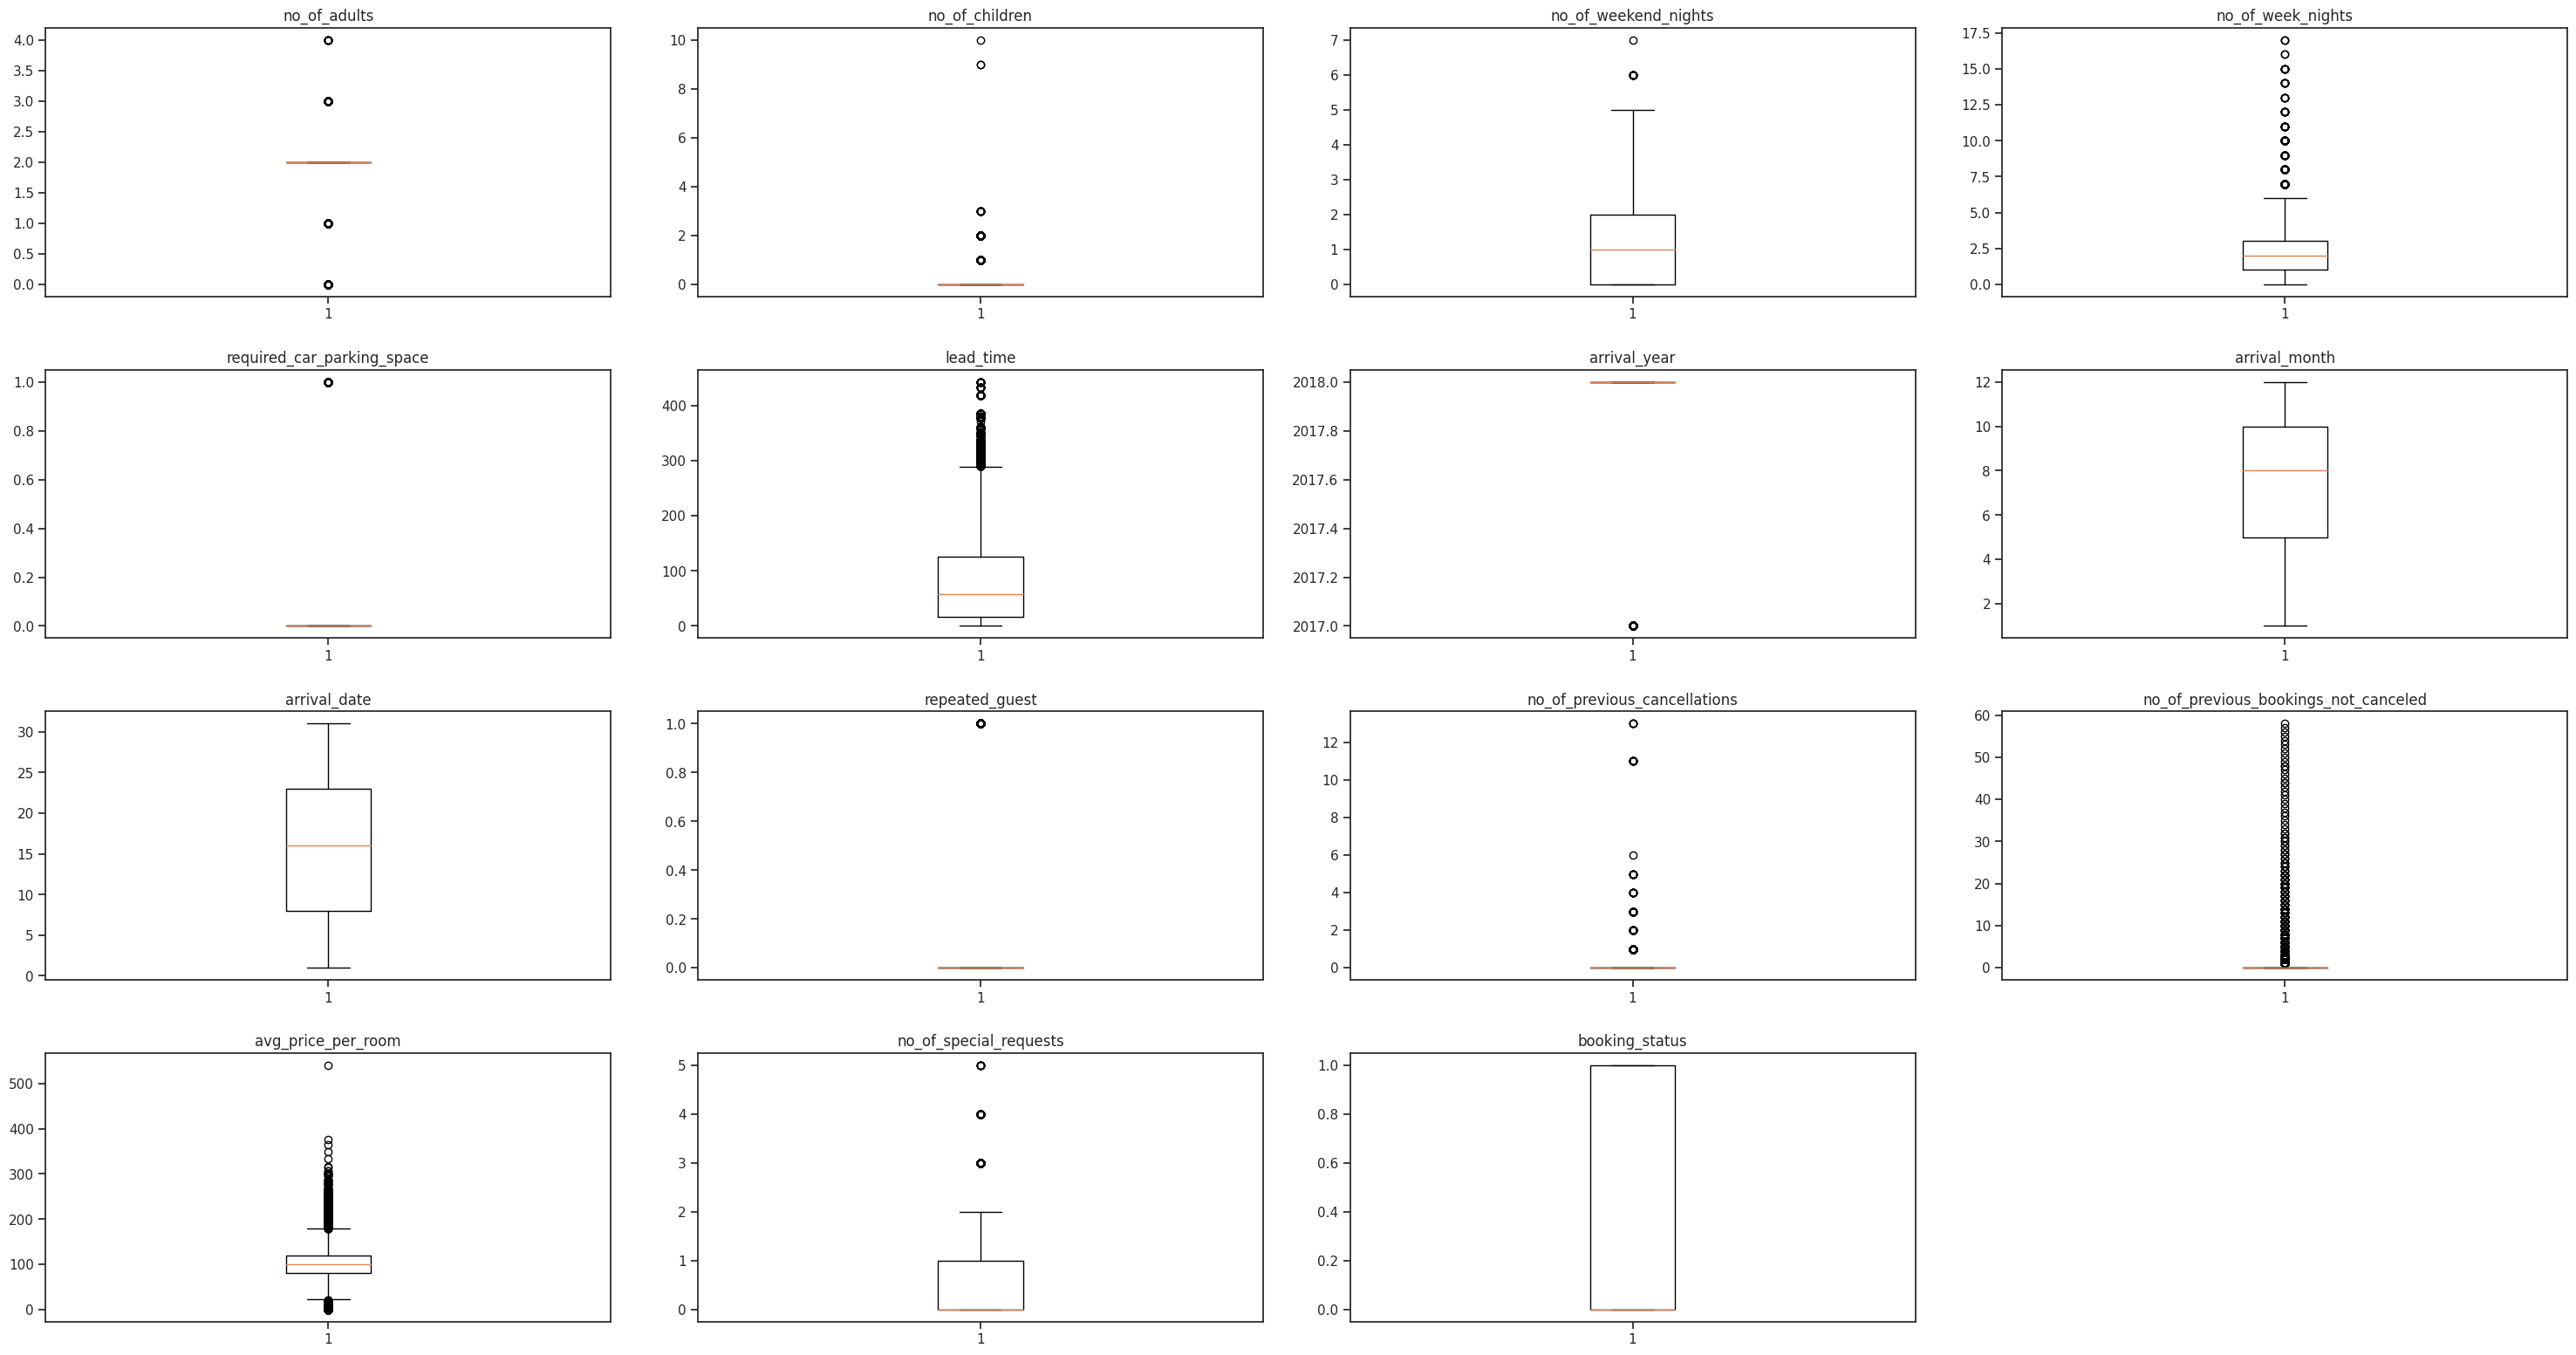

In [ ]:
#Let's check for outliers in the data using boxplots
# to prevent errors in defiing the number of subplots, we can use the ceiling mathematical function to determine the best number of subplots to plot 

import math
n_rows = int(math.ceil(len(numerical_cols)/4))
plt.figure(figsize=(30, n_rows*4))

for i, variable in enumerate(numerical_cols):
    plt.subplot(n_rows, 4, i + 1)         # n_rows by 4 cols
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout(pad = 2)
    plt.title(variable)

plt.show()

Observations:
- Arrival_date and arrival_month both have no outliers 
- The rest of independent variables have outliers
- Not all independent variables wil be treated for outliers like no_of_children and no_of adults whih have narrow boxplots indicating that the data is tightly clustered around the median and there are only a few values that deviate significantly from the median. Treating these outliers will remove the variation in the columns and most likely make them a constant, which is not desirable.


In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# list of columns to treat for outliers
treat_out_cols = ["lead_time", "avg_price_per_room", "no_of_week_nights", "no_of_weekend_nights"]

Note : 
1. I have included *no_of_week_nights* and *no_of_weekend_nights* to be treated for outliers as in the EDA, we know week nights are Monday to Friday and weekend are Staurday and Sunday. Hence, in the EDA, i did observe some rare large values of total stay.
2. I removed 'no_of_previous_cancellations' and 'no_of_previous_bookings_not_canceled' after hiting an error LinAlgError: Singular matrix during fitting logistic regression model. This eror happens when one of the variables in the model is a perfect linear combination of the other variables (highly correlated with each other). I was sucesful after these columns removed from the outlier treatment

In [ ]:
# create a new data frame after treating outliers in the colums
df1 = treat_outliers_all(df, treat_out_cols)

### Validate columns to see if outliers were treated

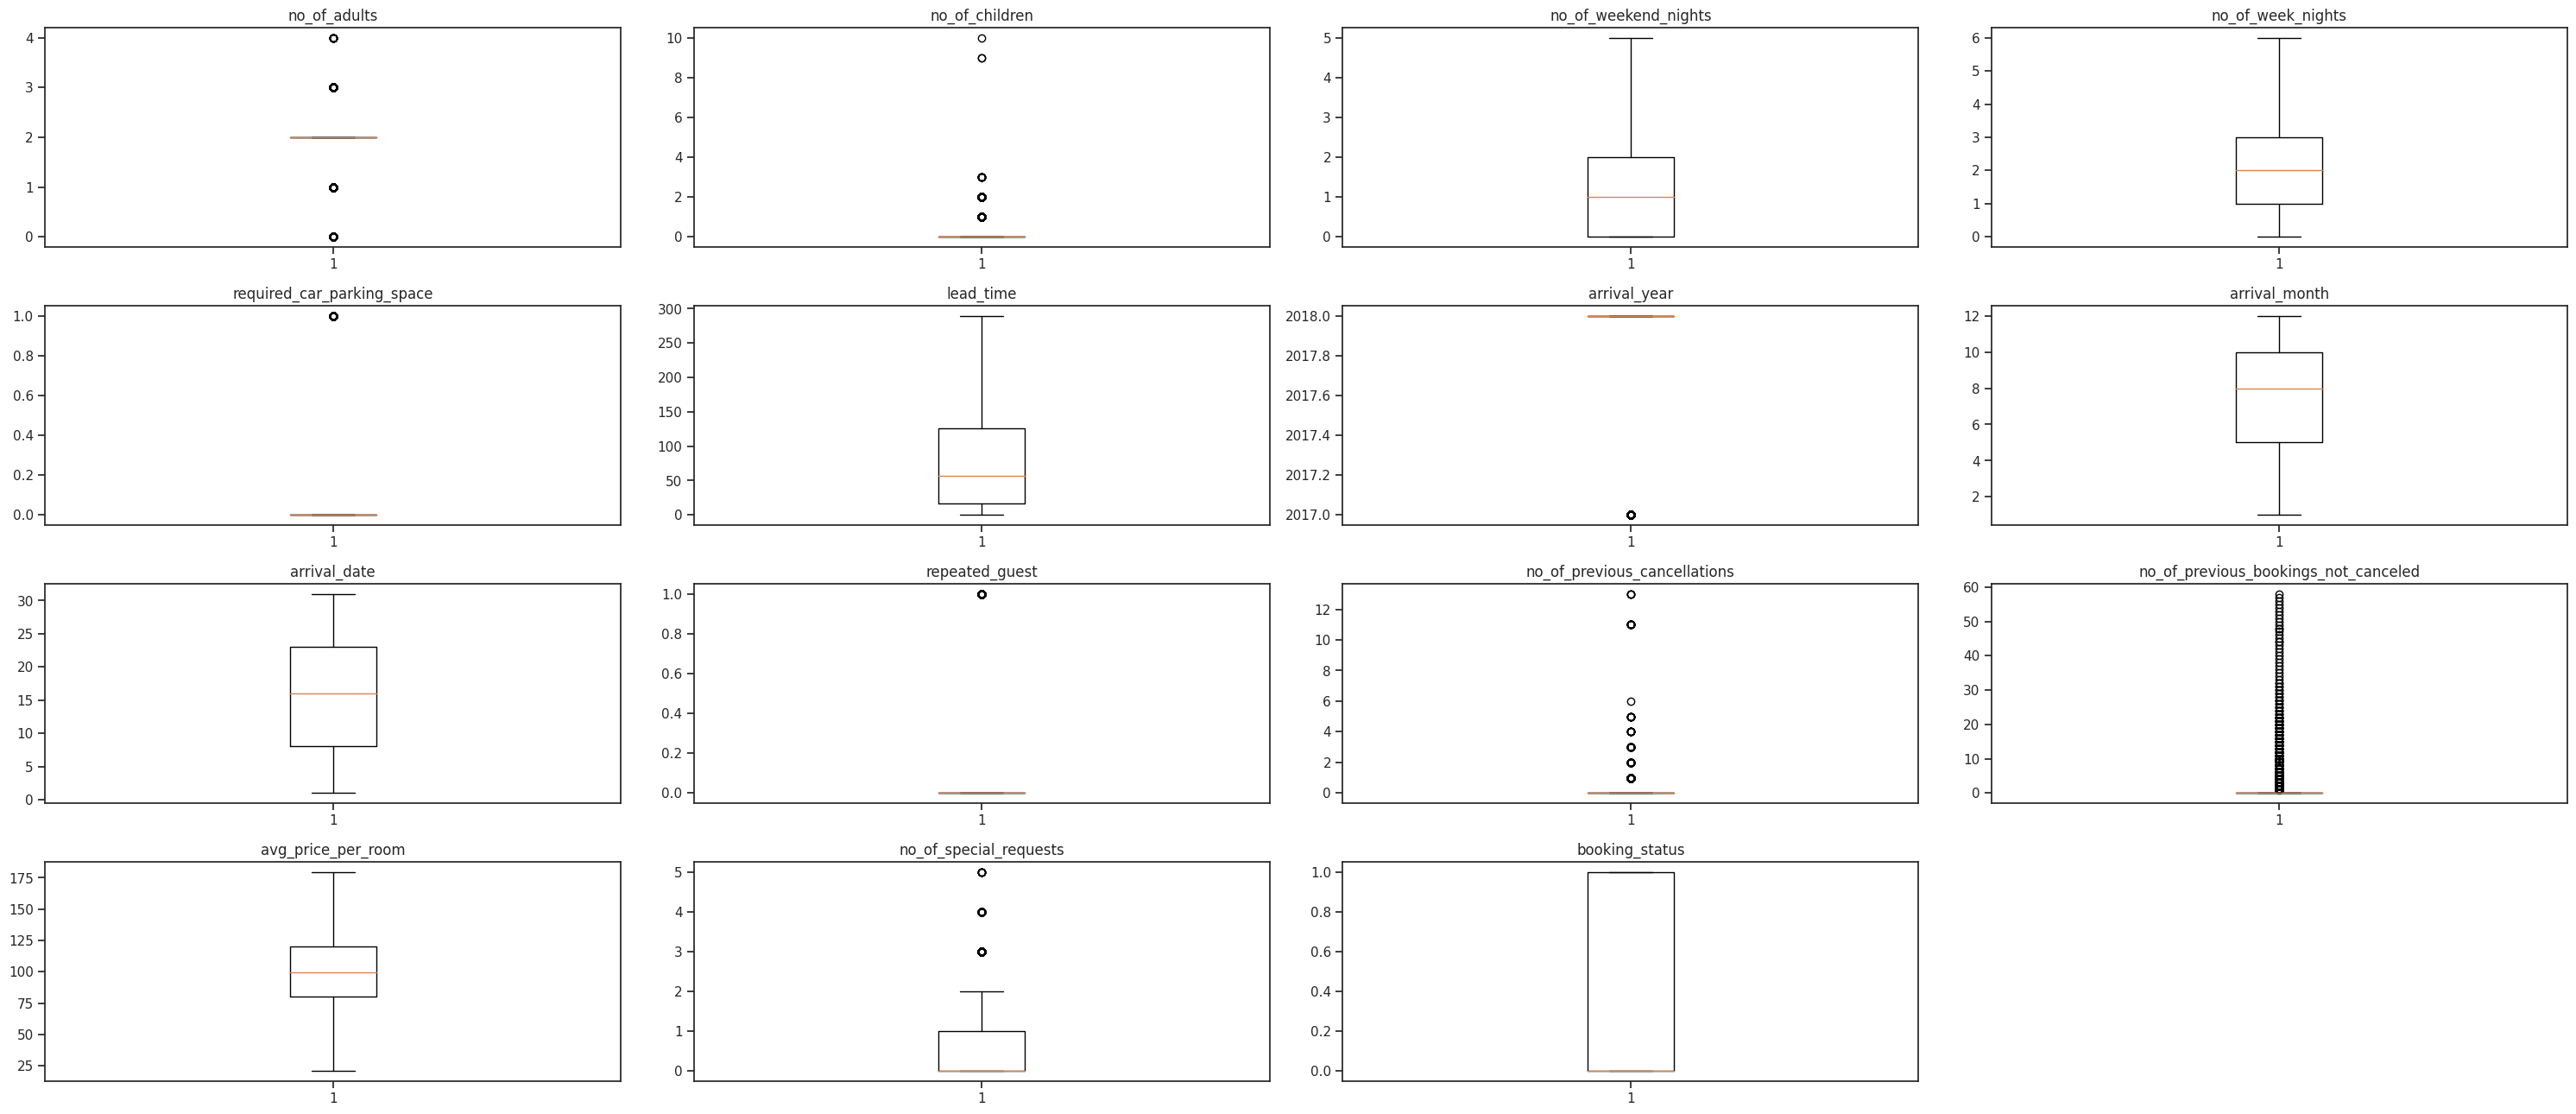

In [ ]:
# let's look at the boxplots to see if the outliers have been treated or not

numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

import math
n_rows = int(math.ceil(len(numeric_columns)/4))
plt.figure(figsize=(30, n_rows*4))


for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Convert all object data types to categorical types

In [ ]:
# converting initial object data type to categorical data tpes.
df1["type_of_meal_plan"] = df1["type_of_meal_plan"].astype("category")
df1["room_type_reserved"] = df1["room_type_reserved"].astype("category")
df1["market_segment_type"] = df1["market_segment_type"].astype("category")

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df1.describe().T

count      mean     std       min  \
no_of_adults                         36275.0000    1.8450  0.5187    0.0000   
no_of_children                       36275.0000    0.1053  0.4026    0.0000   
no_of_weekend_nights                 36275.0000    0.8101  0.8673    0.0000   
no_of_week_nights                    36275.0000    2.1778  1.2906    0.0000   
required_car_parking_space           36275.0000    0.0310  0.1733    0.0000   
lead_time                            36275.0000   83.7618 81.6569    0.0000   
arrival_year                         36275.0000 2017.8204  0.3838 2017.0000   
arrival_month                        36275.0000    7.4237  3.0699    1.0000   
arrival_date                         36275.0000   15.5970  8.7404    1.0000   
repeated_guest                       36275.0000    0.0256  0.1581    0.0000   
no_of_previous_cancellations         36275.0000    0.0233  0.3683    0.0000   
no_of_previous_bookings_not_canceled 36275.0000    0.1534  1.7542    0.0000   
avg_price_per_room                   36275.0000  102.9702 31.6812   20.7500   
no_of_special_requests               36275.0000    0.6197  0.7862    0.0000   
booking_status                       36275.0000    0.3276  0.4694    0.0000   

                                           25%       50%       75%       max  
no_of_adults                            2.0000    2.0000    2.0000    4.0000  
no_of_children                          0.0000    0.0000    0.0000   10.0000  
no_of_weekend_nights                    0.0000    1.0000    2.0000    5.0000  
no_of_week_nights                       1.0000    2.0000    3.0000    6.0000  
required_car_parking_space              0.0000    0.0000    0.0000    1.0000  
lead_time                              17.0000   57.0000  126.0000  289.5000  
arrival_year                         2018.0000 2018.0000 2018.0000 2018.0000  
arrival_month                           5.0000    8.0000   10.0000   12.0000  
arrival_date                            8.0000   16.0000   23.0000   31.0000  
repeated_guest                          0.0000    0.0000    0.0000    1.0000  
no_of_previous_cancellations            0.0000    0.0000    0.0000   13.0000  
no_of_previous_bookings_not_canceled    0.0000    0.0000    0.0000   58.0000  
avg_price_per_room                     80.3000   99.4500  120.0000  179.5500  
no_of_special_requests                  0.0000    0.0000    1.0000    5.0000  
booking_status                          0.0000    0.0000    1.0000    1.0000

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  float64 
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

#Step 5: Model Building

Note : Do refer to Lecture Notes :
- Additional_CaseStudy_German_Credit.ipynb
- IncomeGroupClassification_CaseStudy_DSBA_V2.ipynb

Data Preparation for modeling 

- We want to predict which booking reservations are likely to be canceled.
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Logistic Regression model using the train data and then check it's performance using the testing data

## Logistic Regression Modelling

#### Data Preparation for modeling (Logistic Regression)

#### Creating Training and Test sets (70:30)


In [ ]:
# defining X and y variables (define the dependent and independent variables)
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

print(X.head())     # view independent variables
print(Y.head())     # view dependent variables

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1   224.0000   
1      Not Selected                           0        Room_Type 1     5.0000   
2       Meal Plan 1                           0        Room_Type 1     1.0000   
3       Meal Plan 1                           0        Room_Type 1   211.0000   
4      Not Selected                           0        Room_Type 1    48.0000   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
# The get_dummies() function used creates new columns for each unique value in a categorical variable, 
# assigning a value of 1 or 0 to indicate its presence or absence 

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

'''
In machine learning, numerical values are preferred as input features 
because algorithms often require mathematical operations. The astype(float) function call is 
used to convert all data types in the X dataframe to float, ensuring that all variables 
are numeric and can be used as input features in machine learning models.
'''

# to ensure all variables are of float type
X = X.astype(float)

X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.0000        2.0000          0.0000                1.0000   
1 1.0000        2.0000          0.0000                2.0000   
2 1.0000        1.0000          0.0000                2.0000   
3 1.0000        2.0000          0.0000                0.0000   
4 1.0000        2.0000          0.0000                1.0000   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0             2.0000                      0.0000   224.0000     2017.0000   
1             3.0000                      0.0000     5.0000     2018.0000   
2             1.0000                      0.0000     1.0000     2018.0000   
3             2.0000                      0.0000   211.0000     2018.0000   
4             1.0000                      0.0000    48.0000     2018.0000   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0        10.0000        2.0000          0.0000                        0.0000   
1        11.0000        6.0000          0.0000                        0.0000   
2         2.0000       28.0000          0.0000                        0.0000   
3         5.0000       20.0000          0.0000                        0.0000   
4         4.0000       11.0000          0.0000                        0.0000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                0.0000             65.0000   
1                                0.0000            106.6800   
2                                0.0000             60.0000   
3                                0.0000            100.0000   
4                                0.0000             94.5000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                  0.0000                         0.0000   
1                  1.0000                         0.0000   
2                  0.0000                         0.0000   
3                  0.0000                         0.0000   
4                  0.0000                         0.0000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                         0.0000                          0.0000   
1                         0.0000                          1.0000   
2                         0.0000                          0.0000   
3                         0.0000                          0.0000   
4                         0.0000                          1.0000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                          0.0000                          0.0000   
1                          0.0000                          0.0000   
2                          0.0000                          0.0000   
3                          0.0000                          0.0000   
4                          0.0000                          0.0000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                          0.0000                          0.0000   
1                          0.0000                          0.0000   
2                          0.0000                          0.0000   
3                          0.0000                          0.0000   
4                          0.0000                          0.0000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                          0.0000                          0.0000   
1                          0.0000                          0.0000   
2                          0.0000                          0.0000   
3                          0.0000                          0.0000   
4                          0.0000                          0.0000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                             0.0000                         0.0000   
1                             0.0000                         0.0000   
2                             0.0000                         0.0000

In [ ]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.6706
1   0.3294
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.6764
1   0.3236
Name: booking_status, dtype: float64


#### Building Logistic Regression Model

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model on training set
logit = sm.Logit(y_train, X_train.astype(float))
# fitting logistic regression model
lg = logit.fit(disp=False)  # setting disp=False will remove the information on number of iterations

# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3298
Time:                        11:37:08   Log-Likelihood:                -10784.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -986.9000    121.097     -8.150      0.000   -1224.245    -749.555
no_of_adults                             0.1111      

Observation
- The model has been estimated on a sample of 25392 observations.
- The model's pseudo R-squared value is 0.3298, which indicates that the model explains around 33% of the variation in the dependent variable.
- The LLR p-value is 0.000, which indicates that the model as a whole is statistically significant.
- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. But these variables may have multicollinearity, which will affect the p-values. Hence, a systematic approach to remove multicollinearity from the data to get reliable coefficients and p-values must be performed.
- In the context of predicting which booking reservations are likely to be canceled, a negative coefficient would indicate that the corresponding predictor variable has a negative impact on the likelihood of a booking being canceled. ***Eg: being a repeated guest decreases the likelihood of canceling a booking reservation. This means that guests who have previously booked and stayed at the property are less likely to cancel their upcoming reservation compared to guests who have never stayed at the property before.***
- Positive values of the coefficient indicate that there is a positive relationship between the predictor variable and the response variable, and that as the predictor variable increases, the probability of the outcome (in this case, a canceled booking) also increases.

## Model performance evaluation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. ***(ie. hotel would want to maximize the F1 score to minimize both false positives and false negatives. )***

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

In [ ]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision     F1
0    0.8052  0.6346     0.7374 0.6821

### Detecting and Dealing with Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39375139.5596
no_of_adults                                  1.3525
no_of_children                                1.9748
no_of_weekend_nights                          1.0561
no_of_week_nights                             1.0950
required_car_parking_space                    1.0398
lead_time                                     1.3901
arrival_year                                  1.4275
arrival_month                                 1.2745
arrival_date                                  1.0066
repeated_guest                                1.7845
no_of_previous_cancellations                  1.3957
no_of_previous_bookings_not_canceled          1.6521
avg_price_per_room                            1.9668
no_of_special_requests                        1.2483
type_of_meal_plan_Meal Plan 2                 1.2627
type_of_meal_plan_Meal Plan 3                 1.0251
type_of_meal_plan_Not Selected                1.2792
room_type_r

***Observation***

- Based on the series, some of the features that have a relatively large effect on the predicted probability of a booking being canceled are lead time, arrival year, arrival month, no of previous cancellations, no of previous bookings not canceled, avg price per room, and market segment type.
- market segment exhibit high multicollinearity

#### Removing *market_segment_type_Online*

In [ ]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39295770.0029
no_of_adults                                  1.3364
no_of_children                                1.9740
no_of_weekend_nights                          1.0556
no_of_week_nights                             1.0948
required_car_parking_space                    1.0397
lead_time                                     1.3857
arrival_year                                  1.4250
arrival_month                                 1.2734
arrival_date                                  1.0066
repeated_guest                                1.7813
no_of_previous_cancellations                  1.3954
no_of_previous_bookings_not_canceled          1.6518
avg_price_per_room                            1.9658
no_of_special_requests                        1.2434
type_of_meal_plan_Meal Plan 2                 1.2623
type_of_meal_plan_Meal Plan 3                 1.0251
type_of_meal_plan_Not Selected                1.2772
room_type_r

Observations:
 - Dropping *market_segment_type_Online* variable has reduced the VIF (fixed the multicollinearity) for all other market_segment columns to less than 5, that previously had a high VIF.

#### Let's take a look at the model  performance again after removing Multicollinearity

In [ ]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision     F1
0    0.8053  0.6348     0.7376 0.6823

#### Observations: 
- There is minor significant change in the performance of the model. The accuracy, recall, precision, and F1 score have only slightly increased.
- This indicates that removing multicollinearity between Market Segment variables did not have a significant impact on the model's predictive performance. However, removing multicollinearity can still be beneficial as it helps to reduce the variance of the model and makes the coefficient estimates more stable and reliable.

***The above process can be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and hence using a loop as below will be more efficient.***

#### Removing columns with p-value > 0.05

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train2 = X_train1[selected_features]

## Final Model summary

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp = False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3287
Time:                        11:37:13   Log-Likelihood:                -10803.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -982.4991    120.763     -8.136      0.000   -1219.190    -745.808
no_of_adults                       0.1060      0.037      2.840      0.

Now we observe that there are no feature with p-value greater than 0.05. Hence we shall consider the features in *X_train2* as the final ones and *lg2* as final model.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy  Recall  Precision     F1
0    0.8047  0.6336     0.7366 0.6812

### **Model Summary Coefficient interpretations**
Based on the coefficients, we can infer that :

- Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_previous_cancellations,avg_price_per_room, meal types, arrival year are all positive. which means that an increase in these variables is associated with a higher probability of cancellation. 

- Coefficient of some room types, Market segment types, required_car_parking_space,arrival_month, repeated_guest,and no_of_special_requests are negative. This indicates that an increase in these variables is associated with a lower probability of cancellation of bookings.

Note 
A negative coefficient for a variable in a logistic regression model indicates that as the value of that variable increases, the probability of the target outcome (in this case, cancellation of bookings) decreases.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0000        1.1119          1.1781                1.1234   
Change_odd% -100.0000       11.1866         17.8137               12.3436   

             required_car_parking_space  lead_time  arrival_year  \
Odds                             0.1990     1.0166        1.6248   
Change_odd%                    -80.1002     1.6573       62.4840   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds                0.9603          0.0745                        1.2422   
Change_odd%        -3.9670        -92.5511                       24.2241   

             avg_price_per_room  no_of_special_requests  \
Odds                     1.0204                  0.2291   
Change_odd%              2.0398                -77.0894   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                                1.2661                          1.3429   
Change_odd%                        26.6147                         34.2885   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                 0.7017                          0.7539   
Change_odd%                        -29.8350                        -24.6080   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                 0.4842                          0.4888   
Change_odd%                        -51.5798                        -51.1161   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                 0.4737                         0.4612   
Change_odd%                        -52.6294                       -53.8818   

             market_segment_type_Offline  
Odds                              0.1680  
Change_odd%                     -83.1956

### Coefficient to Odds interpretations

- An odds ratio greater than 1 indicates that the feature is positively associated with the outcome (i.e., an increase in the feature will increase the odds of cancellation), while an odds ratio less than 1 indicates that the feature is negatively associated with the outcome (i.e., an increase in the feature will decrease the odds of cancellation).

* `no_of_adults`:  the odds ratio for "no_of_adults" is 1.1119. Holding all other features constant,  for every one-unit increase in the number of adults, the odds of cancellation increase by a factor of 1.1119 or a 11.1866%.
- The other odds for the other variables can be explained in a similar way. The odds for the variable `"repeated_guest"` are 0.0745, which means that the odds of a booking being canceled for a repeated guest are 0.0745 times the odds of a booking being canceled for a guest who is not repeated.

- The change_odd% for "repeated_guest" is -92.5511, which means that for every unit increase in the "repeated_guest" variable, the odds of a booking being canceled decrease by 92.5511%.

In simpler terms, being a repeated guest has a negative effect on the odds of a booking being canceled, meaning that repeated guests are less likely to cancel their bookings compared to first-time guests.

#### Checking model performance on the training set

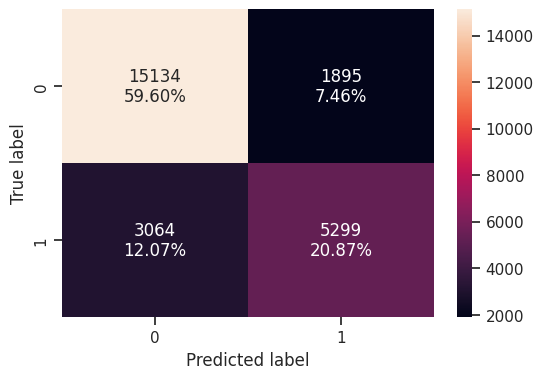

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision     F1
0    0.8047  0.6336     0.7366 0.6812

#### ROC Curve and ROC-AUC
* ROC-AUC on training set

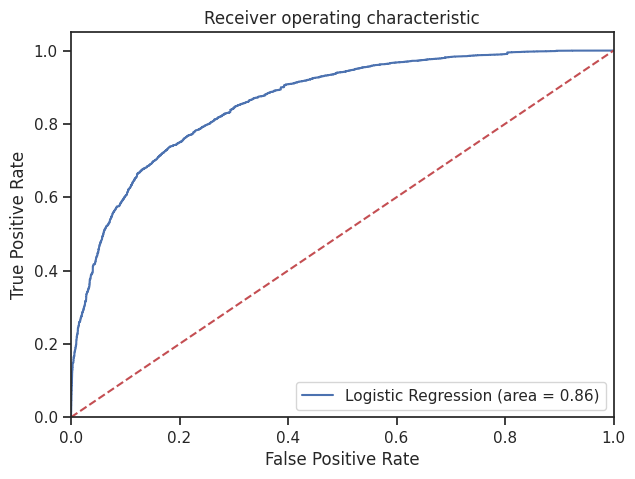

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observations:
- Logistic Regression model is giving a good performance on training set.


#### Model Performance Improvement


Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3641809634510029


#### Checking model performance on training set

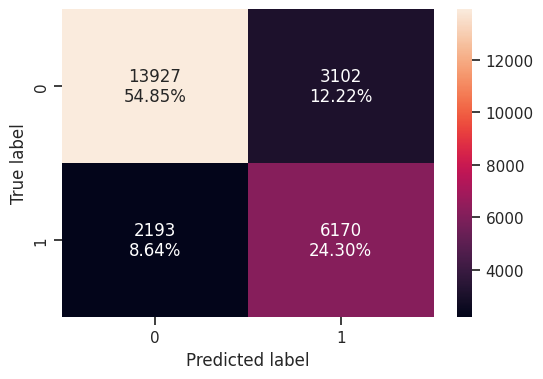

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision     F1
0    0.7915  0.7378     0.6654 0.6997

* Precision and Accuracy of model has reduced but the other metrics have increased.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

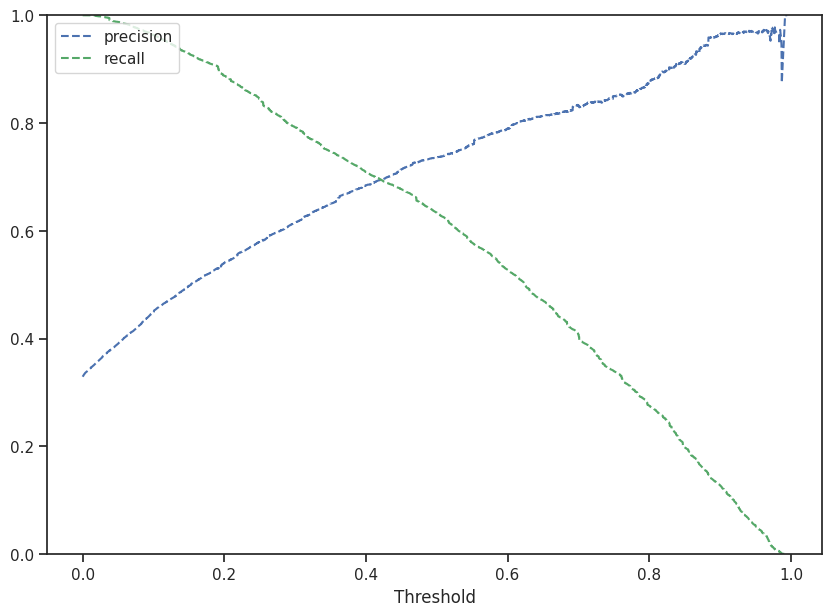

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

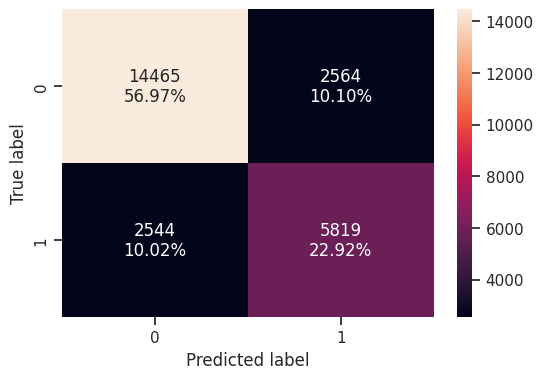

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision     F1
0    0.7988  0.6958     0.6941 0.6950

* Model is performing well on training set.
* There's not much of an improvement in the model performance as the default threshold is 0.50 and we are geting here 0.40 as the optimal threshold.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                        0.8047   
Recall                                          0.6336   
Precision                                       0.7366   
F1                                              0.6812   

           Logistic Regression-0.37 Threshold  \
Accuracy                               0.7915   
Recall                                 0.7378   
Precision                              0.6654   
F1                                     0.6997   

           Logistic Regression-0.42 Threshold  
Accuracy                               0.7988  
Recall                                 0.6958  
Precision                              0.6941  
F1                                     0.6950

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [ ]:
X_test2 = X_test[list(X_train2.columns)]

**Using model with default threshold**

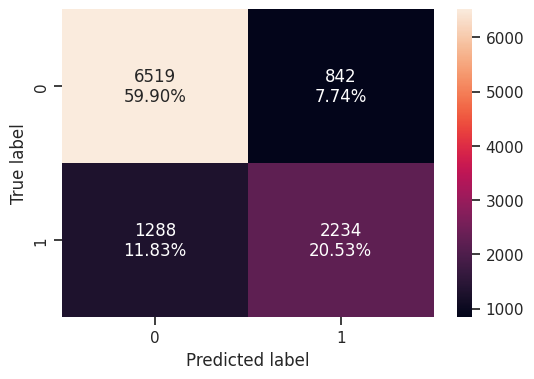

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision     F1
0    0.8043  0.6343     0.7263 0.6772

* **ROC curve on test set** 

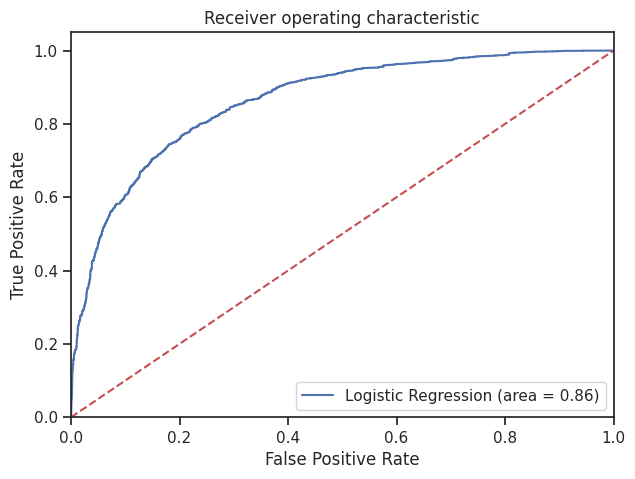

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

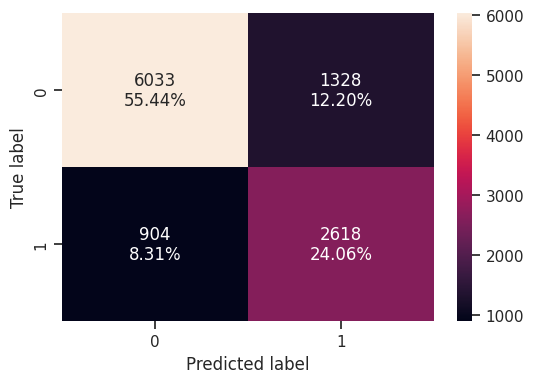

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision     F1
0    0.7949  0.7433     0.6635 0.7011

**Using model with threshold = 0.42**

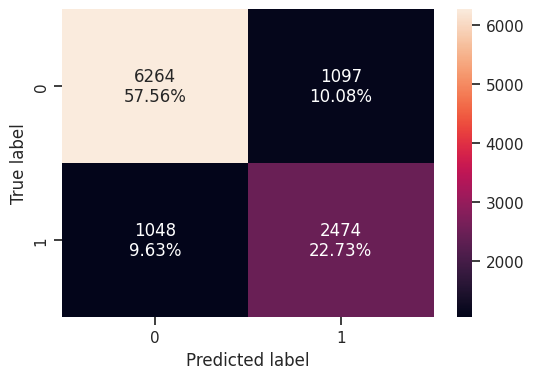

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision     F1
0    0.8029  0.7024     0.6928 0.6976

### Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                        0.8047   
Recall                                          0.6336   
Precision                                       0.7366   
F1                                              0.6812   

           Logistic Regression-0.37 Threshold  \
Accuracy                               0.7915   
Recall                                 0.7378   
Precision                              0.6654   
F1                                     0.6997   

           Logistic Regression-0.42 Threshold  
Accuracy                               0.7988  
Recall                                 0.6958  
Precision                              0.6941  
F1                                     0.6950

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                        0.8043   
Recall                                          0.6343   
Precision                                       0.7263   
F1                                              0.6772   

           Logistic Regression-0.37 Threshold  \
Accuracy                               0.7949   
Recall                                 0.7433   
Precision                              0.6635   
F1                                     0.7011   

           Logistic Regression-0.42 Threshold  
Accuracy                               0.8029  
Recall                                 0.7024  
Precision                              0.6928  
F1                                     0.6976

Note on Model Performance Summary Table :

 1. This compares the performance of three logistic regression models trained on the same data with different threshold values for predicting hotel booking cancellations.
 2. The first column represents the default threshold of 0.5, while the second and third columns represent the performance of the model with optimized threshold values of 0.37 and 0.42, respectively.
 3.The metrics used to compare the models are accuracy, recall, precision, and F1 score. 
 4. `Accuracy` measures the proportion of correct predictions, while `recall` measures the proportion of actual positive cases that were correctly identified by the model. `Precision` measures the proportion of predicted positive cases that were correctly identified, and the `F1 score` is the harmonic mean of precision and recall.

 ### **Inference**
 - Comparing the training set performance, we can see that the model with the optimized threshold of 0.42 has the highest accuracy and F1 score, while the model with the optimized threshold of 0.37 has the highest recall. The precision is highest for the model with the default threshold of 0.5.
 - Looking at the test set performance, we observe similar trends, model with the optimized threshold of 0.42 having the highest accuracy and F1 score, and the model with the optimized threshold of 0.37 having the highest recall. The precision is highest for the model with the default threshold of 0.5.

**Since the goal is to maximize the F1 score then we would choose the threshold that gives us the highest F1 score on the validation set or cross-validation set. Hence, in the comparison table, the F1 score is highest for the logistic regression model with the 0.37 threshold on both the training and test sets.**

(greater the F1 score, higher are the chances of minimizing False Negatives and False Positives)

## Decision Tree modelling

### Split Data

In [ ]:
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.6706
1   0.3294
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.6764
1   0.3236
Name: booking_status, dtype: float64


### Defining methods to check Performance of the trees 

Let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_sklearn function will be used to check the model performance of models.
- The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
 def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

### Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'. 

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

###  Scoring our Decision Tree

In [ ]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8710833409905357


In [ ]:
#Checking number of positives
y.sum(axis = 0)

11885

**What does INN Hotel want?**
* predict which booking is likely to be canceled.
-	minimize losses

There are two possible types of loses faced :
   * a. loss of resources (revenue) when the hotel cannot resell the room or tries to undersell the room at lower rate.
   * b. reputation loss of wrongfully cancelling a booking but in reality the guest was present

**Model Evaluation ?**

Model evaluation criterion for the Decision Tree Model is the same as specified above for the Logistic Regression Model (i.e., maximize F1 score)


*INN Hotel wants to maximize F1 score, in order to create a model that is good at predicting which bookings are likely to be canceled while minimizing the number of false positives and false negatives. 

In this context, a false positive would be a prediction that a booking will be canceled, but in reality, the guest does show up for their reservation, causing a loss of revenue. A false negative would be a prediction that a booking will not be canceled, but in reality, it is canceled, resulting in a loss of revenue and reputation. Both false positives and false negatives can lead to losses for the hotel, but in this context, false negatives (canceled bookings that were not predicted) are likely to be more costly for the hotel's reputation.




(FN) is an error that occurs when a model predicts a negative class for an instance that actually belongs to the positive class.
-  In the context of predicting which bookings are likely to be cancelled in a hotel, a false negative would occur when the model predicts that a booking will not be cancelled, but in reality, the booking becomes cancelled

#### Checking model performance on training set

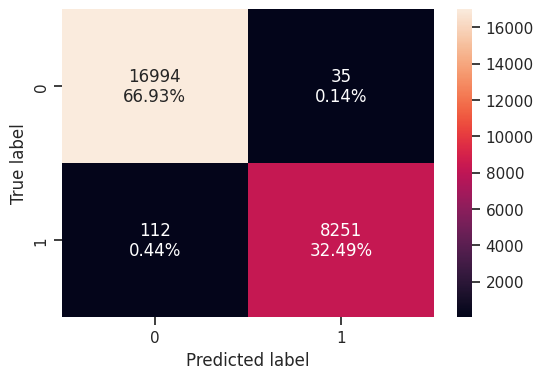

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision     F1
0    0.9942  0.9866     0.9958 0.9912

#### Checking model performance on test set

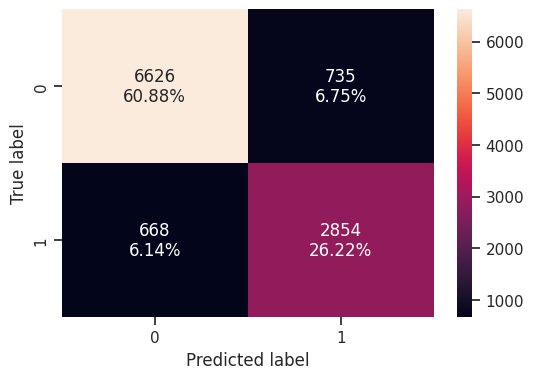

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision     F1
0    0.8711  0.8103     0.7952 0.8027

In [ ]:
# Recall on train and test
get_recall_score(model)

Recall on training set :  0.9866076766710511
Recall on test set :  0.8103350369108461


#### Observations:
- The model has a high accuracy of 99.42% on the training set and 87.11% on the test set, which indicates that the model is able to correctly classify a large portion of the instances.
- Although accuracy is an most appropriate metric for evaluating the performance of the model, we should also focus on recall, which measures the ability of the model to correctly identify the positive instances (i.e., bookings that are likely to be cancelled). A higher recall score indicates that the model is better at identifying the positive cases.
- The recall score of the model is high on the training set (98.66%), indicating that the model is able to identify most of the positive instances correctly. However, the recall score on the test set is lower at 81.03%, indicating that the model is missing some of the positive instances in the test set.
- The precision of the model is high on both the training set (99.58%) and the test set (79.52%), indicating that the model is able to correctly identify a high proportion of the predicted positive instances.
- The F1 score of the model, which is a weighted average of precision and recall, is high on both the training set (99.12%) and the test set (80.27%).

Notes :
-  The difference in performance between the training and test sets could be an indication of overfitting, where the model is too complex and has learned to fit the training data too closely, resulting in poor generalization performance on the test data. To improve the model's performance on the test set, we may need to `prune` the tree
- Based on these insights, we can conclude that the model has a high overall performance on the training set, but it may need some improvement to generalize well on the unseen test data. Specifically, the recall score on the test set could be improved to minimize the number of false negatives (i.e., missed cancellations), which could result in reputation loss for the hotel.
 

### Checking for important features

**Before pruning the tree let's check the important features.**

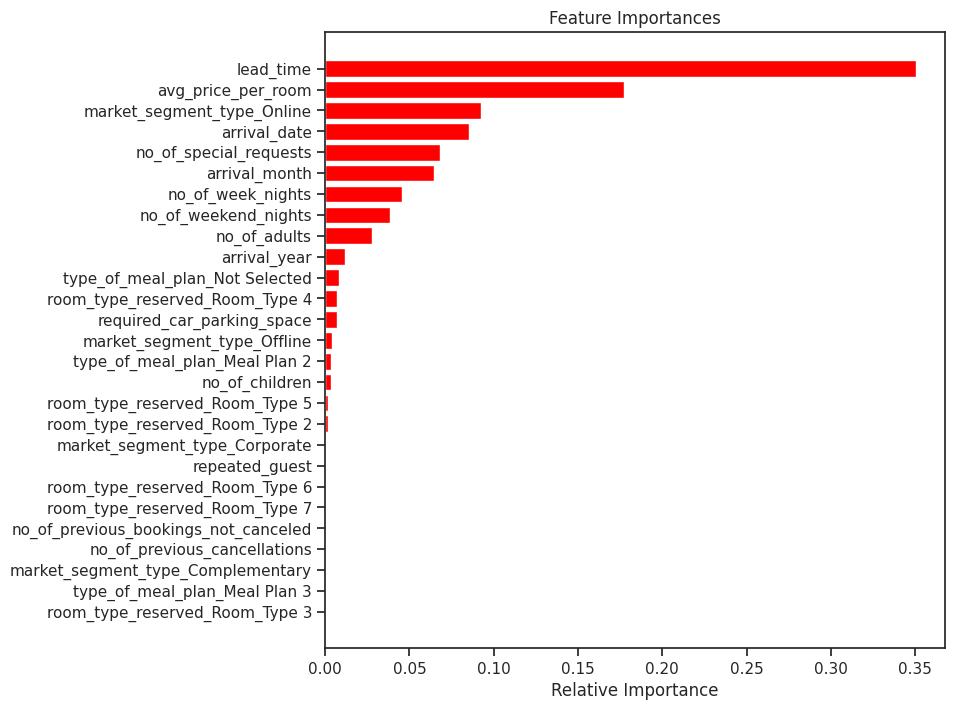

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Lets just Print the top-10 most important features in the decision tree 
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(n=10))

                              Imp
lead_time                  0.3504
avg_price_per_room         0.1773
market_segment_type_Online 0.0923
arrival_date               0.0853
no_of_special_requests     0.0679
arrival_month              0.0646
no_of_week_nights          0.0454
no_of_weekend_nights       0.0385
no_of_adults               0.0275
arrival_year               0.0118


#### Observation:
- Based on the importance score, it can be inferred that **lead_time** (score of 0.3504) has a significant impact on the cancellation prediction, and the model relies heavily on this feature to make accurate predictions.
- The higher the lead time, the greater the likelihood of cancellation. This is because guests may book hotels in advance, but their plans may change, leading to cancellations.

## Visualizing the Decision Tree (before depth restriction)
- Let us take a look at the initial decison tree 

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


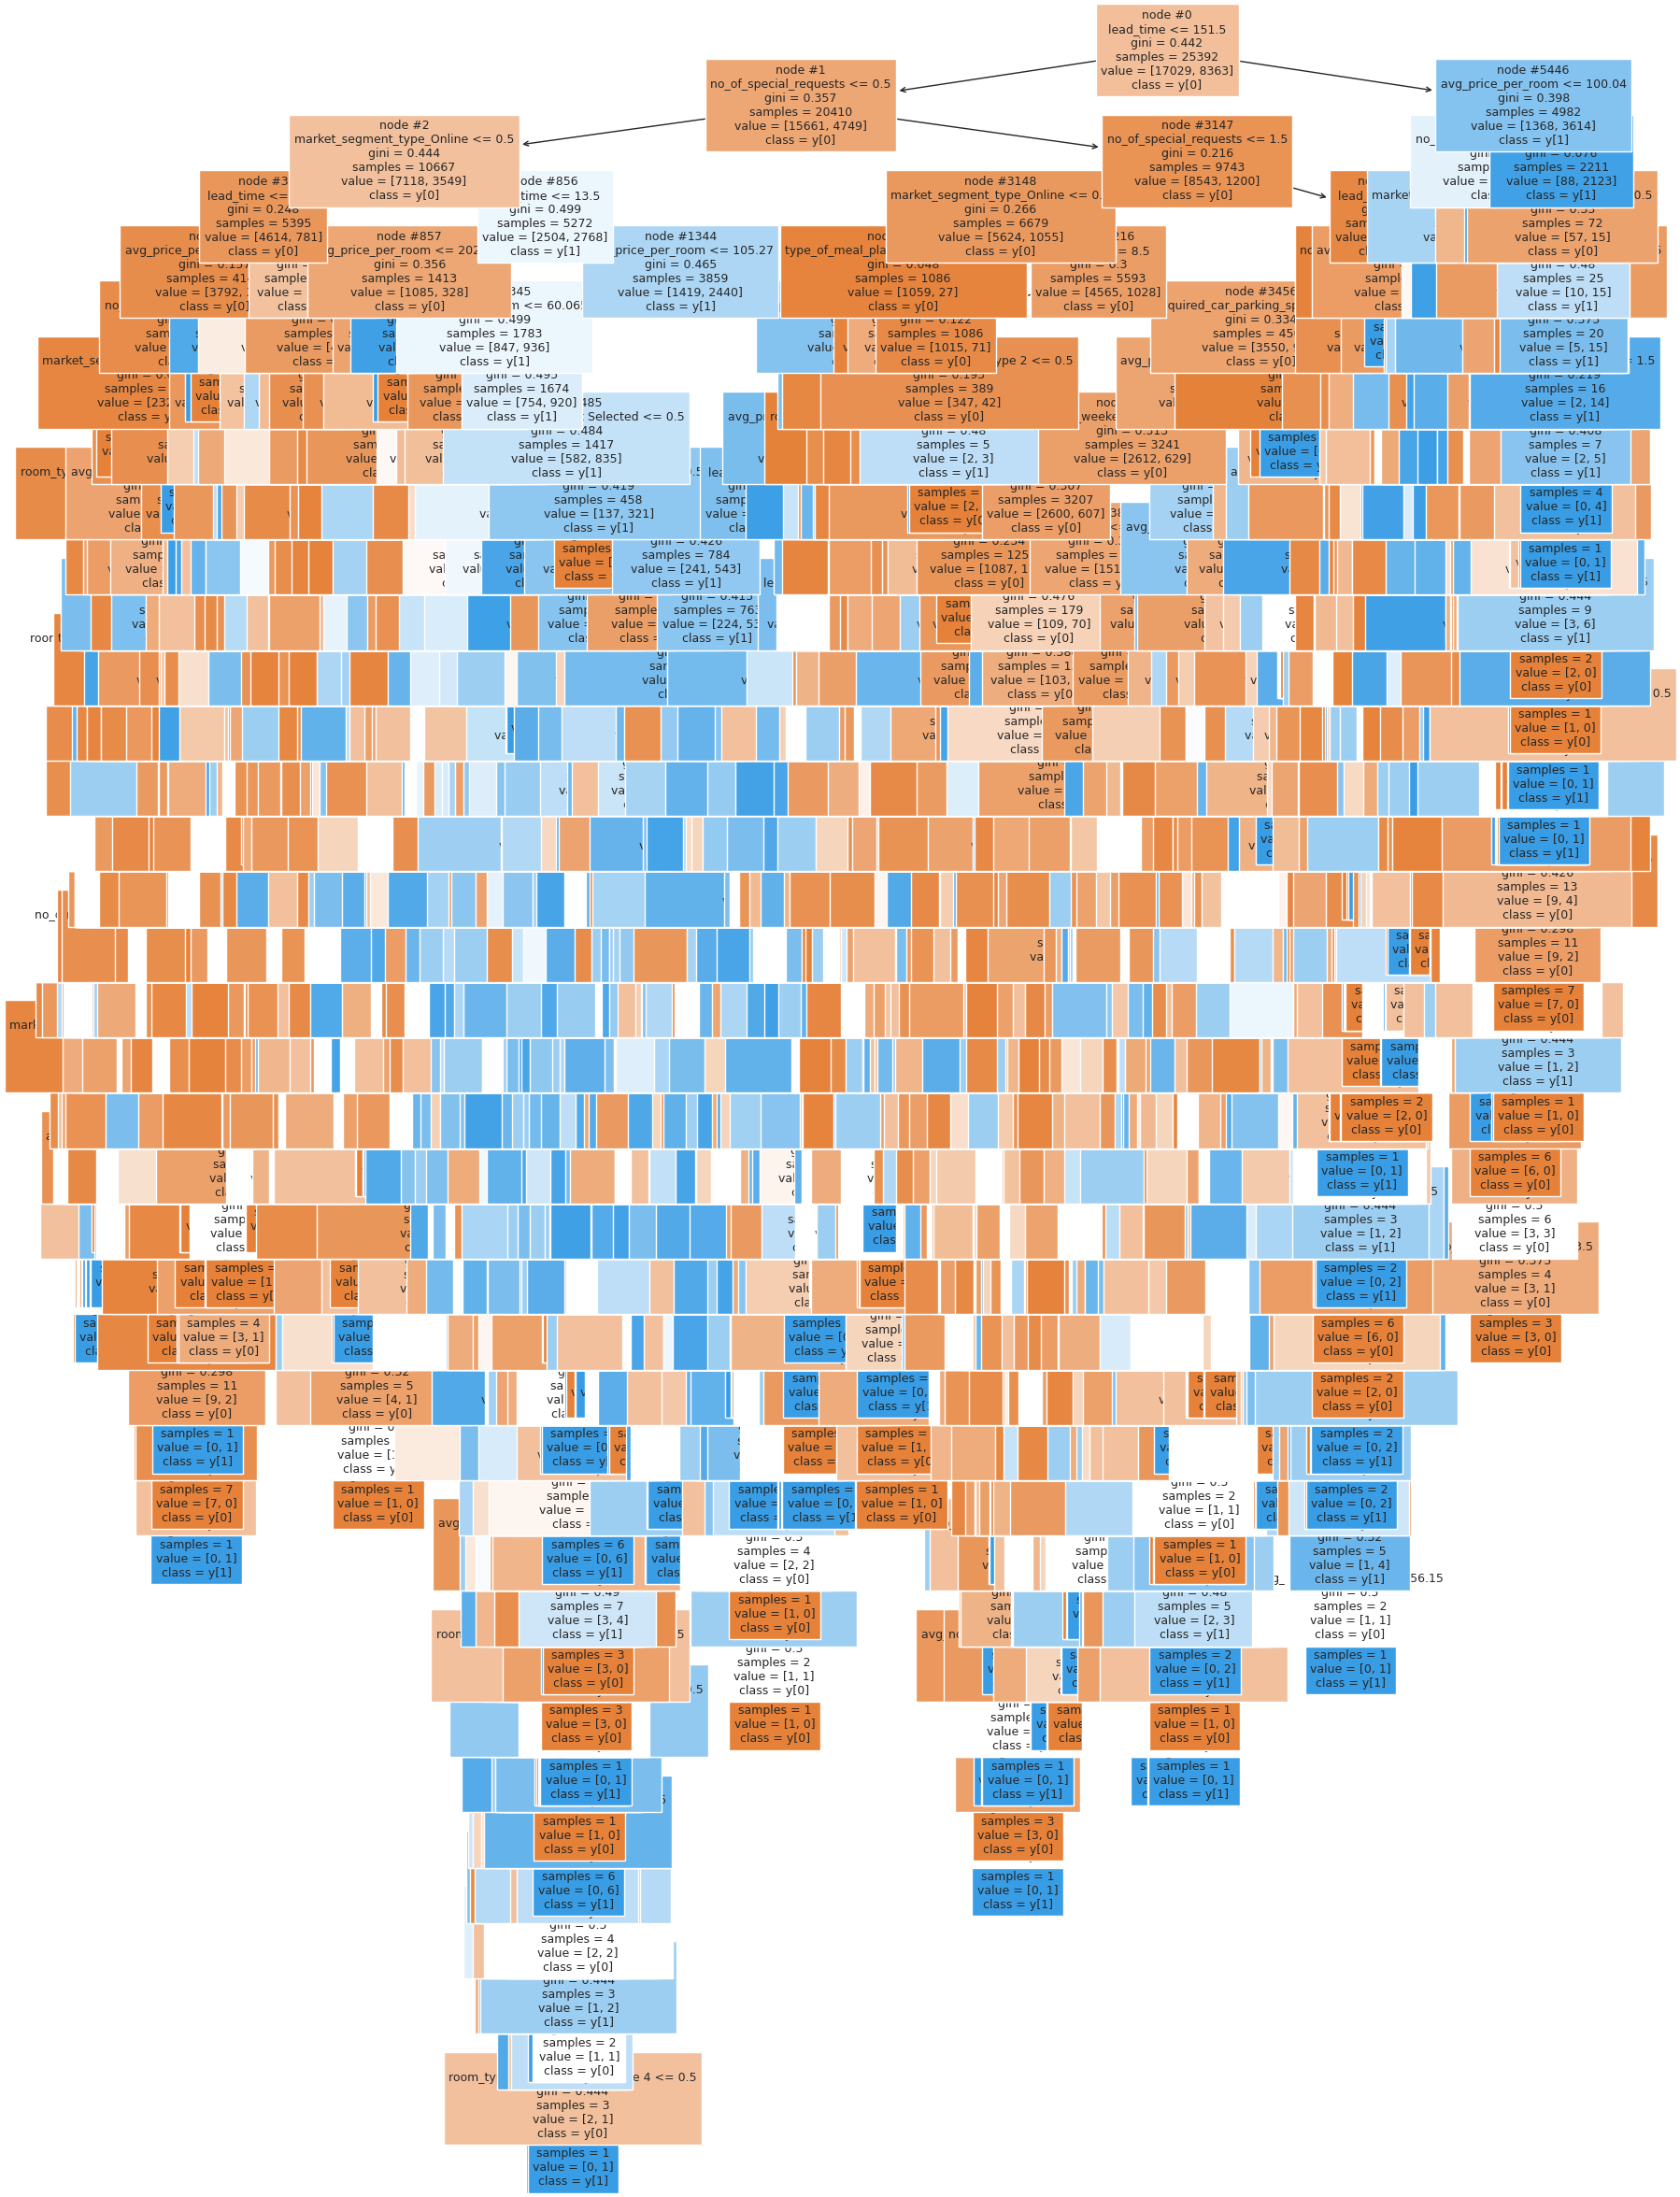

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

#### Observations:
- *The tree above is very complex, such trees often overfit the data
  Hence we shall go ahead and prune.*


### Reducing Over fitting
 * In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting

 * The depth of a decision tree is an important hyperparameter that controls the model complexity. A deeper tree can fit the training data more closely, but it also increases the risk of overfitting

* Let's try Limiting the max_depth of tree to 3 

In [ ]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Confusion Matrix - decision tree with depth restricted to 3

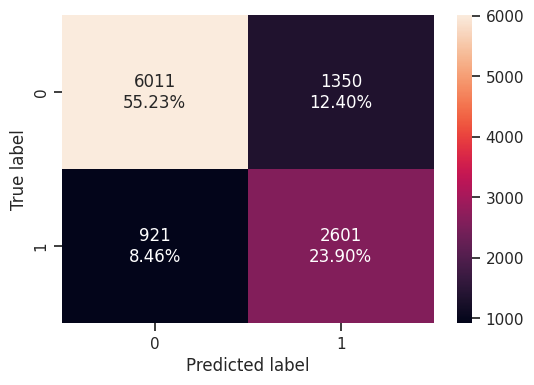

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree1_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree1_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
print(decision_tree_perf_train)
print(decision_tree1_perf_test)

   Accuracy  Recall  Precision     F1
0    0.9942  0.9866     0.9958 0.9912
   Accuracy  Recall  Precision     F1
0    0.7913  0.7385     0.6583 0.6961


In [ ]:
# Recall on train and test
get_recall_score(model1)

Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


### Observation:

- After pruning the decision tree to a depth of 4, we can see that the accuracy, precision, and F1 score have *decreased on the test set*.  This could imply that the tree was overfitting to the training data before pruning. The model was probably capturing noise or random fluctuations in the training data, which made it perform well on the training data but poorly on the test data. 

- On the other hand, the model's performance on the training set remains relatively unchanged after pruning, which suggests that pruning may have helped reduce overfitting.

Overall, while pruning has helped improve somewhat the generalization performance of the decision tree model on the train set, it is important to strike a balance between model complexity and accuracy. 

## Visualizing the Decision Tree - (after pruning to a depth of 3)

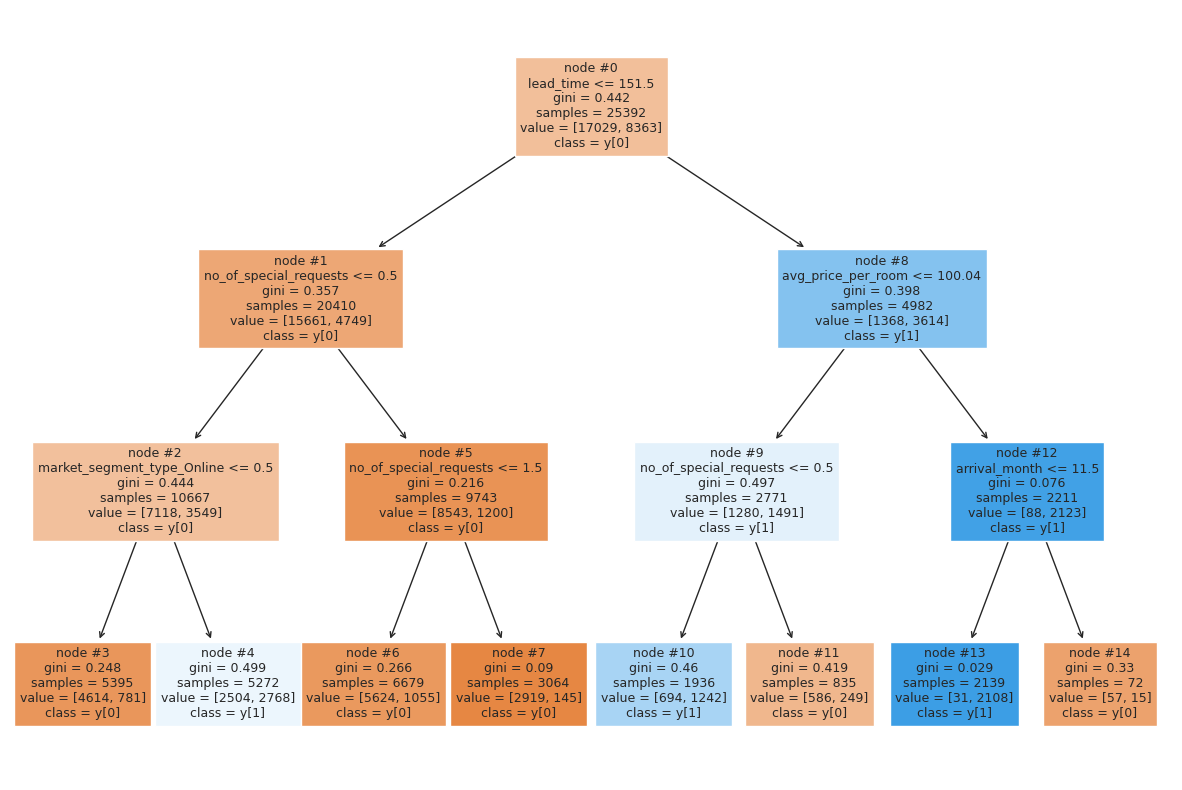

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5624.00, 1055.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2919.00, 145.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [694.00, 1242.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [586.00, 249.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [31.00, 2108.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [57.00, 15.00] class: 0



* The tree has become readable now but the F1 score on test set has reduced.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                     Imp
lead_time                         0.5019
market_segment_type_Online        0.1991
no_of_special_requests            0.1642
avg_price_per_room                0.1131
arrival_month                     0.0217
no_of_week_nights                 0.0000
type_of_meal_plan_Not Selected    0.0000
market_segment_type_Offline       0.0000
market_segment_type_Corporate     0.0000
market_segment_type_Complementary 0.0000


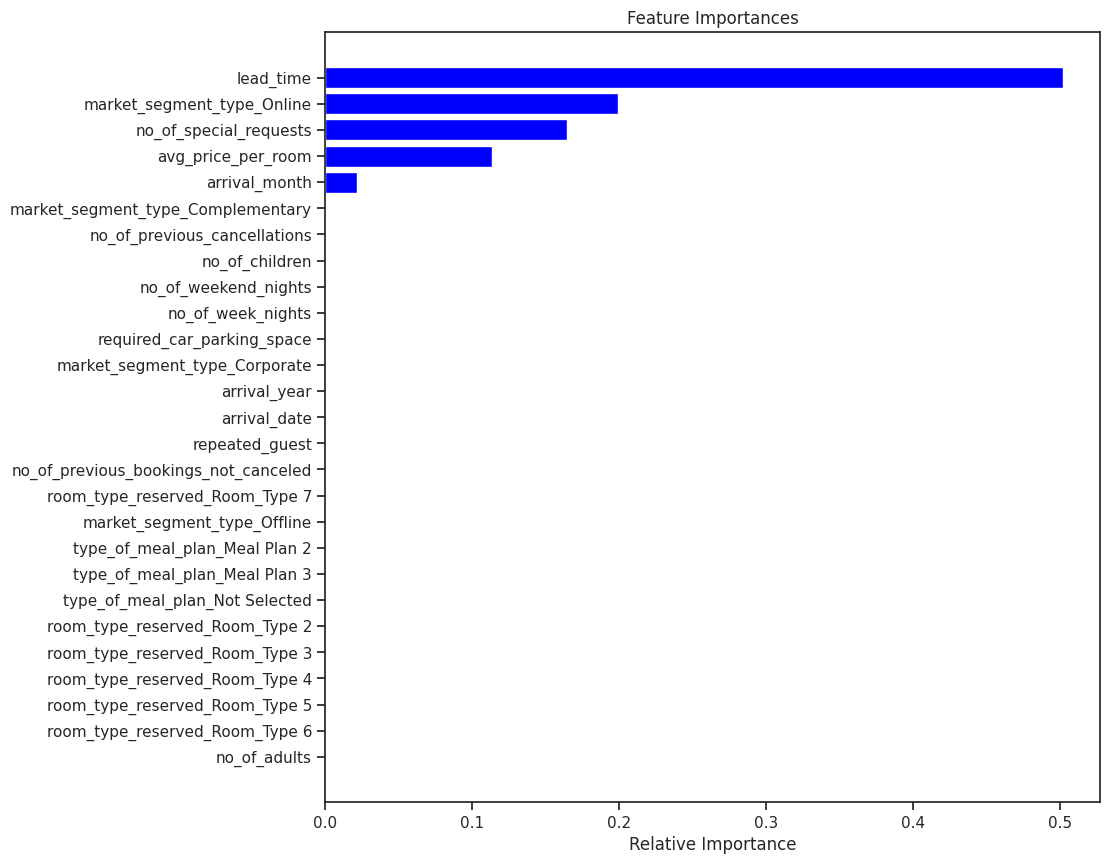

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, **no_of_week_nights** was included among important features  but here it is not included.
  this is the shortcoming of pre pruning, we just limit it even before knowing the importance of features and split.

* That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough
* It is bad to have a very low depth because your model will underfit 
* Let's see how to find the best values

### Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

* The maximum depth for the estimator is 3 as we had chosen before

### Confusion Matrix - decision tree with tuned hyperparameters

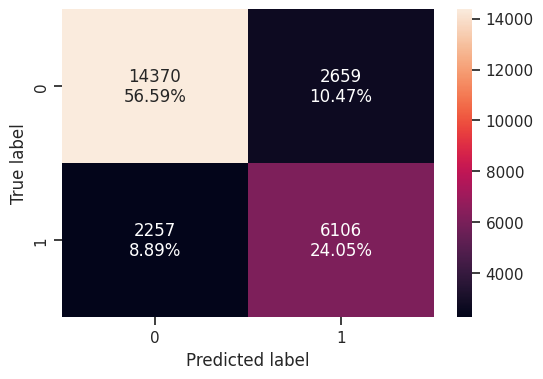

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on train  set (after Gridsearch Hyperparameter)



In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision     F1
0    0.8064  0.7301     0.6966 0.7130

#### Checking confusion matrix on train set (after Gridsearch Hyperparameter):

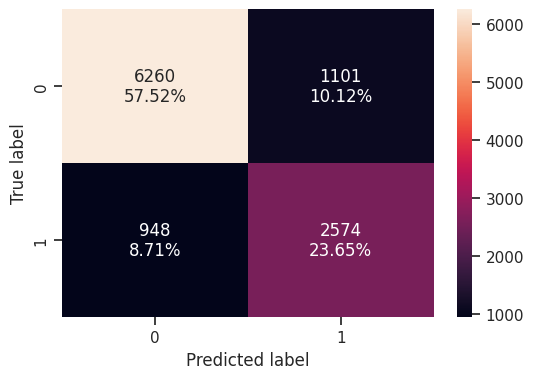

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

#### Checking model performance on test  set (after Gridsearch Hyperparameter)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision     F1
0    0.8117  0.7308     0.7004 0.7153

* After tuning hyperparameters, the performance of the model has become more generalised. The perfomance measures on the train data set are approximately equal to the performance measures on the test data set. 
- There fore we have reduced overfitting

### Visualizing the Decison Tree ( with tuned hyperparameters)

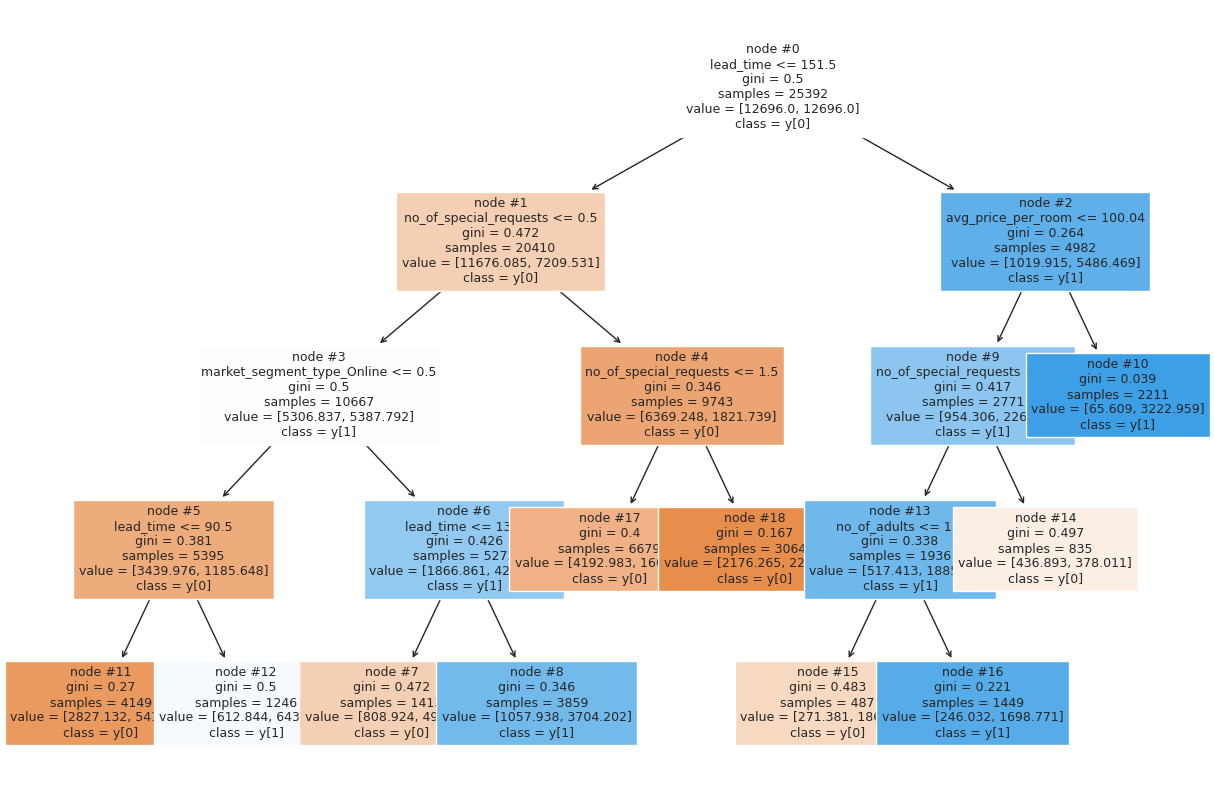

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [2827.13, 541.97] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- weights: [612.84, 643.68] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [808.92, 497.94] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1057.94, 3704.20] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [4192.98, 1601.61] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2176.27, 220.13] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |--- weights: [271.38, 186.73] class: 0
|   |   |   |--- no_of_adults > 

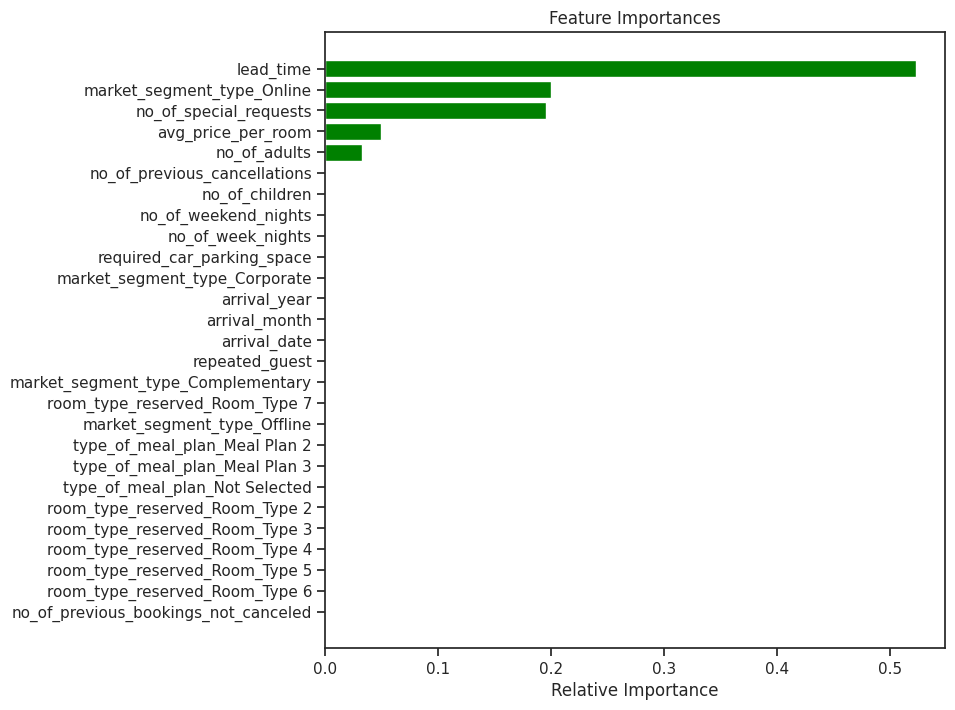

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

#Here we will see that importance of features has increased

                                     Imp
lead_time                         0.5227
market_segment_type_Online        0.1999
no_of_special_requests            0.1953
avg_price_per_room                0.0498
no_of_adults                      0.0322
type_of_meal_plan_Not Selected    0.0000
market_segment_type_Offline       0.0000
market_segment_type_Corporate     0.0000
market_segment_type_Complementary 0.0000
room_type_reserved_Room_Type 7    0.0000


* You can see in important features of previous model, no_of_adults was lost, but here importance of no_of_adults variable is back
This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

### Cost Complexity Pruning

In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned

### Post Prunning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0         0.0000      0.0084
1        -0.0000      0.0084
2         0.0000      0.0084
3         0.0000      0.0084
4         0.0000      0.0084
...          ...         ...
1837      0.0089      0.3281
1838      0.0098      0.3379
1839      0.0127      0.3506
1840      0.0341      0.4188
1841      0.0812      0.5000

[1842 rows x 2 columns]

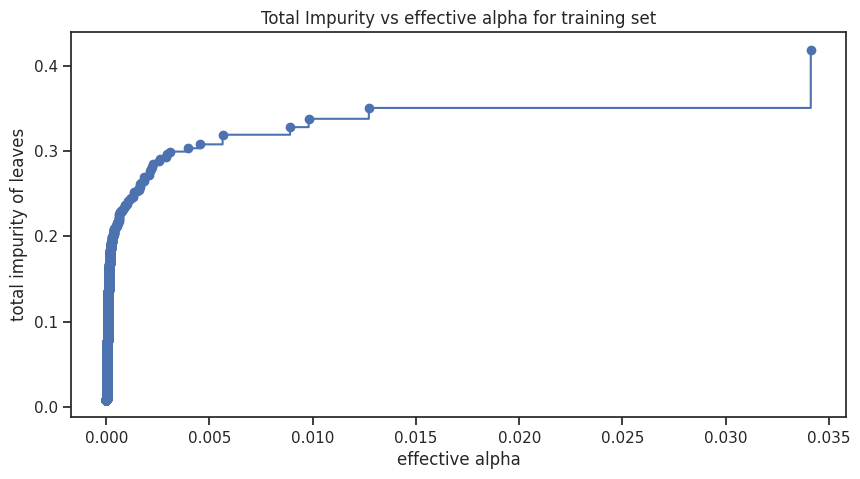

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

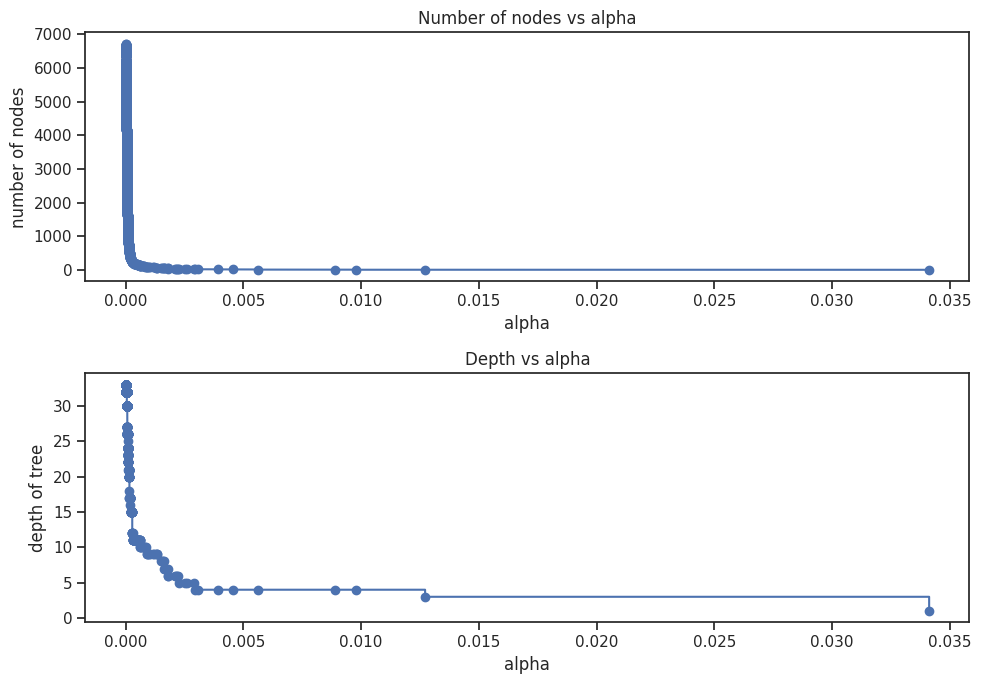

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 99% training accuracy and 87% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

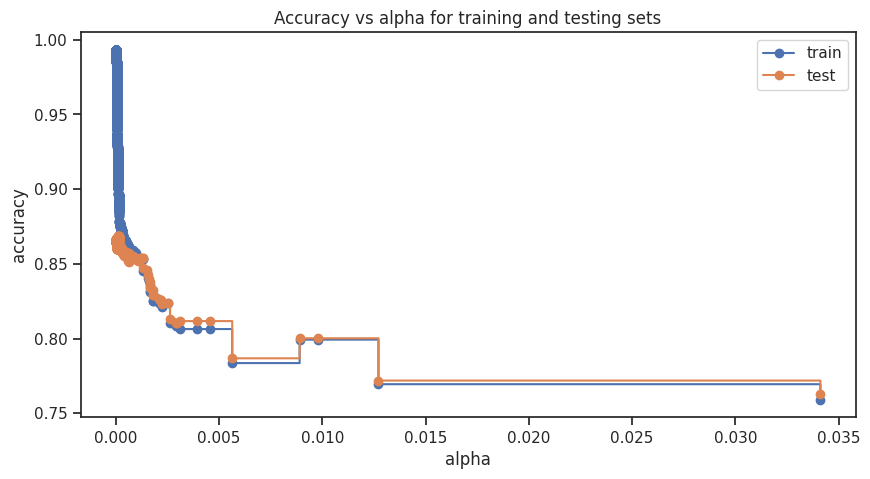

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00013338844575845263,
                       class_weight='balanced', random_state=1)
Training accuracy of best model:  0.895203213610586
Test accuracy of best model:  0.868878066709547


Accuracy isn't the target metric for our model. Objective is a higher F! score

### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

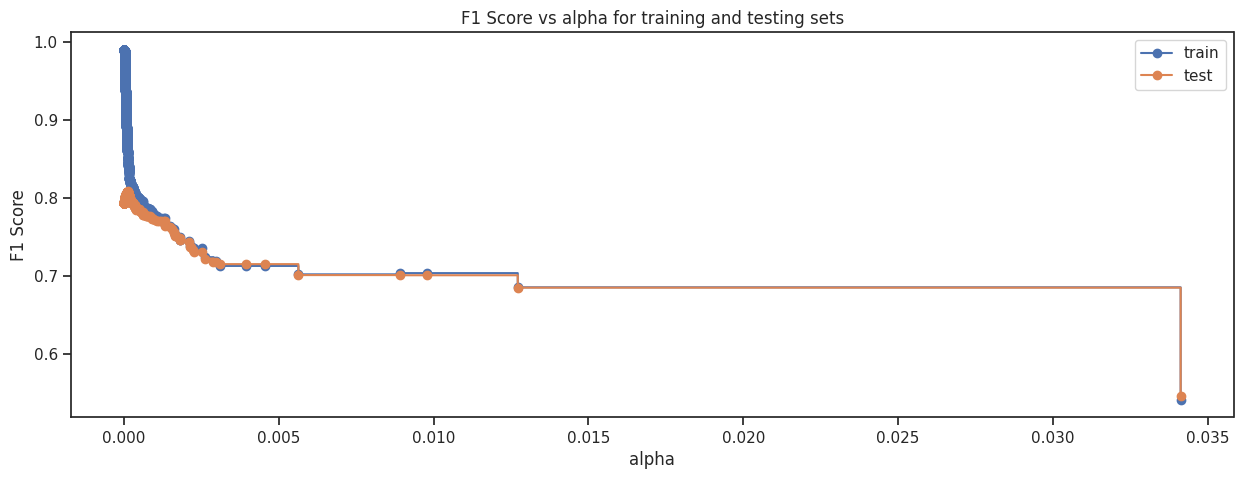

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


### Confusion Matrix - post-pruned decision tree

#### Checking performance on training set

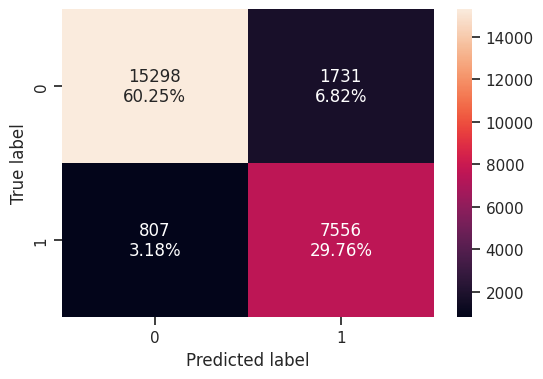

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision     F1
0    0.9000  0.9035     0.8136 0.8562

#### Checking Performance on test data

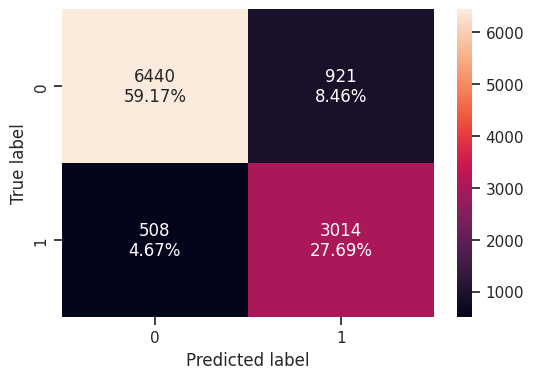

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy  Recall  Precision     F1
0    0.8687  0.8558     0.7659 0.8084

### Visualizing the decision tree

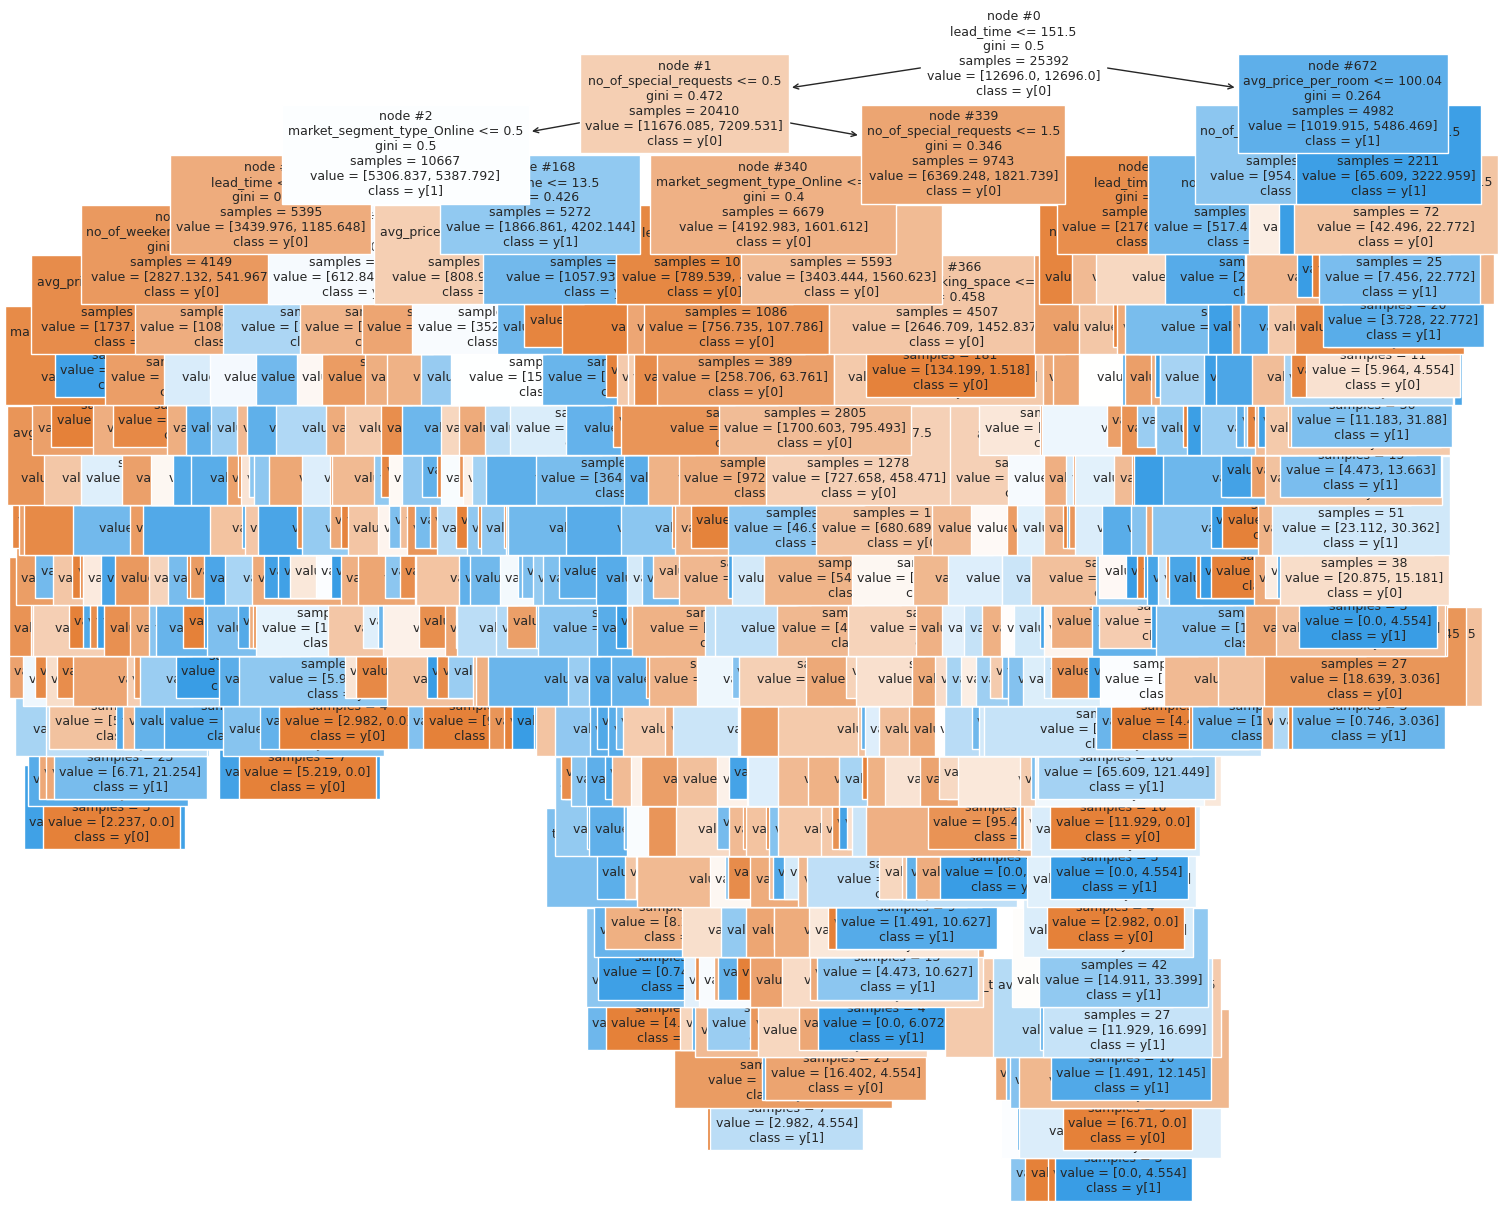

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

-*The decision tree still looks some how complicated but it is less complicated than our initial tree that we had before prunning*

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
lead_time                            0.3929
market_segment_type_Online           0.1333
avg_price_per_room                   0.1240
no_of_special_requests               0.1207
arrival_month                        0.0595
arrival_date                         0.0348
no_of_week_nights                    0.0284
no_of_weekend_nights                 0.0265
no_of_adults                         0.0255
arrival_year                         0.0189
market_segment_type_Offline          0.0133
required_car_parking_space           0.0101
type_of_meal_plan_Not Selected       0.0055
room_type_reserved_Room_Type 4       0.0019
room_type_reserved_Room_Type 6       0.0010
no_of_previous_bookings_not_canceled 0.0008
room_type_reserved_Room_Type 2       0.0008
type_of_meal_plan_Meal Plan 2        0.0007
room_type_reserved_Room_Type 5       0.0006
no_of_children                       0.0006
repeated_guest                       0.0003
no_of_previous_cancellations    

* lead_time, market segment online and avg_price_per_room  are the most important features.

### Comparisons all of the Decision Tree Models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                  0.9942                       0.8064   
Recall                    0.9866                       0.7301   
Precision                 0.9958                       0.6966   
F1                        0.9912                       0.7130   

           Decision Tree (Post-Pruning)  
Accuracy                         0.9000  
Recall                           0.9035  
Precision                        0.8136  
F1                               0.8562

In [ ]:

# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                  0.8711                       0.8117   
Recall                    0.8103                       0.7308   
Precision                 0.7952                       0.7004   
F1                        0.8027                       0.7153   

           Decision Tree (Post-Pruning)  
Accuracy                         0.8687  
Recall                           0.8558  
Precision                        0.7659  
F1                               0.8084

## Model Performance Comparison and Conclusions

- INN Hotel Group objective is to maximize F1 score which is a measure of the balance between precision and recall, which means it considers both false negatives and false positives. The greater the F1 score the higher the chances of minimizing **false negatives** and **false positives**

- Decision tree with post-pruning is giving the highest F1 score on test set of approximately 81%*

- In terms of INN Hotel's objective of maximizing the F1 score, a higher recall score is preferred as it indicates that the model is able to correctly identify more instances of canceled bookings (true positives) out of all the actual canceled bookings (true positives + false negatives). Therefore, ***the post-pruning decision tree model with the highest recall score of 0.8558 is more aligned with INN Hotel's objective compared to the other two models.***



# **CONCLUSION**

### Summary

To build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds for INN Hotel Group, the following steps have been successfully undertaken, based on the collection of  bookings data made by customers, and shared in this project.
1.	**Data Preprocessing**: Cleaned the data by removing missing values, duplicates, and irrelevant information. Convert categorical variables to numeric values using one-hot encoding or label encoding. Carry out Data Exploration, identify any outliers, anomalies and correlations.
2.	**Feature Selection**: Identify the features that are most relevant for predicting booking cancellations. Some potential features could be the booking date, lead time, room type, etc
3.	**Model Selection**: Choosing an appropriate machine learning algorithm for predicting booking cancellations. We have used here logistic regression and decision trees.
4.	**Model Training**: Splitting the data into training and testing sets at a ratio of 70:30. Train the model on the training set and evaluate its performance on the testing set using metrics such as accuracy, precision, recall, and F1 score.
5.	**Model Tuning**: Fine-tune the model by adjusting its hyperparameters using techniques such as grid search.


### Exploratory Data Analysis

I shall present only some of the relevant insights related to customer booking trends and cancellation .
From the graphical analysis carried out, we observe that :

1. **Travel Period**
  - The peak season recorded for INN Hotel Group is during October with 5317 customer bookings (14.7%), followed by September, August and June.
  -	Least favorable travel period is January. This could be due to cold and wet weather conditions making it an unfavourable travel period and also due to start of a new year where most people are charged up with their work routines.

  Based on this information, the INN Hotel Group can adjust their pricing, marketing, and staffing strategies to align with the seasonal trends in the hotel industry. They can offer discounts or carry out promotions during the low season (such as January) to attract customers and maintain their occupancy rates. They may also want to increase their staffing levels during the high season (such as October) to meet the high demand for their services.

**2. Market Segment**
  - Online market segment is the most popular booking type for the INN Hotel Group in Portugal, accounting for 23,214 bookings or 64% of the total bookings. This suggests that the hotel group has been successful in attracting customers through their online channels, such as their website, social media, or online travel agencies (OTAs).

To leverage this trend, the INN Hotel Group may want to invest more in their online marketing and advertising strategies, such as search engine optimization (SEO), pay-per-click (PPC) advertising, and social media campaigns. They can also offer incentives or discounts to customers who book through their online channels to encourage more bookings through this channel.

**3. Booking Lead Time and Guest Stay**
  - The minimum lead time of 0 days suggests that some customers are making bookings for the same day as their arrival date. This could be due to last-minute travel plans or changes in existing plans.
  - The maximum lead time of 443 days indicates that some customers are making bookings almost a year in advance. This could be due to the hotel offering early bird discounts or the need to secure specific dates or rooms for peak travel periods.
To minimize the loss of revenue due to cancellations for bookings with a lead time of 443 days, the hotel can consider implementing the following strategies:
    -	Implement a non-refundable booking policy: For bookings made with a lead time of 443 days, the hotel can offer non-refundable booking options at a discounted rate. This will incentivize customers to commit to their travel plans and reduce the likelihood of cancellations.
    -	Proactive communication: The hotel can communicate with customers who have booked rooms with a long lead time to confirm their travel plans and provide incentives to keep their bookings. Some of the observed incentives are free rooms giveaway.

**4. Booking Trend and Cancellations**
  -	The fact that 99.1% of customers had no previous cancellations could indicate that they were satisfied with their previous stays at the hotel and did not feel the need to cancel their bookings. It could also suggest that the hotel's cancellation policy is strict, which may deter customers from canceling their bookings unless absolutely necessary. 
  -  Alternatively, it could simply be that the hotel's customer base consists largely of first-time customers who have not had the opportunity to cancel bookings in the past
  -	2.6% of the total guest were repeated guests, meaning they had stayed at the INN Hotel Group at least once before. And only 1.72% of bookings from recurring guest had cancelled their booking. This rate is quite low and it suggests that the hotel has a loyal customer base who are satisfied with their services and are less likely to cancel their bookings. The hotel should focus on retaining these repeated guests by providing them with incentives and personalized services to maintain their loyalty.
  -	the lead time for repeating guests who canceled has a mean of 211 days. This suggests that, on average, repeating guests who canceled their bookings tend to book further in advance compared to other guests.
  -	it appears that a significant proportion of bookings are never on weekends, as 46.5% of bookings fall on weekdays rather than weekends. This could be an important factor to consider when implementing revenue management strategies, as it may be possible to offer discounted rates or special promotions during weekends in order to increase guests occupancy.
  -	the data also suggests that there is a higher percentage of guest bookings for one weekend as compared to two weekends. This could be due to a variety of factors, such as : weekends rates are far much higher than weekdays, guests are using the hotel as a stopover on their way to other destinations, or preferring to stay for shorter periods of time over weekdays.
  -	There were 11,885 cancelled bookings in the dataset (36%) with an average cancellation lead time of 139 days. It would be beneficial for the Hotel group to collect data on the reasons for cancellations provide valuable insights into areas for improvement in the booking and hotel services.
  -	Online bookings have the highest cancellation rate, approximately 36.5%, which could be due to the ease of booking and cancellation process. Overall, the hotel could use this information to evaluate their cancellation policies and channels and consider ways to encourage bookings through channels that have lower cancellation rates. They could also explore the possibility of implementing stricter cancellation policies for online bookings or offering more incentives to customers who book through offline channels.


---




### Model Selection and Learning

- Based on the decision tree analysis, we can infer that the lead time, average room price, and market_segment_type_Online are the three most important features for predicting booking cancellations at INN Hotels. This suggests that customers who book in advance (longer lead time) and those who book rooms with higher prices are more likely to cancel their bookings. Additionally, customers who book online may have a higher likelihood of cancellation compared to those who book through other market segments.
- We analyzed the cancelation decisions of 36,275 bookings through three different Decision Tree classifiers which can be deployed for INN Group to determine if a booking will be cancelled.
- Since INN Group objective is to optimize on F1 scores, it seems that the Decision Tree sklearn model has the highest F1 score at 0.9912.  
-  Based on the training performance comparison, it seems that the decision tree model without pre-pruning (sklearn) had the highest accuracy, recall, precision, and F1 score among the three models tested.
- The decision tree model with post-pruning had a lower accuracy compared to the sklearn model, but had a higher precision score. This could be useful in scenarios where minimizing false positives (incorrectly predicting a booking cancellation) is a priority.
- The decision tree model with pre-pruning had the lowest accuracy, recall, precision, and F1 score among the three models tested. However, this model may have better generalization performance compared to the other models, as it prevents overfitting by limiting the complexity of the decision tree.

---



### Summary of Actionable Insights and Recommendations

Hotel booking cancellations are unavoidable at times for genuine reasons. Based on the analysis of the booking data, here are some potential policies that INN Hotel Group could adopt to manage cancellations and refunds in a profitable manner:
1. **Offer flexible cancellation policies**: Consider offering 
flexible cancellation policies that allow guests to cancel or modify their bookings without penalty up to a certain point before their stay. This can help reduce the hesitation of guests to book early, and also help build customer loyalty.

2. **Use pre-payment**: Encourage guests to commit to their bookings by requiring pre-payment for non-refundable bookings. This can help prevent last-minute cancellations and no-shows.

3. **Improve communication**: Ensure that the hotel's communication with guests is clear and transparent. Guests should be aware of cancellation policies, payment requirements, and any other relevant details. Policies should also be made clear and detailed on online channels during booking confirmations.

4. **Send reminders**: Send guests reminders prior to their arrival date to confirm their bookings and remind them of any relevant policies, such as check-in times and cancellation deadlines.

5. **Monitor booking trend**s: Regularly monitor booking trends and cancellations to identify any patterns or potential issues. This can help you adjust policies and procedures as needed to reduce cancellations and no-shows.

6. **Invest more in their online marketing** and advertising strategies, such as search engine optimization (SEO), pay-per-click (PPC) advertising, and social media campaigns.

7. Have **loyalty promotions** suchs as Upgrades, Free Roo,s give away, Meal plan incentives for attracting new guests and repeating guests




